# <img src = "https://media.istockphoto.com/id/1148695495/photo/money-and-home-loan-mortgage-change-home-into-cash-concept.webp?b=1&s=170667a&w=0&k=20&c=oNHKl0q9ZjGPqzDsiWc0jN6SYHhO3P93UvESg2QiOdY=" >


## <font color = blue> Problem Statement </font>

**`Surprise Housing`**, a US-based housing company, is looking to enter in the Australian housing market where company wants to use data analytics to purchase prospective properties at a price below their actual values and flip them on at a higher price. Company want us to use regularisation regression techniques to predict the actual value of the prospective properties and decide whether to invest in them or not.
<br><br>
**The company wants to know :**<br> 
1. Which variables are significant in predicting the price of a house. <br> 
2. How well those variables describe the price of a house.

## <font color = blue> Importing Libraries and Settings </font>

In [1]:
#Importing Libraries
import pandas as pd # For data manipulation and to create charts
import numpy as np # For data manipulation
import matplotlib.pyplot as plt # To create charts for data visualization
import seaborn as sns  # To create charts for data visualization
import datetime as dt # To handle complex functionalities involving the date and time
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split # To split traning and test dataset for regression modelling
from sklearn.preprocessing import MinMaxScaler # To Normalization of the features
from sklearn.feature_selection import RFE # Importing RFE for automatic features selection
from sklearn.linear_model import LinearRegression # Importing LinearRegression
from sklearn.metrics import r2_score # to calculate r2 score between predicted vs observed response variable
from sklearn.metrics import mean_squared_error #to calculate the mean square error
import statsmodels.api as sm  # To build linear regression model
from statsmodels.stats.outliers_influence import variance_inflation_factor # Check for the VIF values of the feature variables.
import os
import itertools

import warnings #To ignore all warnings
warnings.filterwarnings(action='ignore')

In [2]:
#This allow us to see all columns and rows available in your dataframe.
pd.set_option('display.max_columns', None) # Set the display option to show all columns
pd.set_option('display.max_rows', None) # Set the display option to show all rows
pd.set_option('display.max_colwidth', None) # Set the maximum column width to show all the column information

<hr>

## <font color = blue> Sanity Checks on Imported Data </font>

**Importing the housing data**

In [3]:
house = pd.read_csv('train.csv')

**To check the correctness of imported data**

- **Extra rows-** If number of rows in Jupyter is greater than number of rows of raw data<br>
- **Unwanted column/s-** If number of columns in Jupyter is greater than number of columns of raw data

In [4]:
# To Take glimpse of data 
house.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
#To see the shape
house.shape

(1460, 81)

**To check if there is any shift of values because of any unwanted comma/delimiter**

- To ensure that there is no shift in the vlaue , We checked total count of missing values in 'SalePrice' variable in both CSV file and imported data on jupyter
- **'SalePrice'** variable is the last non-missing column available in the CSV file thus used for this analysis. This is also the **target variable** of the problem statement

<font color = green> **Observations:** </font> 
1) Rows and columns of data are imported correctly. No extra row and unwanted columns observed

**Setting the `Id`variable as Index**

In [6]:
# 'Id' is an unique identification variable as all values are unique and in sequence
(house.Id.nunique())/len(house)*100

100.0

In [7]:
house.set_index(['Id'], inplace = True)

In [8]:
house.head(5)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd       None   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd        TA      PConc       Gd       TA           Av   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ         706          Unf           0        150          856   
2           ALQ         978          Unf           0        284         1262   
3           GLQ         486          Unf           0        434          920   
4           ALQ         216          Unf           0        540          756   
5           GLQ         655          Unf           0        490         1145   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866             0   
4     GasA        Gd          Y      SBrkr       961       756             0   
5     GasA        Ex          Y      SBrkr      1145      1053             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710             1             0         2         1             3   
2        1262             0             1  

**`None` Value Correction**<br>
- Python does not identify 'NONE' value as missing value by itself so we will have to check if there is any 'NONE' record present in the raw data

**`a) MasVnrType`** : In the raw data we observed that 'MasVnrType' variable has 864 values populated as **'None'**. In the data dictionary, 'None' category is mentioned thus we can confirm that these are not null values, therefore no change required. There is no other field with 'None' value present in the raw data.

In [9]:
house.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

**`NA` Value Correction**<br>
- Python identify 'NA' value as missing value. However in the raw data, NA value may represents some other information so we will have to check if any 'NA' record present in the raw data.<br>
- After visualizing the raw data and based on data dictionary, we have observed that there are many fields where 'NA' category represents certain information therefore we would need to replace missing value of these variables as 'NA' in jupyter notebook.<br>
- In the raw data, we also observed that there is no **'blank'** cell present which also represents missing cell information. Therefore we can safely impute the missing cells with 'NA' value, in jupyter notebook, for those fields where 'NA' is mentioned as category in the data dictionary.<br><br>
- Fields with 'NA' category, w.r.t. data dictionary, are:
>1) Alley
>2) BsmtQual
>3) BsmtCond
>4) BsmtExposure
>5) BsmtFinType1
>6) BsmtFinType2
>7) FireplaceQu
>8) GarageType
>9) GarageFinish
>10) GarageQual
>11) GarageCond
>12) PoolQC
>13) Fence and
>14) MiscFeature


In [10]:
fields_NA = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

In [11]:
house[fields_NA].isnull().sum()

Alley           1369
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [12]:
# imputing missing value as 'NA'
house[fields_NA] = house[fields_NA].replace(np.nan, "NA")

In [13]:
#Checking all the variables in the data with missing values along with missing count
miss_col = pd.DataFrame(house.isnull().sum()).reset_index()
miss_col[miss_col[0] > 0]

index    0
2   LotFrontage  259
24   MasVnrType    8
25   MasVnrArea    8
41   Electrical    1
58  GarageYrBlt   81

In [14]:
house['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
NA          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

## <font color = blue> Univariate analysis on Target variable "SalePrice"</font>

1) No missing value found in the target/response variable

In [15]:
house.SalePrice.isnull().sum()

0

2) Checking Outlier in the Target variable

Text(0.5, 1.0, 'Histogram - SalePrice')

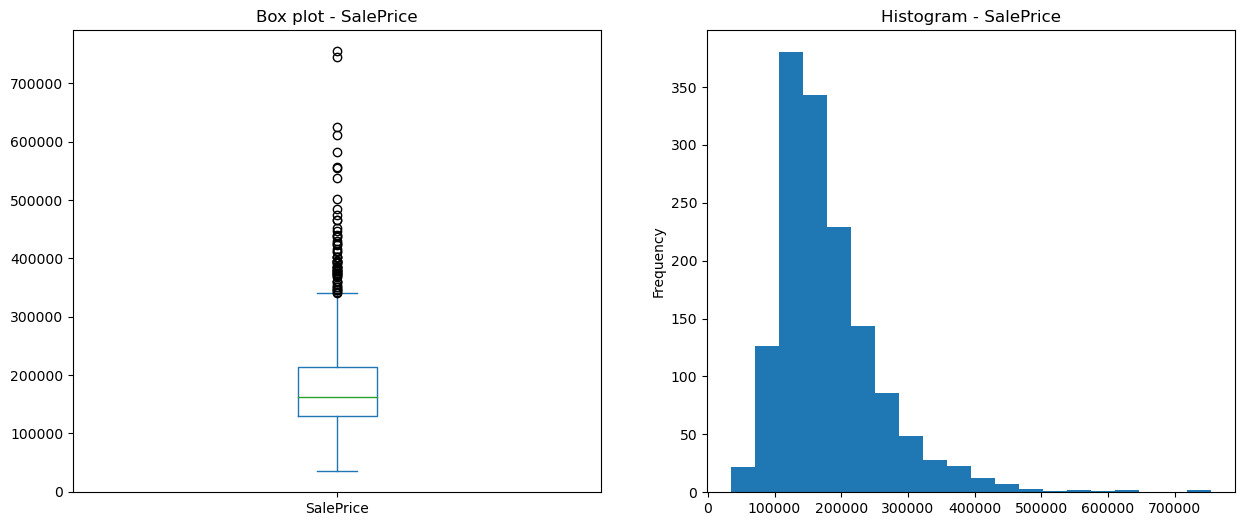

In [150]:
plt.figure(figsize=(15,6))

#creating boxplot
plt.subplot(121)
house.SalePrice.plot.box()

plt.title('Box plot - SalePrice')

#creating histogram
plt.subplot(122)
house.SalePrice.plot.hist(bins = 20)
plt.title('Histogram - SalePrice')

<font color = green> **Observations:** </font> Box plot and histogram suggest sale price is right skewed and sale price is very high for few records.We can also notice that there are very few houses at higher prices.Also there is a gap in SalePrice after 500k  thus limiting the value to 500k only.

In [16]:
#Ceiling sale price to 500k
house.SalePrice = house.SalePrice.apply(lambda x: 500000 if x > 500000 else x)

Text(0.5, 1.0, 'Histogram - SalePrice')

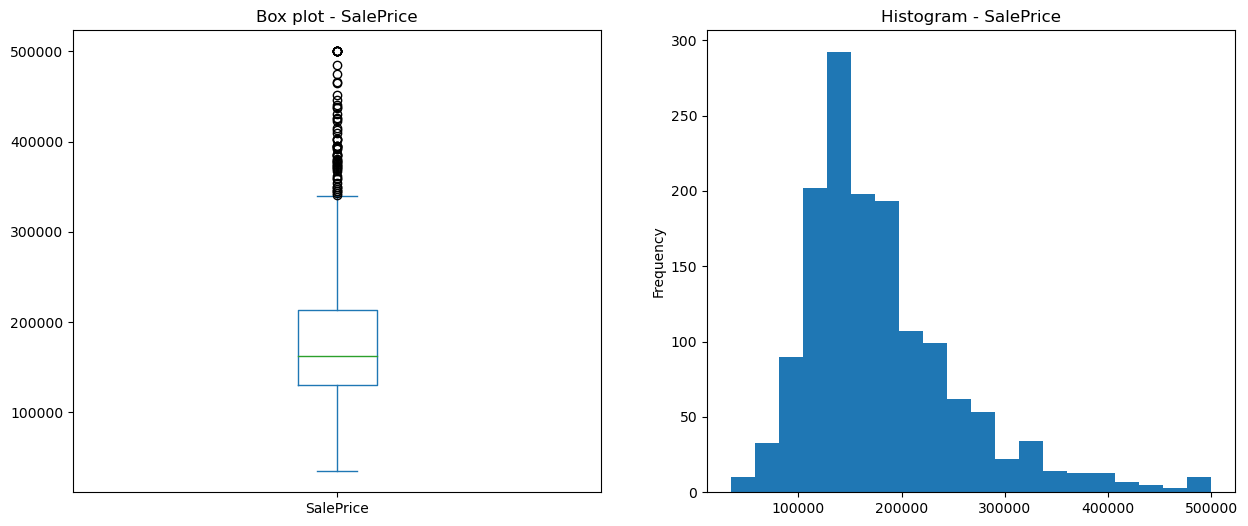

In [152]:
plt.figure(figsize=(15,6))

#creating boxplot
plt.subplot(121)
house.SalePrice.plot.box()

plt.title('Box plot - SalePrice')

#creating histogram
plt.subplot(122)
house.SalePrice.plot.hist(bins = 20)
plt.title('Histogram - SalePrice')

## <font color = blue> Treatment of Missing Values and Irrelevant Columns</font>

#### 1) Deleting Columns having all null/missing values

These variables do not impact the outcome of target variable. No such variable is present where all values are missing.

In [17]:
#Checking all the variables in the data with missing values along with missing percentage
miss_col = pd.DataFrame(house.isnull().sum()).reset_index()
miss_col[miss_col[0] > 0]

index    0
2   LotFrontage  259
24   MasVnrType    8
25   MasVnrArea    8
41   Electrical    1
58  GarageYrBlt   81


#### 2) Deleting Columns having single constant value

These variables do not impact the outcome of the target variable. No such variable is present in the data.

In [18]:
cons_col=pd.DataFrame(house.nunique()).reset_index()
cons_col[cons_col[0] ==1]

Empty DataFrame
Columns: [index, 0]
Index: []


#### 3) Deleting Variables with all unique values

- These variables are identification nominal variable which has all unique values therefore it will not have any impact on the target variable.<br>
- No such variable is present in the data

In [21]:
unique_col = (house.nunique())/len(house)*100
unique_col = unique_col.reset_index()
unique_col[unique_col[0] ==1]

Empty DataFrame
Columns: [index, 0]
Index: []

#### 4) Deleting Variables having unique value percentage more than 90%

- Since these variables have more than 90% values as constant, these will not be able to explain the variability of the target/response variable.<br>
- We have assumed 90% threshhold for this analysis.
- There are 21 variables having unique value more than 90%, thus these variables deleted for further analysis

In [22]:
columns= house.columns.to_list()
cons_val_90_cols = []
for x in columns:
    d = {
        'Variable' : x,
        'Percentage_Unique_value' : house[x].value_counts(normalize=True).reset_index().sort_values(by = [x], ascending = False).iloc[0,1]*100
        }
    cons_val_90_cols.append(d)

In [23]:
cons_val_90_cols = pd.DataFrame(cons_val_90_cols).sort_values(by= ['Percentage_Unique_value'], ascending = False)
cons_val_90_cols[cons_val_90_cols.iloc[:,1] >= 90].shape

(21, 2)

In [24]:
# deleting variables with >90% unique value
to_del_cols = cons_val_90_cols[cons_val_90_cols.iloc[:,1] >= 90]['Variable'].to_list()
house.drop(house[to_del_cols],axis=1, inplace = True)

In [25]:
house.shape

(1460, 59)

In [26]:
house.head(5)

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
Id                                                                             
1           60       RL         65.0     8450      Reg         Lvl    Inside   
2           20       RL         80.0     9600      Reg         Lvl       FR2   
3           60       RL         68.0    11250      IR1         Lvl    Inside   
4           70       RL         60.0     9550      IR1         Lvl    Corner   
5           60       RL         84.0    14260      IR1         Lvl       FR2   

   Neighborhood Condition1 BldgType HouseStyle  OverallQual  OverallCond  \
Id                                                                         
1       CollgCr       Norm     1Fam     2Story            7            5   
2       Veenker      Feedr     1Fam     1Story            6            8   
3       CollgCr       Norm     1Fam     2Story            7            5   
4       Crawfor       Norm     1Fam     2Story            7            5   
5       NoRidge       Norm     1Fam     2Story            8            5   

    YearBuilt  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  \
Id                                                                         
1        2003          2003     Gable     VinylSd     VinylSd    BrkFace   
2        1976          1976     Gable     MetalSd     MetalSd       None   
3        2001          2002     Gable     VinylSd     VinylSd    BrkFace   
4        1915          1970     Gable     Wd Sdng     Wd Shng       None   
5        2000          2000     Gable     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd        TA      PConc       Gd       TA           Av   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ         706          Unf           0        150          856   
2           ALQ         978          Unf           0        284         1262   
3           GLQ         486          Unf           0        434          920   
4           ALQ         216          Unf           0        540          756   
5           GLQ         655          Unf           0        490         1145   

   HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
Id                                                                              
1         Ex       856       854       1710             1         2         1   
2         Ex      1262         0       1262             0         2         0   
3         Ex       920       866       1786             1         2         1   
4         Gd       961       756       1717             1         1         0   
5         Ex      1145      1053       2198             1         2         1   

    BedroomAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces FireplaceQu GarageType  \
Id                                                                              
1              3          Gd             8           0          NA     Attchd   
2              3          TA             6           1          TA     Attchd   
3              3          Gd             6           1          TA     Attchd   
4              3          Gd             7           1          Gd     Detchd   
5              4          Gd             9           1          TA     Attchd   

    GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  WoodDeckSF  \
Id                                      

#### 5) Keeping unique rows in the data

- Duplicate rows only add noise in the data. Thus removing the same.<br>
- No Duplicate record observed

In [27]:
# Number of rows before deleting duplicate rows
house.shape

(1460, 59)

In [28]:
# Deleting Duplicate Rows
house.drop_duplicates(inplace = True)

In [29]:
# Number of rows after deleting duplicate rows. There is no duplicate record in data available.
house.shape

(1460, 59)

#### 6) Creating Missing values distribution using Heatmap

In order to check if the distribution of missing values is random or not, we have sorted the data on the basis of `Id` variable. We have assumed that the 'Id' variable has been created in tune with time which means that shorter 'Id' value means older house price record. This step was done in order to make sure that missing data distribution can be observed correctly.

In [30]:
#Checking all the variables in the data with missing values along with missing percentage
miss_col = pd.DataFrame(house.isnull().sum()).reset_index()
miss_col_lst = miss_col[miss_col[0] > 0]['index'].to_list()
house[miss_col_lst].isnull().mean()*100

LotFrontage    17.739726
MasVnrType      0.547945
MasVnrArea      0.547945
GarageYrBlt     5.547945
dtype: float64

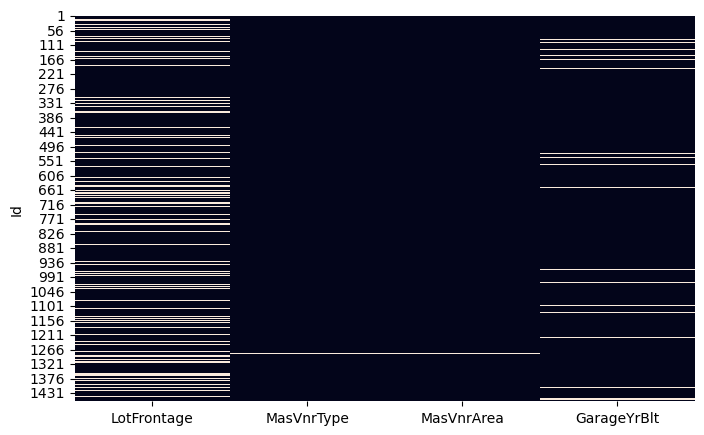

In [31]:
plt.figure(figsize = (8,5))
sns.heatmap(house[miss_col_lst].isnull(), cbar= False)
plt.show()

<font color = green> **Observations:** </font> From this heatmap, we can observe that missing values are random in nature.

#### 7) Imputation of Missing values

In [32]:
house[miss_col_lst].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   MasVnrType   1452 non-null   object 
 2   MasVnrArea   1452 non-null   float64
 3   GarageYrBlt  1379 non-null   float64
dtypes: float64(3), object(1)
memory usage: 57.0+ KB


`a) LotFrontage:` This is a quantitative variable which contains 17% of the missing values, Imputing the missing values with median, as median is least affected by outliers.

In [33]:
p50_LotFrontage = house.LotFrontage.median()
house.LotFrontage.fillna(p50_LotFrontage, inplace=True)

`b) MasVnrArea:` This is a quantitative variable which contains only 0.5% of the missing values, therefore missing value is imputed by the median of the non-missing records

In [34]:
p50_MasVnrArea = house.MasVnrArea.median()
house.MasVnrArea.fillna(p50_MasVnrArea, inplace=True)

`c) MasVnrType:` This is a qualitative variables which contains only 0.5% of the missing values, therefore missing value is imputed by the mode of the non-missing records

In [35]:
mode1 = house.MasVnrType.mode()[0]
house.MasVnrType.fillna(mode1, inplace=True)

`d) GarageYrBlt:` year of garage built is missing for those records where garage was not built. Therefore we have assigned 0 value to impute this variable.

In [36]:
house.GarageYrBlt.fillna(0, inplace=True)

In [37]:
house[miss_col_lst].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1460 non-null   float64
 1   MasVnrType   1460 non-null   object 
 2   MasVnrArea   1460 non-null   float64
 3   GarageYrBlt  1460 non-null   float64
dtypes: float64(3), object(1)
memory usage: 57.0+ KB


In [38]:
house.head(5)

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
Id                                                                             
1           60       RL         65.0     8450      Reg         Lvl    Inside   
2           20       RL         80.0     9600      Reg         Lvl       FR2   
3           60       RL         68.0    11250      IR1         Lvl    Inside   
4           70       RL         60.0     9550      IR1         Lvl    Corner   
5           60       RL         84.0    14260      IR1         Lvl       FR2   

   Neighborhood Condition1 BldgType HouseStyle  OverallQual  OverallCond  \
Id                                                                         
1       CollgCr       Norm     1Fam     2Story            7            5   
2       Veenker      Feedr     1Fam     1Story            6            8   
3       CollgCr       Norm     1Fam     2Story            7            5   
4       Crawfor       Norm     1Fam     2Story            7            5   
5       NoRidge       Norm     1Fam     2Story            8            5   

    YearBuilt  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  \
Id                                                                         
1        2003          2003     Gable     VinylSd     VinylSd    BrkFace   
2        1976          1976     Gable     MetalSd     MetalSd       None   
3        2001          2002     Gable     VinylSd     VinylSd    BrkFace   
4        1915          1970     Gable     Wd Sdng     Wd Shng       None   
5        2000          2000     Gable     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd        TA      PConc       Gd       TA           Av   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ         706          Unf           0        150          856   
2           ALQ         978          Unf           0        284         1262   
3           GLQ         486          Unf           0        434          920   
4           ALQ         216          Unf           0        540          756   
5           GLQ         655          Unf           0        490         1145   

   HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
Id                                                                              
1         Ex       856       854       1710             1         2         1   
2         Ex      1262         0       1262             0         2         0   
3         Ex       920       866       1786             1         2         1   
4         Gd       961       756       1717             1         1         0   
5         Ex      1145      1053       2198             1         2         1   

    BedroomAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces FireplaceQu GarageType  \
Id                                                                              
1              3          Gd             8           0          NA     Attchd   
2              3          TA             6           1          TA     Attchd   
3              3          Gd             6           1          TA     Attchd   
4              3          Gd             7           1          Gd     Detchd   
5              4          Gd             9           1          TA     Attchd   

    GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  WoodDeckSF  \
Id                                      

## <font color = blue> Correcting the Data-types and Values </font>

Mapping the **ordinal/interval categorical** variables values with numerical values as the categories/values are not clearly defined. Therefore **assigned rating**, starting from 1(worst) to max depending upon categories. This is as per industry standard and help us to find trend with target better.

In [39]:
house['LotShape'] = house.LotShape.map({'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3':1})
house['HouseStyle'] = house.HouseStyle.map({'1Story': 1, '2Story': 4, '1.5Fin': 3, 'SLvl':8, 'SFoyer':7, '1.5Unf': 2, '2.5Unf':5, '2.5Fin':6})
house['ExterQual'] = house.ExterQual.map({'TA': 3, 'Gd': 4, 'Ex': 5, 'Fa':2, 'Po': 1})
house['ExterCond'] = house.ExterCond.map({'TA': 3, 'Gd': 4, 'Ex': 5, 'Fa':2, 'Po': 1})
house['GarageFinish'] = house.GarageFinish.map({'Fin': 4, 'RFn': 3, 'Unf': 2, 'NA':1})
house['GarageQual'] = house.GarageQual.map({'TA': 4, 'Gd': 5, 'Ex': 6, 'Fa':3, 'Po': 2, 'NA': 1})
house['Fence'] = house.Fence.map({'MnPrv': 4, 'GdPrv': 5, 'GdWo': 3, 'NA':1, 'MnWw':2})
house['BsmtQual'] = house.BsmtQual.map({'TA': 4, 'Gd': 5, 'Ex': 6, 'Fa':3, 'Po': 2, 'NA': 1})
house['BsmtCond'] = house.BsmtCond.map({'TA': 4, 'Gd': 5, 'Ex': 6, 'Fa':3, 'Po': 2, 'NA': 1})
house['BsmtExposure'] = house.BsmtExposure.map({'Gd': 5, 'Mn': 3, 'Av':4, 'No': 2, 'NA': 1})
house['BsmtFinType1'] = house.BsmtFinType1.map({'Unf': 2, 'GLQ': 7, 'ALQ':6, 'BLQ': 5, 'Rec': 4, 'LwQ': 3, 'NA': 1})
house['BsmtFinType2'] = house.BsmtFinType2.map({'Unf': 2, 'GLQ': 7, 'ALQ':6, 'BLQ': 5, 'Rec': 4, 'LwQ': 3, 'NA': 1})
house['HeatingQC'] = house.HeatingQC.map({'TA': 3, 'Gd': 4, 'Ex': 5, 'Fa':2, 'Po': 1})
house['KitchenQual'] = house.KitchenQual.map({'TA': 3, 'Gd': 4, 'Ex': 5, 'Fa':2, 'Po': 1})
house['FireplaceQu'] = house.FireplaceQu.map({'TA': 4, 'Gd': 5, 'Ex': 6, 'Fa':3, 'Po': 2, 'NA': 1})

In [40]:
ordinal_cat_col = ['LotShape', 'HouseStyle', 'ExterQual', 'ExterCond', 'GarageFinish', 'GarageQual', 'Fence', 'BsmtQual',
                   'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu']

In [41]:
## Typecast to Categorical column
house[ordinal_cat_col] = house[ordinal_cat_col].astype('object')

<hr>

In [42]:
house.head(5)

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
Id                                                                             
1           60       RL         65.0     8450        4         Lvl    Inside   
2           20       RL         80.0     9600        4         Lvl       FR2   
3           60       RL         68.0    11250        3         Lvl    Inside   
4           70       RL         60.0     9550        3         Lvl    Corner   
5           60       RL         84.0    14260        3         Lvl       FR2   

   Neighborhood Condition1 BldgType HouseStyle  OverallQual  OverallCond  \
Id                                                                         
1       CollgCr       Norm     1Fam          4            7            5   
2       Veenker      Feedr     1Fam          1            6            8   
3       CollgCr       Norm     1Fam          4            7            5   
4       Crawfor       Norm     1Fam          4            7            5   
5       NoRidge       Norm     1Fam          4            8            5   

    YearBuilt  YearRemodAdd RoofStyle Exterior1st Exterior2nd MasVnrType  \
Id                                                                         
1        2003          2003     Gable     VinylSd     VinylSd    BrkFace   
2        1976          1976     Gable     MetalSd     MetalSd       None   
3        2001          2002     Gable     VinylSd     VinylSd    BrkFace   
4        1915          1970     Gable     Wd Sdng     Wd Shng       None   
5        2000          2000     Gable     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0         4         3      PConc        5        4            2   
2          0.0         3         3     CBlock        5        4            5   
3        162.0         4         3      PConc        5        4            3   
4          0.0         3         3     BrkTil        4        5            2   
5        350.0         4         3      PConc        5        4            4   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1             7         706            2           0        150          856   
2             6         978            2           0        284         1262   
3             7         486            2           0        434          920   
4             6         216            2           0        540          756   
5             7         655            2           0        490         1145   

   HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
Id                                                                              
1          5       856       854       1710             1         2         1   
2          5      1262         0       1262             0         2         0   
3          5       920       866       1786             1         2         1   
4          4       961       756       1717             1         1         0   
5          5      1145      1053       2198             1         2         1   

    BedroomAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces FireplaceQu GarageType  \
Id                                                                              
1              3           4             8           0           1     Attchd   
2              3           3             6           1           4     Attchd   
3              3           4             6           1           4     Attchd   
4              3           4             7           1           5     Detchd   
5              4           4             9           1           4     Attchd   

    GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  WoodDeckSF  \
Id                                      

## <font color = blue> Creating Derived Variables </font>

**YearBuilt, YearRemodAdd and GarageYrBlt:** All these variables represent different years and are interval qualitaitive variables.<br><br> In order to establish trends with target variable, these variables are segmented into groups. We have divided these variables into **5 bins** by segmenting the data at p20, p40, p60 and p80 percentiles.

In [43]:
to_be_derive_cols = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

In [44]:
grp = list(map(lambda x: x + '_grp', to_be_derive_cols))

In [45]:
for x, y in zip(to_be_derive_cols, grp):
    house[y] = pd.qcut(house[x], q = [0, 0.2, 0.4, 0.6, 0.8, 1.0], 
                      labels= ['G1-p20', 'G2-p40', 'G3-p60', 'G4-p80','G5-p100'])

In [46]:
## Typecast to Categorical column
house[grp] = house[grp].astype('object')

**Deleting the original variables**

In [47]:
house.drop(house[to_be_derive_cols],axis=1, inplace = True)

In [48]:
house.shape

(1460, 59)

<hr>

## <font color = blue> Identifying Qualitative and Quantitative variables </font>

In the data, **Qualitative numeric variables** are identified based on their unique values. This process is required in order to segregate Quantitative and Qualitative variables.

In [49]:
# checking unique values of all numerical variables
house.select_dtypes(include = [np.number]).nunique()

MSSubClass         15
LotFrontage       110
LotArea          1073
OverallQual        10
OverallCond         9
MasVnrArea        327
BsmtFinSF1        637
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
1stFlrSF          753
2ndFlrSF          417
GrLivArea         861
BsmtFullBath        4
FullBath            4
HalfBath            3
BedroomAbvGr        8
TotRmsAbvGrd       12
Fireplaces          4
GarageCars          5
GarageArea        441
WoodDeckSF        274
OpenPorchSF       202
EnclosedPorch     120
MoSold             12
YrSold              5
SalePrice         655
dtype: int64

Numeric variables with less than 15 unique values can be safely assumed as numerical qualitative variables. Thus, converting their datatype to 'object'

In [50]:
to_be_obj = ['MSSubClass', 'OverallQual', 'OverallCond','BsmtFullBath','FullBath', 'HalfBath',
             'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']

In [51]:
## Typecast to Categorical column
house[to_be_obj] = house[to_be_obj].astype('object')

#### Quantitative variables

In [52]:
quant_cols = house.select_dtypes(include = [np.number]).columns.tolist()
quant_cols.sort()

#### Qualitative variables

In [53]:
# Qualitative variable
qual_cols = house.select_dtypes(include = ['object']).columns.tolist()
qual_cols.sort()

<hr>

## <font color = blue> Outliers Treatment of Quantitative Variables </font>

In order to identify the outliers, we have analysed below p5 and above p95 quantiles values along with other statistics like mean, median, std, etc. For this purpose, we have created statistics summary table of all quantitative variables. We have also created Box-plot to visualize the spread of data.

In [54]:
# Creating below p5 and above p95 quantiles
quantile = list(np.arange(0.01,0.06, .01)) + list(np.arange(0.95,0.99, .01))

In [55]:
# Creating statistics summary table for outlier detection
round(house[quant_cols].describe(percentiles= quantile).transpose(), 2)

count       mean       std      min        1%        2%  \
1stFlrSF       1460.0    1162.63    386.59    334.0    520.00    583.70   
2ndFlrSF       1460.0     346.99    436.53      0.0      0.00      0.00   
BsmtFinSF1     1460.0     443.64    456.10      0.0      0.00      0.00   
BsmtFinSF2     1460.0      46.55    161.32      0.0      0.00      0.00   
BsmtUnfSF      1460.0     567.24    441.87      0.0      0.00      0.00   
EnclosedPorch  1460.0      21.95     61.12      0.0      0.00      0.00   
GarageArea     1460.0     472.98    213.80      0.0      0.00      0.00   
GrLivArea      1460.0    1515.46    525.48    334.0    692.18    768.00   
LotArea        1460.0   10516.83   9981.26   1300.0   1680.00   2124.74   
LotFrontage    1460.0      69.86     22.03     21.0     21.00     24.00   
MasVnrArea     1460.0     103.12    180.73      0.0      0.00      0.00   
OpenPorchSF    1460.0      46.66     66.26      0.0      0.00      0.00   
SalePrice      1460.0  180256.12  75967.22  34900.0  61815.97  79000.00   
TotalBsmtSF    1460.0    1057.43    438.71      0.0      0.00      0.00   
WoodDeckSF     1460.0      94.24    125.34      0.0      0.00      0.00   

                     3%        4%        5%       50%        95%        96%  \
1stFlrSF         625.00    660.36    672.95    1087.0    1831.25    1882.24   
2ndFlrSF           0.00      0.00      0.00       0.0    1141.05    1183.92   
BsmtFinSF1         0.00      0.00      0.00     383.5    1274.00    1309.00   
BsmtFinSF2         0.00      0.00      0.00       0.0     396.20     479.64   
BsmtUnfSF          0.00      0.00      0.00     477.5    1468.00    1523.32   
EnclosedPorch      0.00      0.00      0.00       0.0     180.15     193.28   
GarageArea         0.00      0.00      0.00     480.0     850.10     867.28   
GrLivArea        796.00    828.80    848.00    1464.0    2466.10    2545.72   
LotArea         2522.00   3095.04   3311.70    9478.5   17401.15   18857.60   
LotFrontage       30.00     34.00     35.95      69.0     104.00     107.00   
MasVnrArea         0.00      0.00      0.00       0.0     456.00     487.40   
OpenPorchSF        0.00      0.00      0.00      25.0     175.05     193.92   
SalePrice      82000.00  85000.00  88000.00  163000.0  326100.00  344151.48   
TotalBsmtSF      312.33    446.48    519.30     991.5    1753.00    1834.92   
WoodDeckSF         0.00      0.00      0.00       0.0     335.00     359.20   

                     97%        98%        99%       max  
1stFlrSF         1981.61    2072.28    2219.46    4692.0  
2ndFlrSF         1245.53    1318.56    1418.92    2065.0  
BsmtFinSF1       1375.99    1442.64    1572.41    5644.0  
BsmtFinSF2        546.23     658.12     830.38    1474.0  
BsmtUnfSF        1589.38    1678.20    1797.05    2336.0  
EnclosedPorch     216.00     235.64     261.05     552.0  
GarageArea        884.00     907.46    1002.79    1418.0  
GrLivArea        2633.23    2782.38    3123.48    5642.0  
LotArea         21571.80   25251.62   37567.64  215245.0  
LotFrontage       114.00     120.82     137.41     313.0  
MasVnrArea        573.69     650.82     791.28    1600.0  
OpenPorchSF       213.23     240.82     285.82     547.0  
SalePrice      374230.00  394931.06  442567.01  500000.0  
TotalBsmtSF      1905.46    2001.64    2155.05    6110.0  
WoodDeckSF        385.38     430.10     505.46     857.0

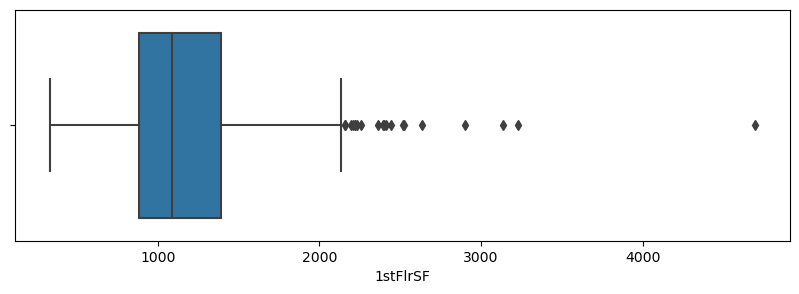

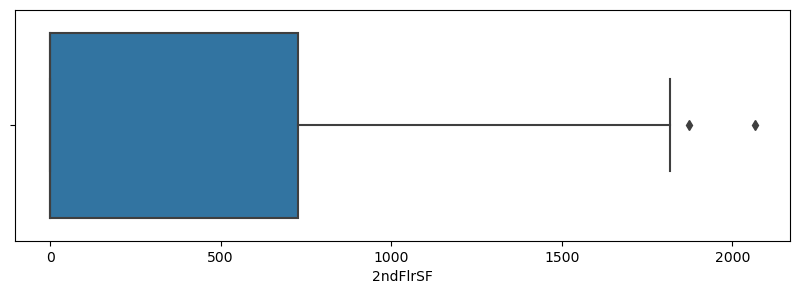

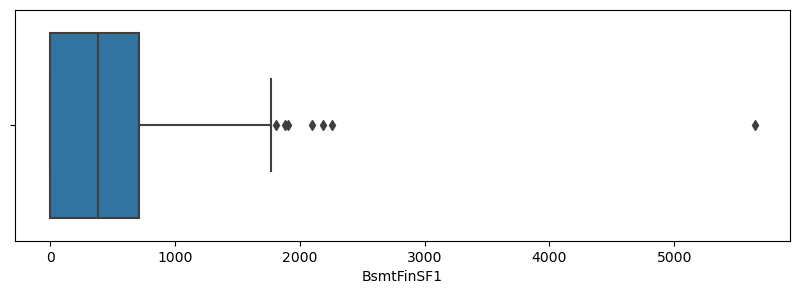

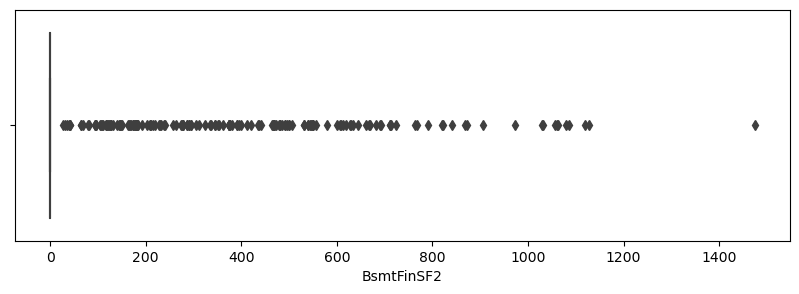

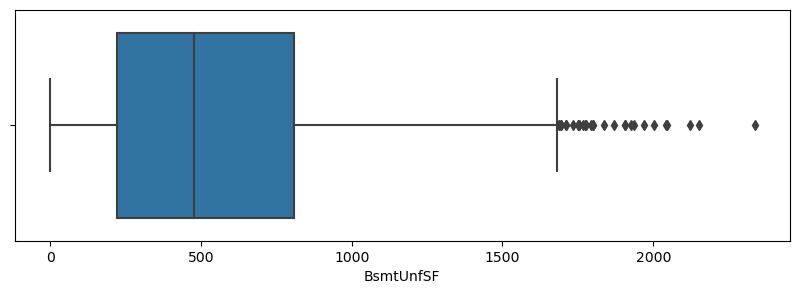

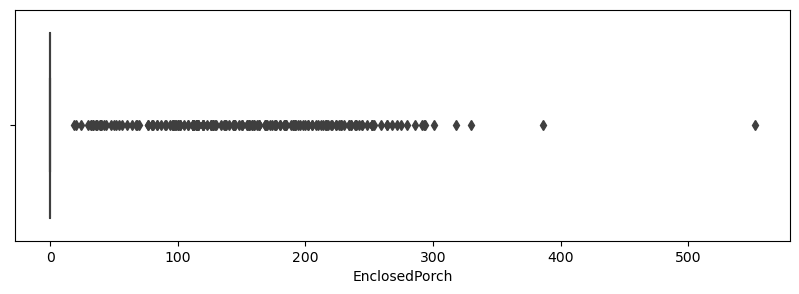

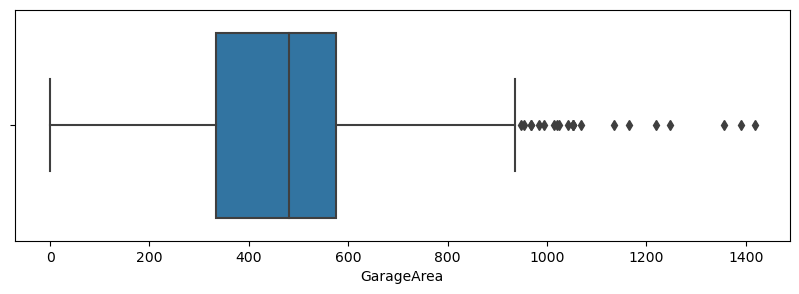

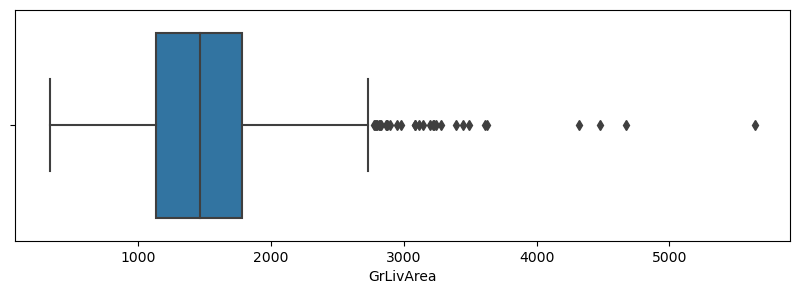

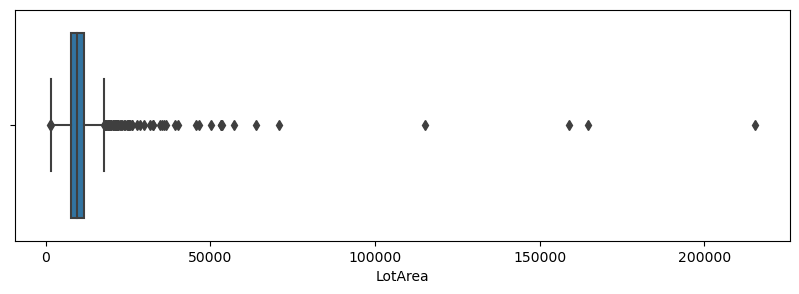

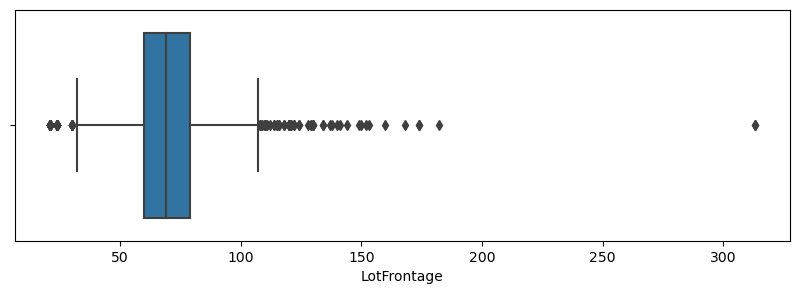

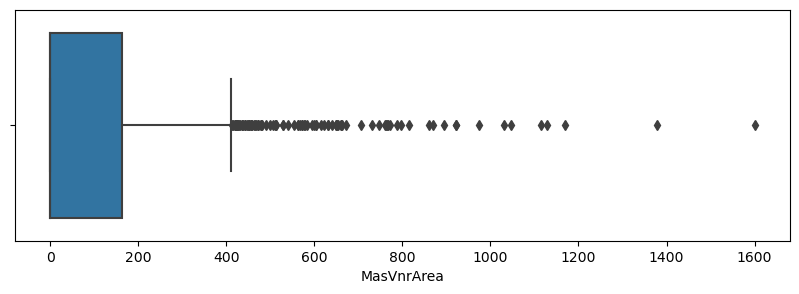

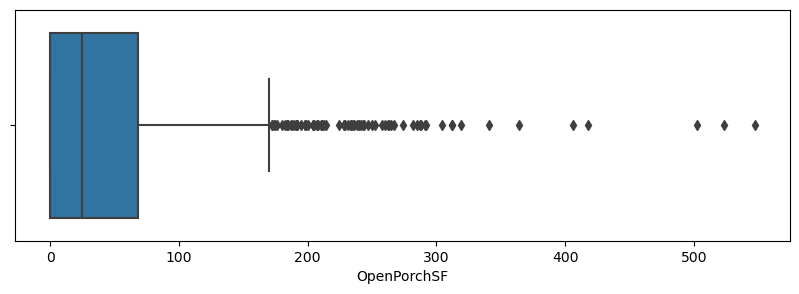

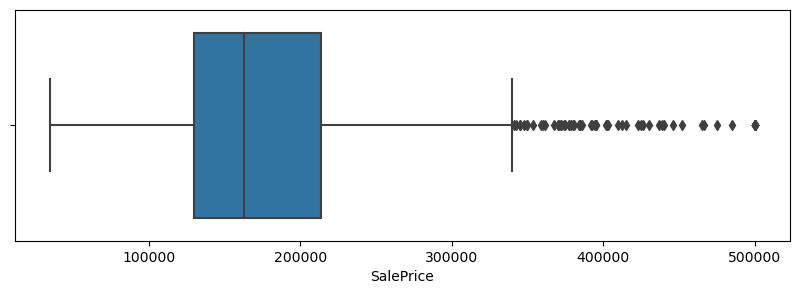

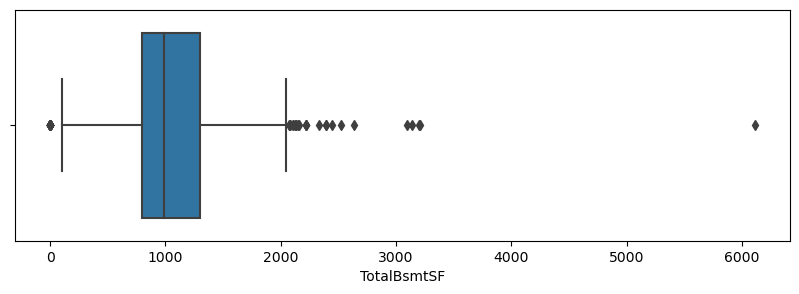

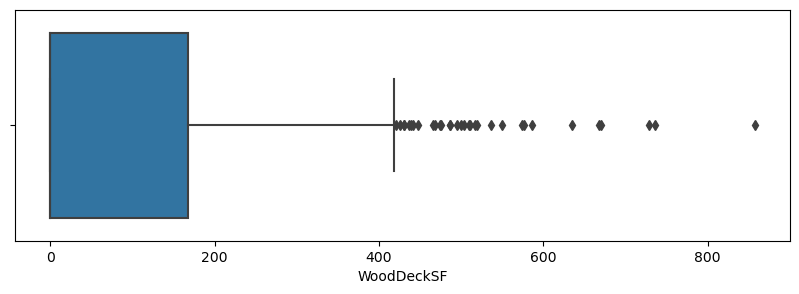

In [56]:
# Creating Box-plot to visualize spread of the data
for col in quant_cols:
    plt.figure(figsize = (10,3))
    sns.boxplot(x = house[col])
    plt.show()

<font color = green> **Observations:** </font> By analysing the box-plot and statistics summary table, we can observe that all the variables have right-skewed data and outliers are detected for most of the quantitative variables. To treat these outliers, we have used the **concept of ceiling**.

**1. 1stFlrSF**

In [57]:
#Ceiling treatment performed at p99 
ceiling = house['1stFlrSF'].quantile(.99)
house['1stFlrSF'] = house['1stFlrSF'].apply(lambda x: ceiling if x > ceiling else x)

**2. 2ndFlrSF**

In [58]:
#Ceiling treatment performed at p99
ceiling = house['2ndFlrSF'].quantile(.99)
house['2ndFlrSF'] = house['2ndFlrSF'].apply(lambda x: ceiling if x > ceiling else x)

**3. BsmtFinSF1**

In [59]:
#Ceiling treatment performed at p99
ceiling = house.BsmtFinSF1.quantile(.99)
house.BsmtFinSF1 = house.BsmtFinSF1.apply(lambda x: ceiling if x > ceiling else x)

**4. BsmtFinSF2**

In [60]:
#Ceiling BsmtFinSF2 to 1200
house.BsmtFinSF2 = house.BsmtFinSF2.apply(lambda x: 1200 if x > 1200 else x)

**5. BsmtUnfSF**

In [61]:
#Ceiling treatment performed at p99
ceiling = house.BsmtUnfSF.quantile(.99)
house.BsmtUnfSF = house.BsmtUnfSF.apply(lambda x: ceiling if x > ceiling else x)

**6. EnclosedPorch**

In [62]:
#Ceiling treatment performed at 300
house.EnclosedPorch = house.EnclosedPorch.apply(lambda x: 300 if x > 300 else x)

**7. GarageArea**

In [63]:
#Ceiling treatment performed at p99
ceiling = house.GarageArea.quantile(.99)
house.GarageArea = house.GarageArea.apply(lambda x: ceiling if x > ceiling else x)

**8. GrLivArea**

In [64]:
#Ceiling treatment performed at p99
ceiling = house.GrLivArea.quantile(.99)
house.GrLivArea = house.GrLivArea.apply(lambda x: ceiling if x > ceiling else x)

**9. LotArea**

In [65]:
#Ceiling treatment performed at p99
ceiling = house.LotArea.quantile(.99)
house.LotArea = house.LotArea.apply(lambda x: ceiling if x > ceiling else x)

**10. LotFrontage**

In [66]:
#Ceiling treatment performed at p99
ceiling = house.LotFrontage.quantile(.99)
house.LotFrontage = house.LotFrontage.apply(lambda x: ceiling if x > ceiling else x)

**11. MasVnrArea**

In [67]:
#Ceiling treatment performed at p99
ceiling = house.MasVnrArea.quantile(.99)
house.MasVnrArea = house.MasVnrArea.apply(lambda x: ceiling if x > ceiling else x)

**12. OpenPorchSF**

In [68]:
#Ceiling OpenPorchSF to 300
house.OpenPorchSF = house.OpenPorchSF.apply(lambda x: 300 if x > 300 else x)

**13. TotalBsmtSF**

In [69]:
#Ceiling TotalBsmtSF to 3000
house.TotalBsmtSF = house.TotalBsmtSF.apply(lambda x: 3000 if x > 3000 else x)

**14. WoodDeckSF**

In [70]:
#Ceiling WoodDeckSF to 600
house.WoodDeckSF = house.WoodDeckSF.apply(lambda x: 600 if x > 600 else x)

<hr>

#### Visualizing variables

Pairplot can be used to perform univariate and bi-variate analysis across all the quantitative variables.
We can observed linear/non-linear relationships across predictors and along with target variable (SalePrice)

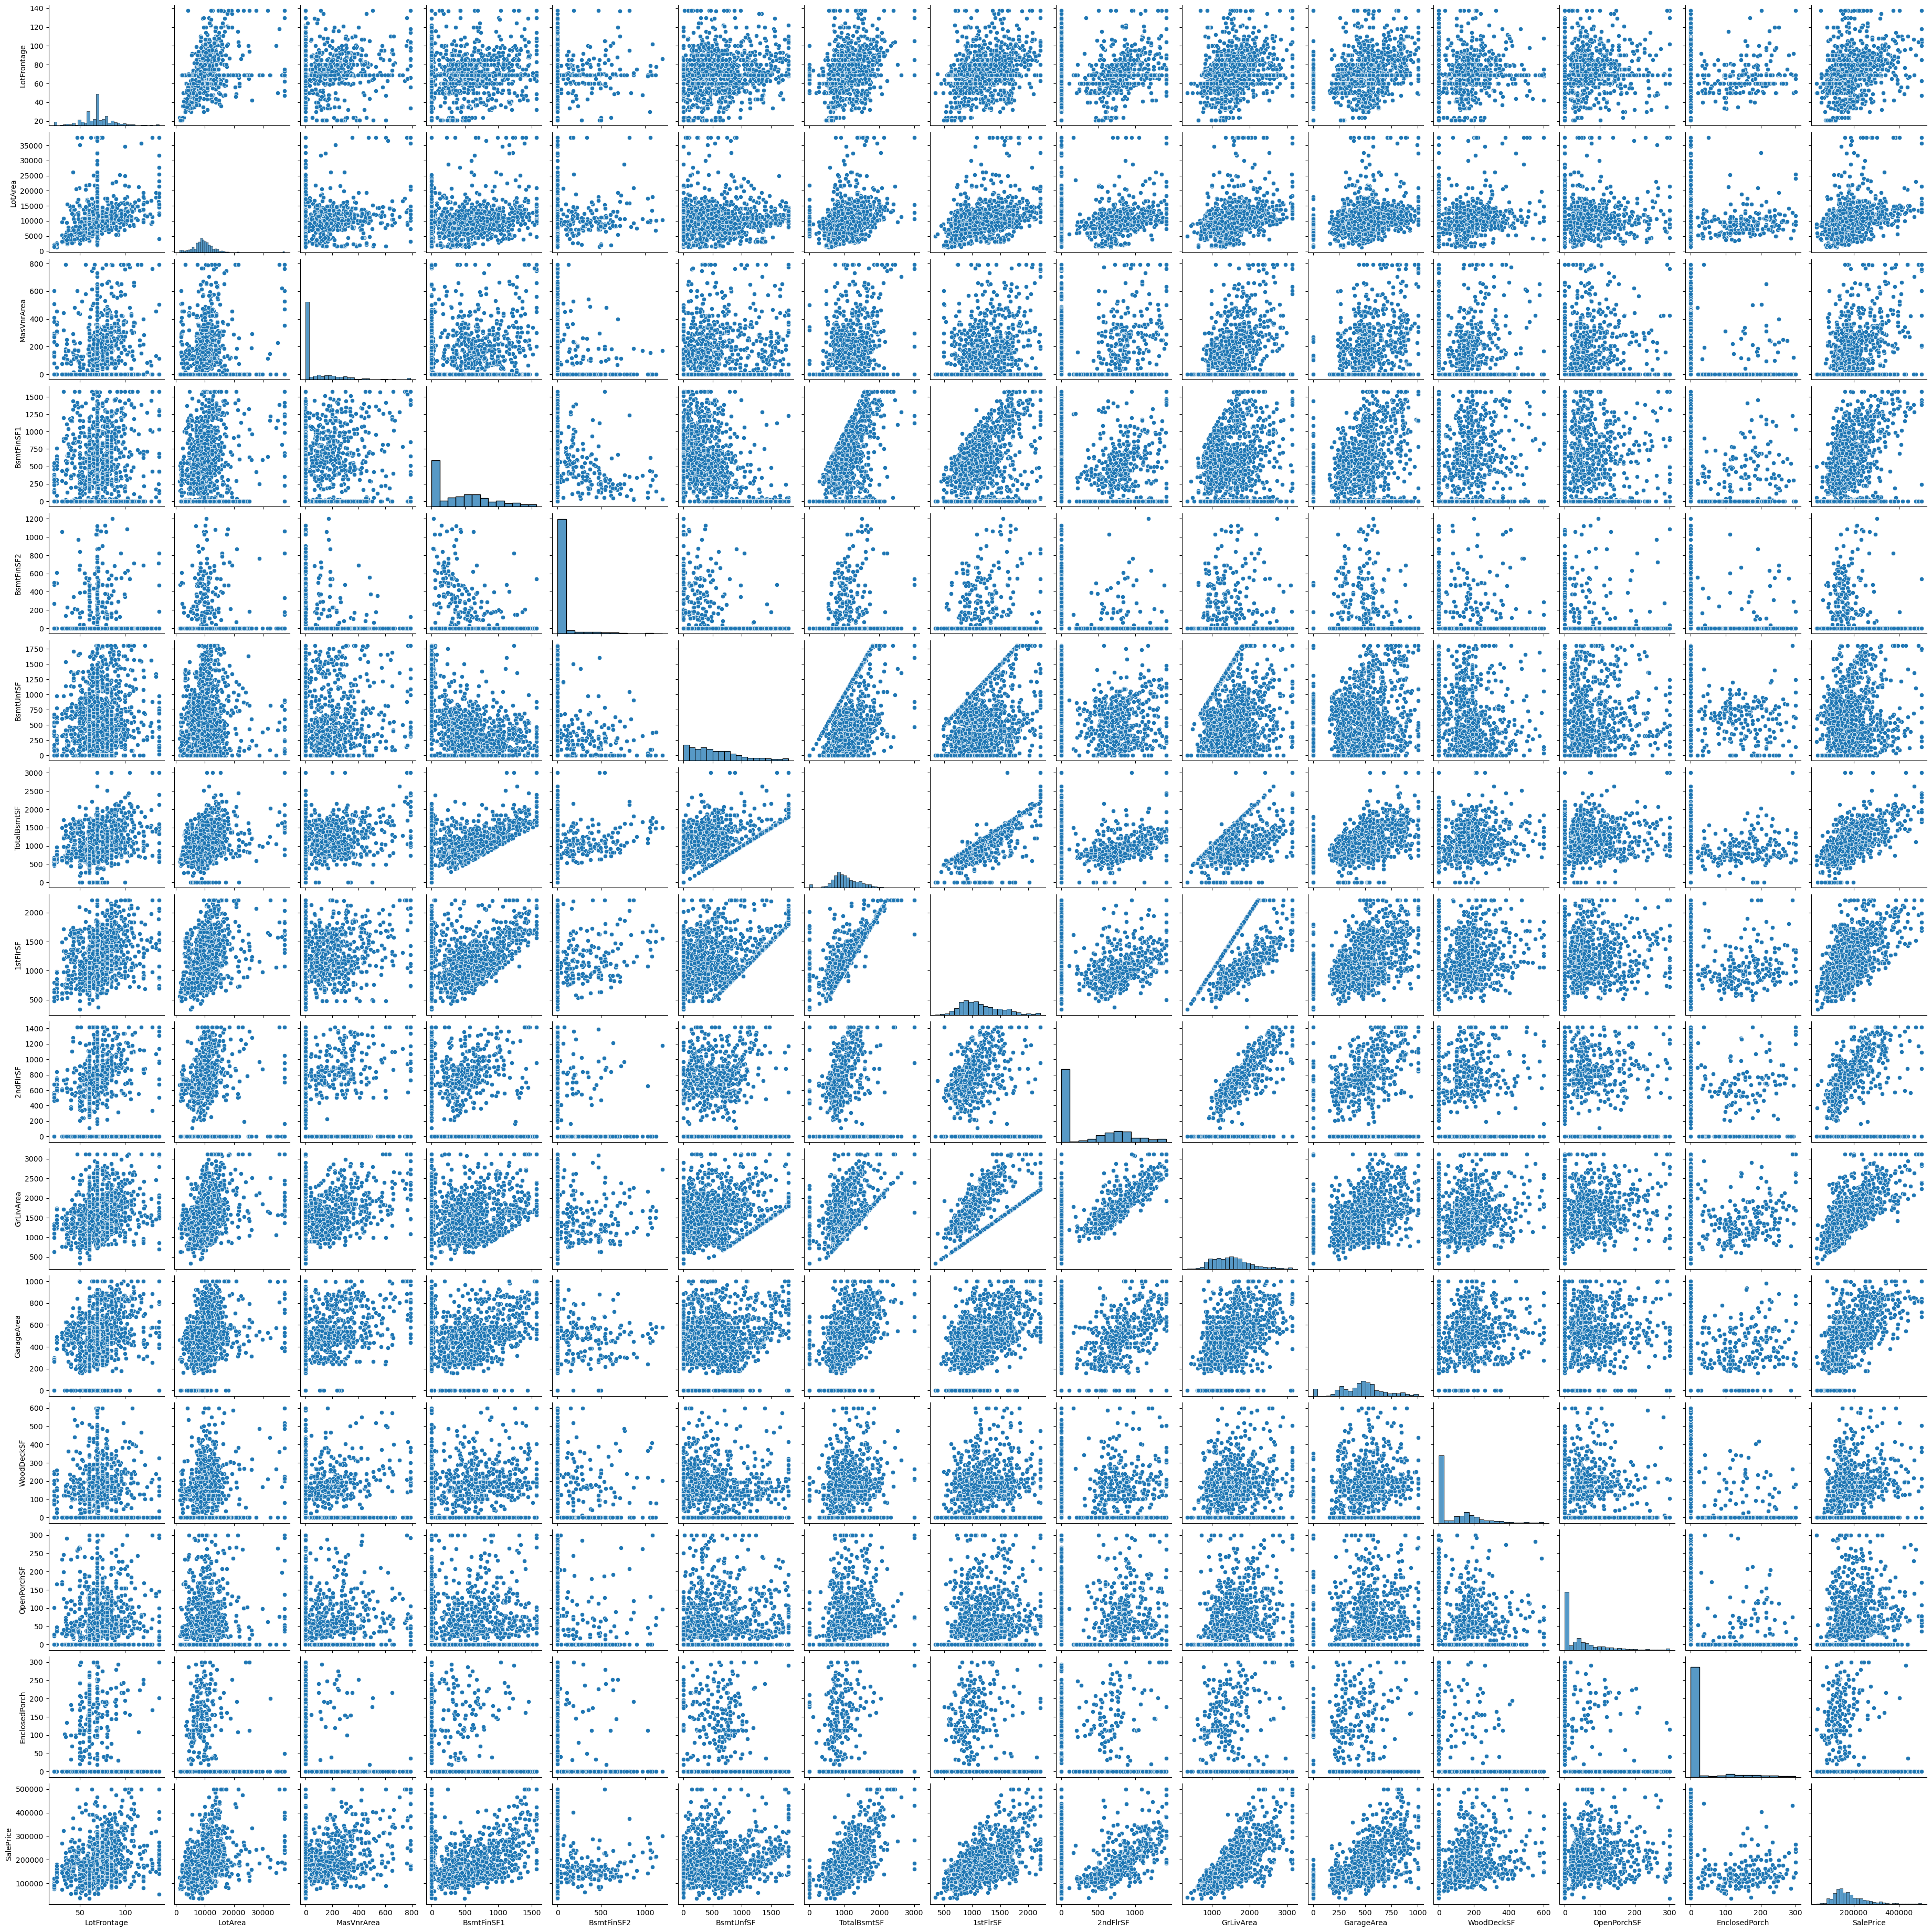

In [205]:
quant_cols = house.select_dtypes(include = [np.number]).columns.tolist()
sns.pairplot(house[quant_cols])
plt.show()

#### We can better plot correlation matrix between variables to know the exact values of correlation between them. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

## <font color = blue> Correlation between the Quantitative Variables </font>

Two highly correlated quantitative variables can have nearly the same ability to predict the outcome value. In our case, the outcome is house Sale Price. Correlation is scaled from 0 (no correlation) to 1 (causation). 

If we keep highly correlated (assuming r > 0.8) variables in our data then they will not add any extra information to the response variable and will only add noise in the data

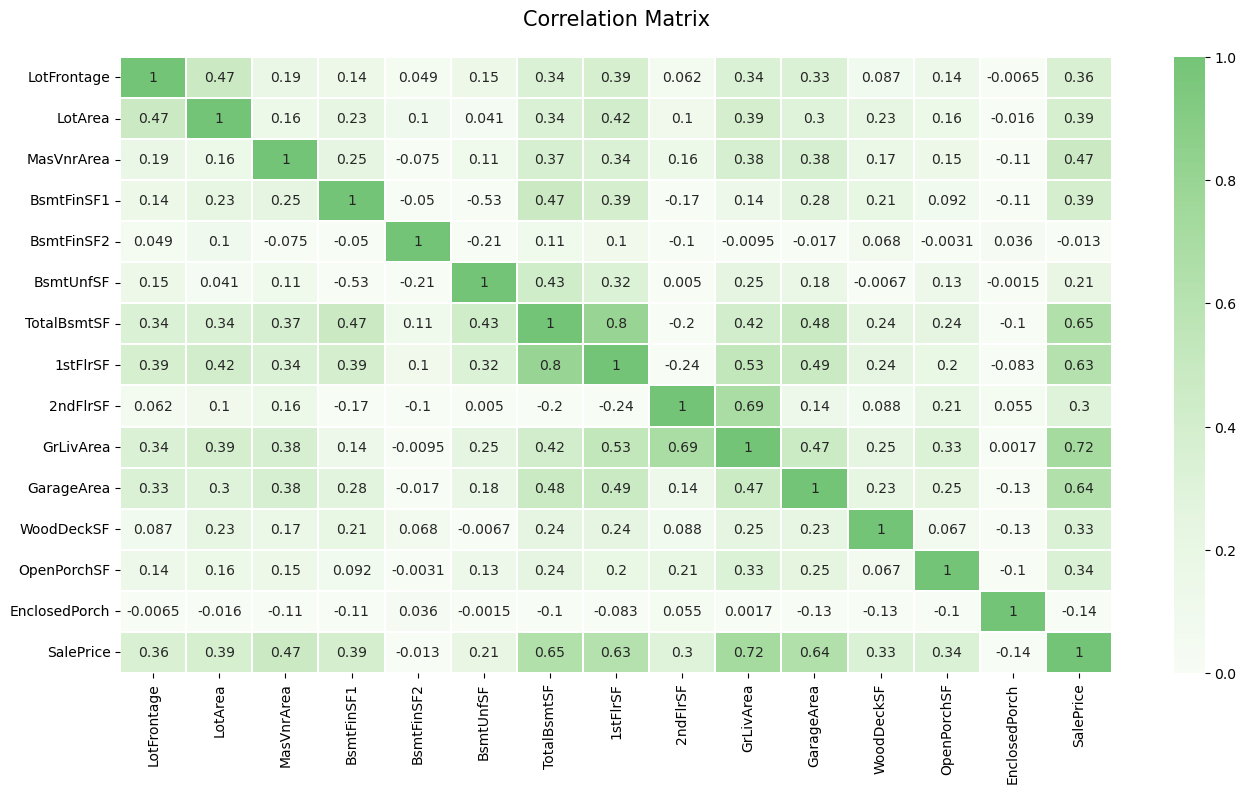

In [73]:
# Calculated correlation matrix for all quantitative variables
plt.figure(figsize = (16, 8))
sns.heatmap(house[quant_cols].corr(),  cmap='Greens', annot = True, center=True, linewidths=0.2, linecolor='white', vmin=0, vmax=1)
plt.title('Correlation Matrix\n', fontdict={'fontsize': 15, 'fontweight' : 5})
plt.show()

<font color = green> **Observations:**</font>  <br>
>1) In the above correlation matrix, we have identified that 'SalePrice' (Response variable) is highly correlated with '1stFlrSF', 'GarageArea', 'GrLivArea' and 'TotalBsmtSF' variables (Predictors) with r > 0.60.<br>
>2) '1stFlrSF' and 'TotalBsmtSF' predictors are highly correlated with r = 0.8. Additionally, both the predictors are almost equally correlated with SalePrice thus will explain the same variance in response variable. Therefore **excluding '1stFlrSF' from further analysis.**

In [71]:
# Dropping the '1stFlrSF' variable
house.drop(['1stFlrSF'], axis=1, inplace= True)

In [72]:
house.shape

(1460, 58)

<hr>

## <font color = blue> Univariate / Bivariate analysis of Qualitative variables </font>

- **Countplot** is used for univariate analysis.<br>
- **Boxplot** is used for bivariate analysis with Target variable.<br>

#### We have summarized all our observations after the charts

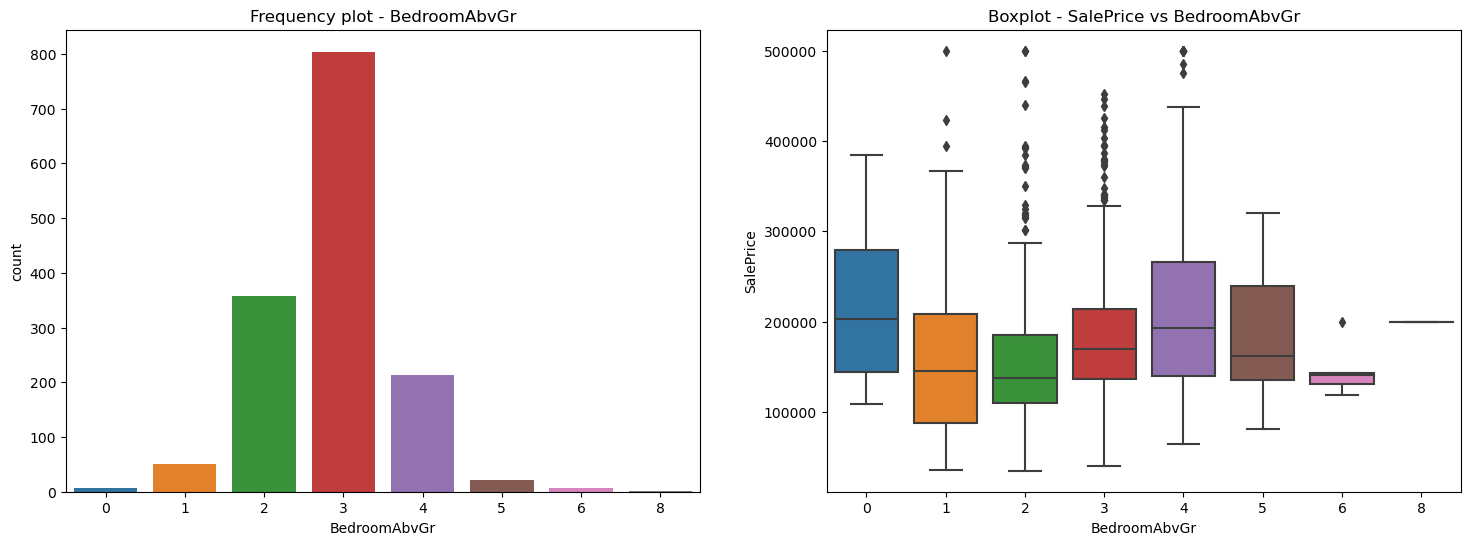

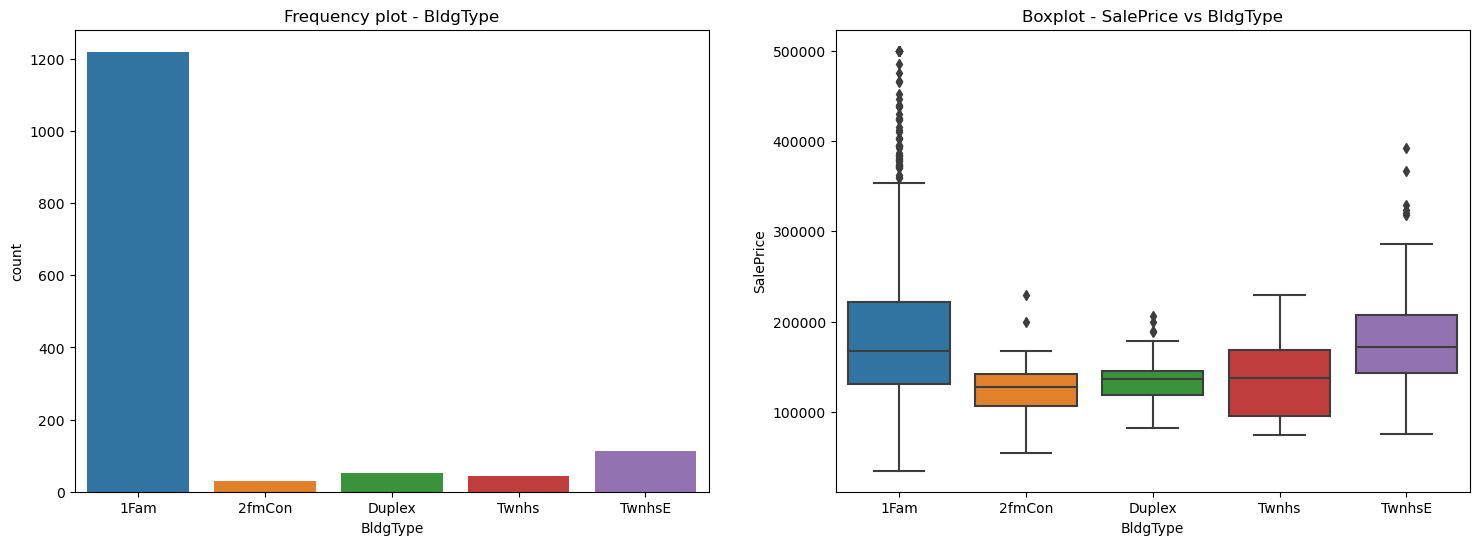

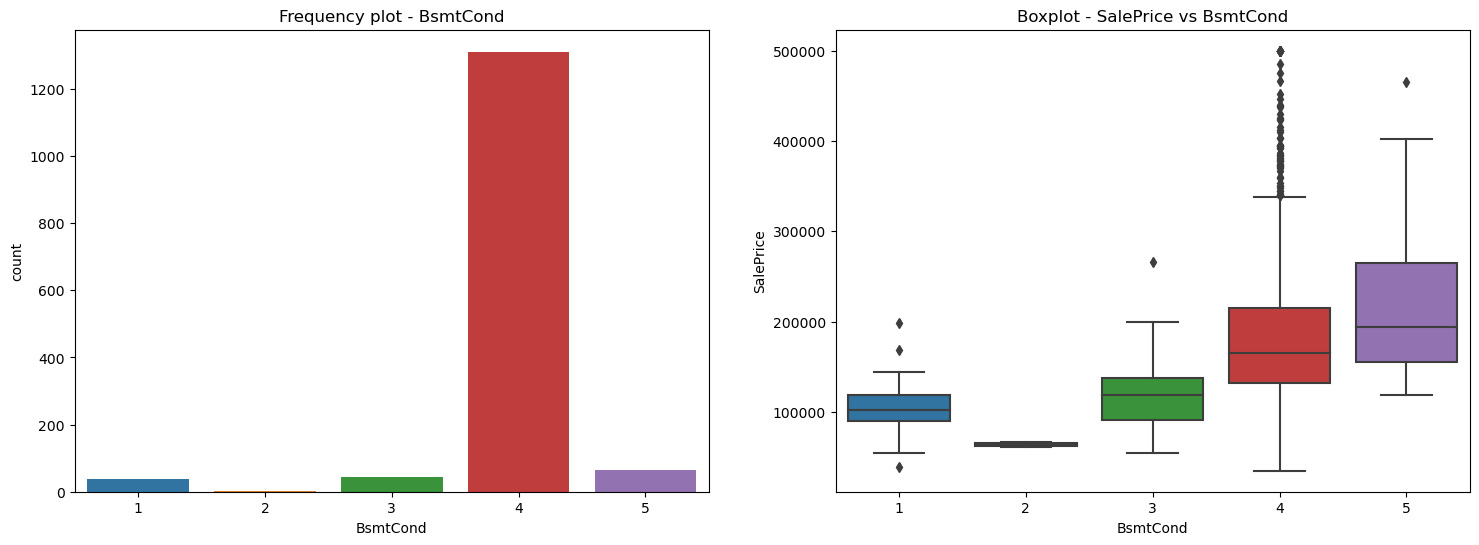

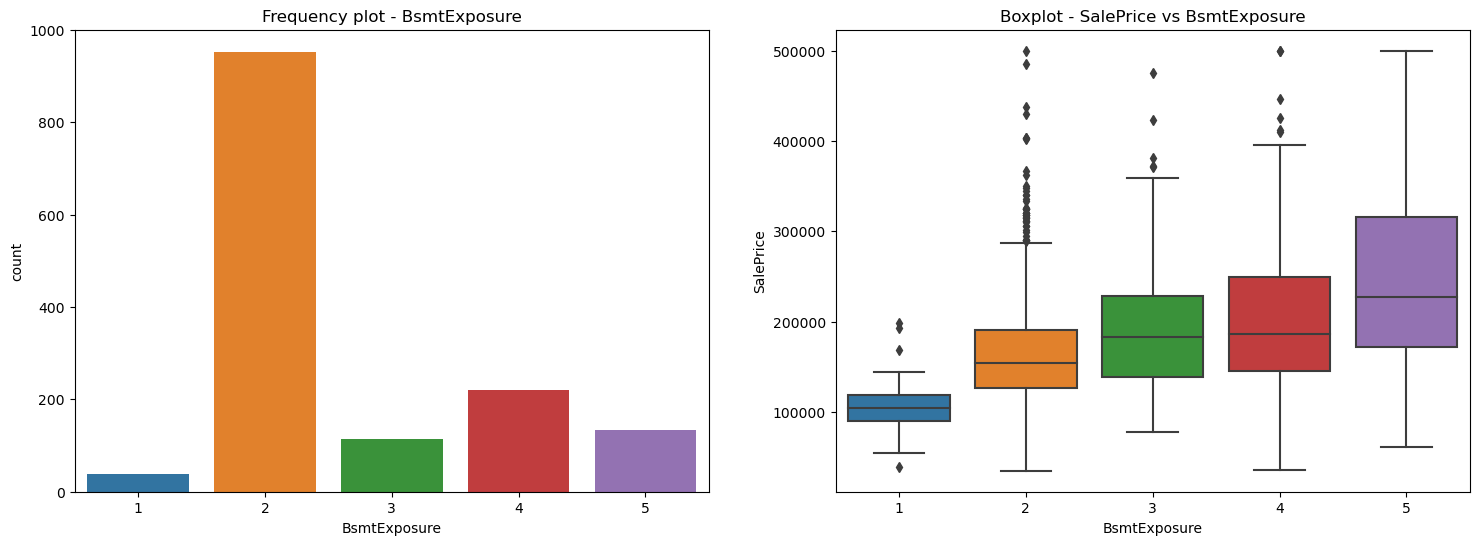

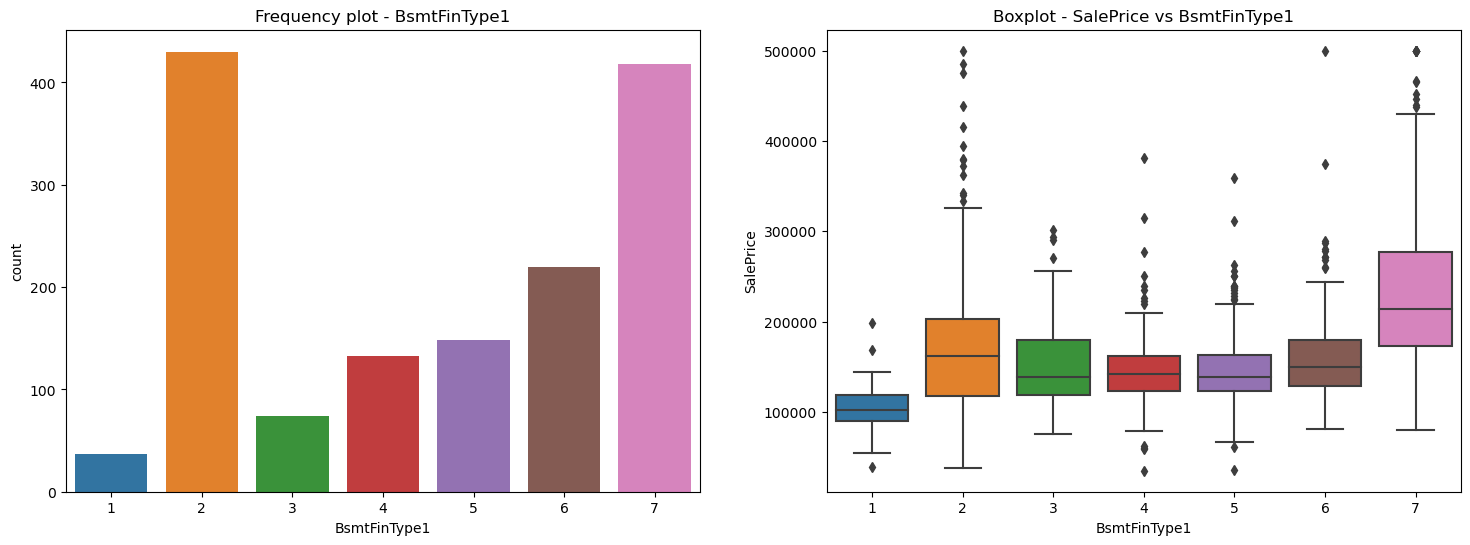

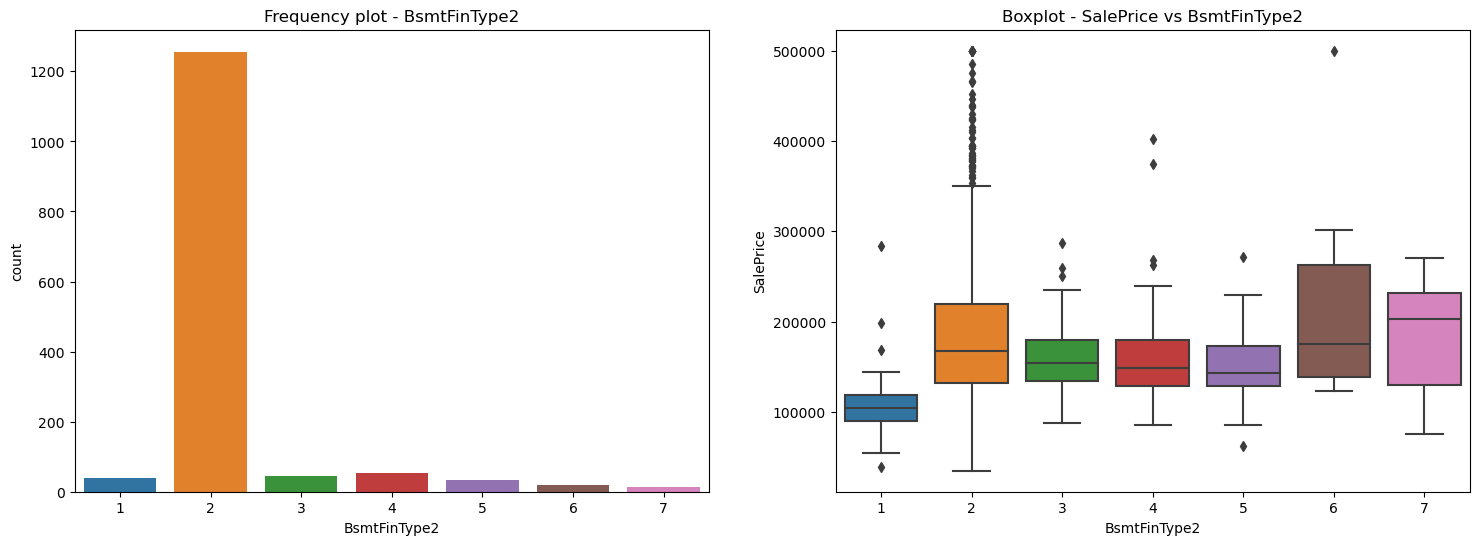

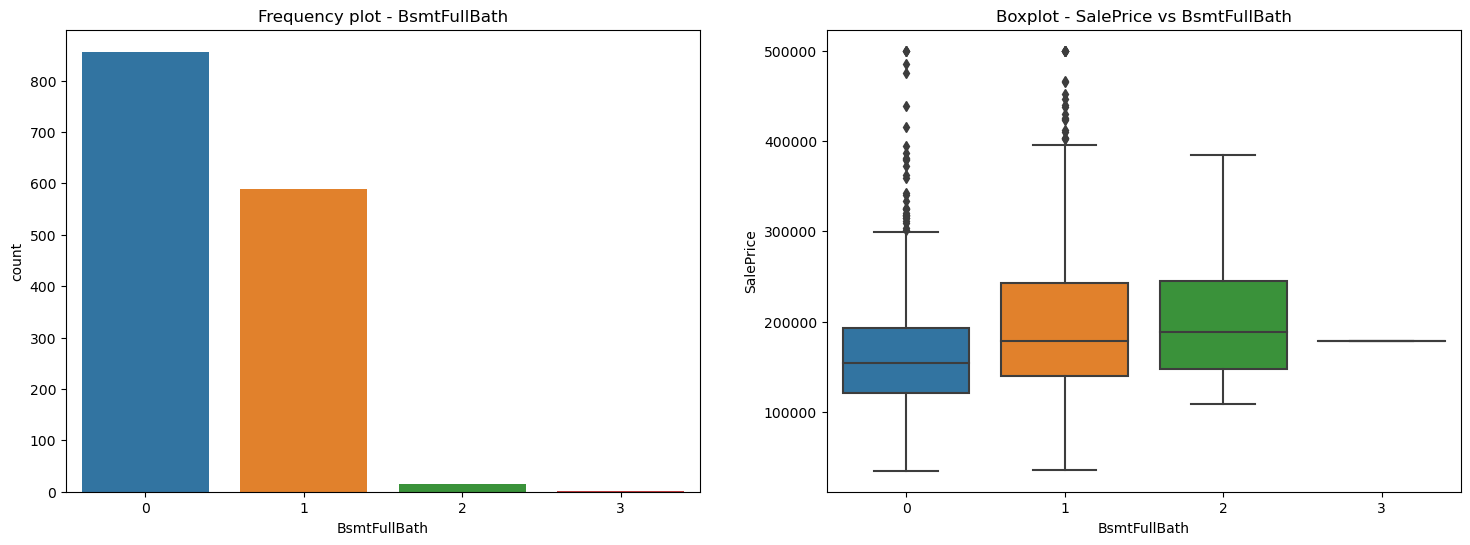

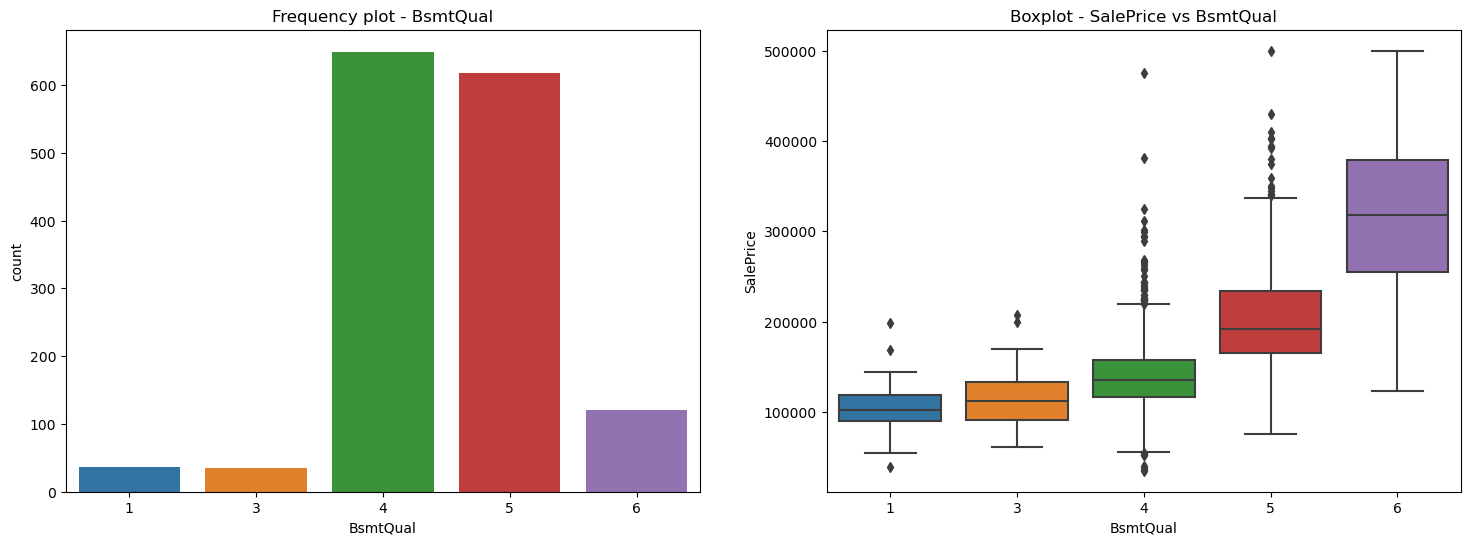

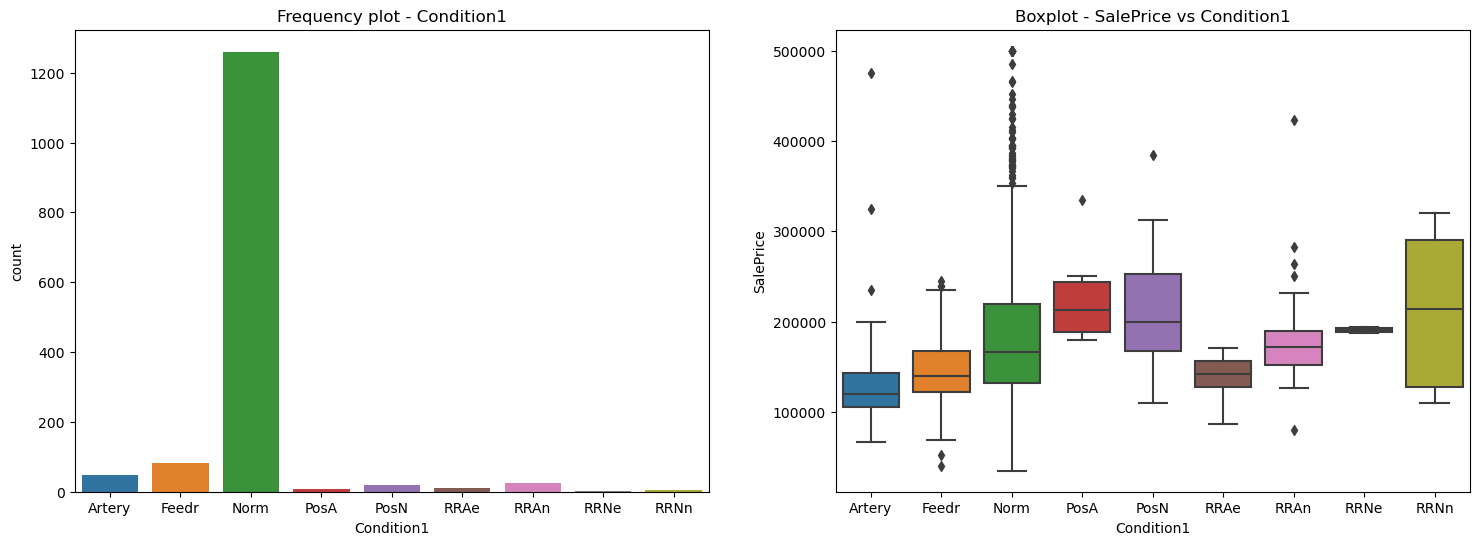

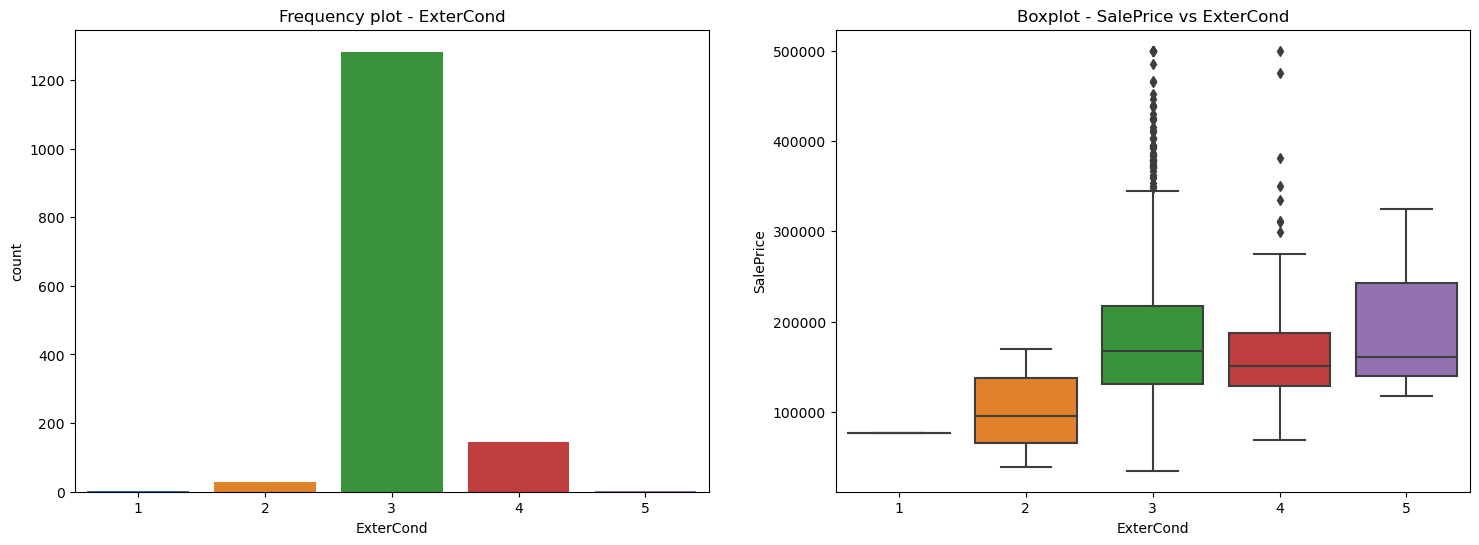

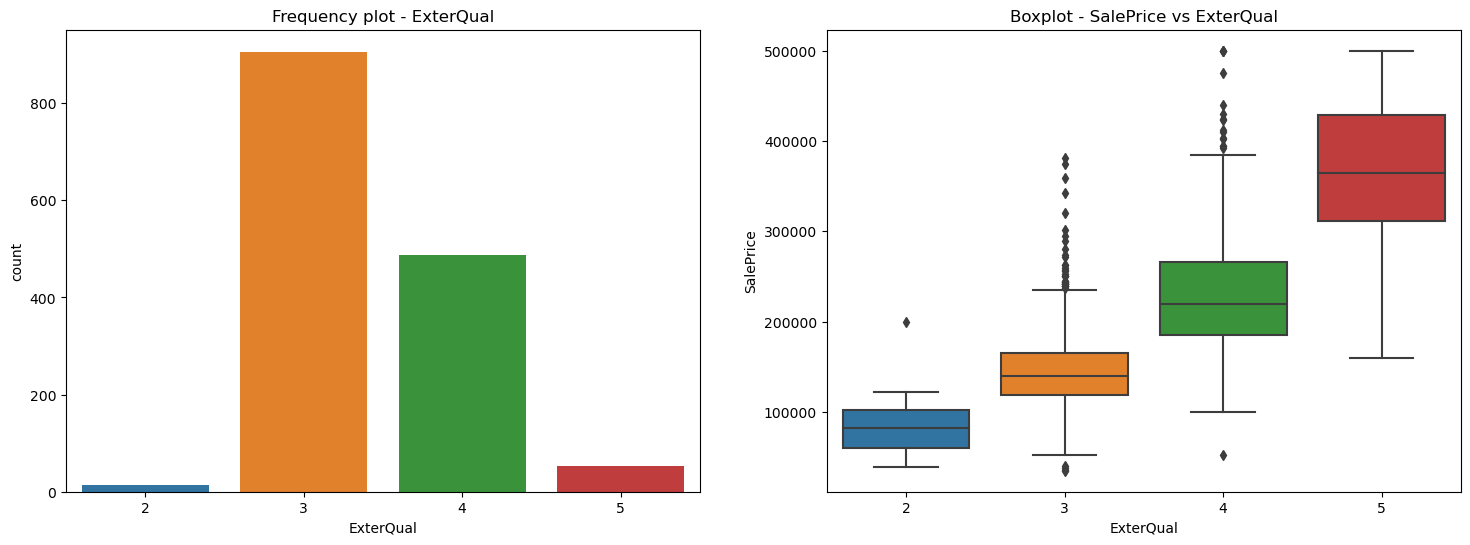

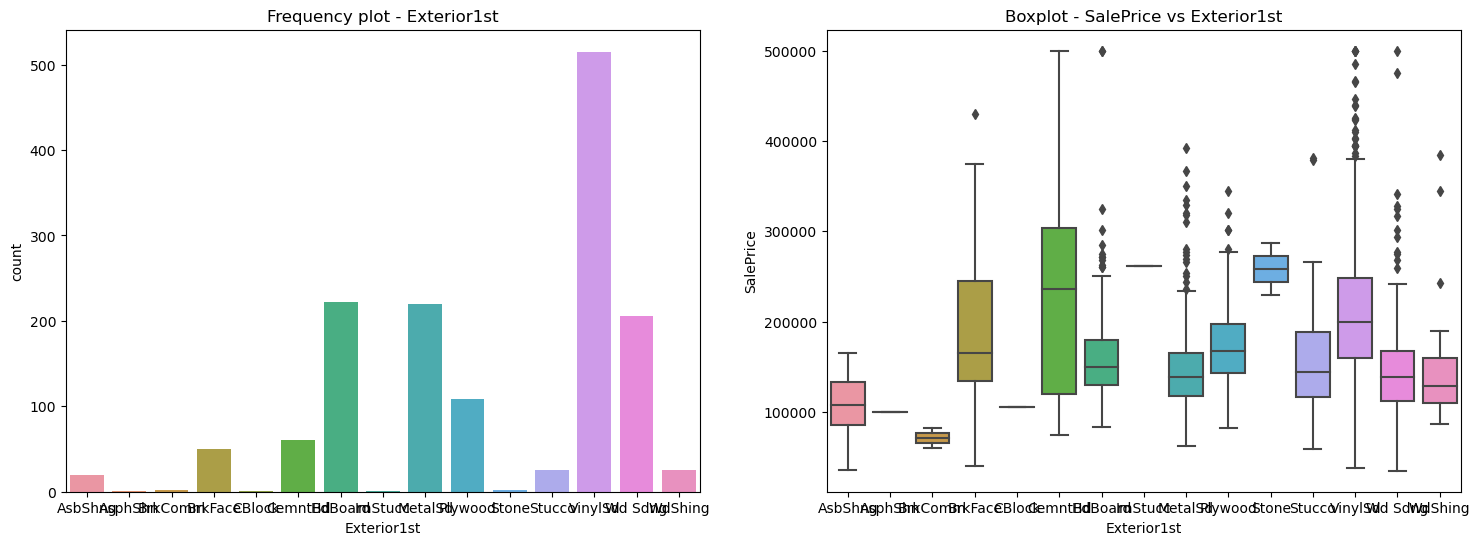

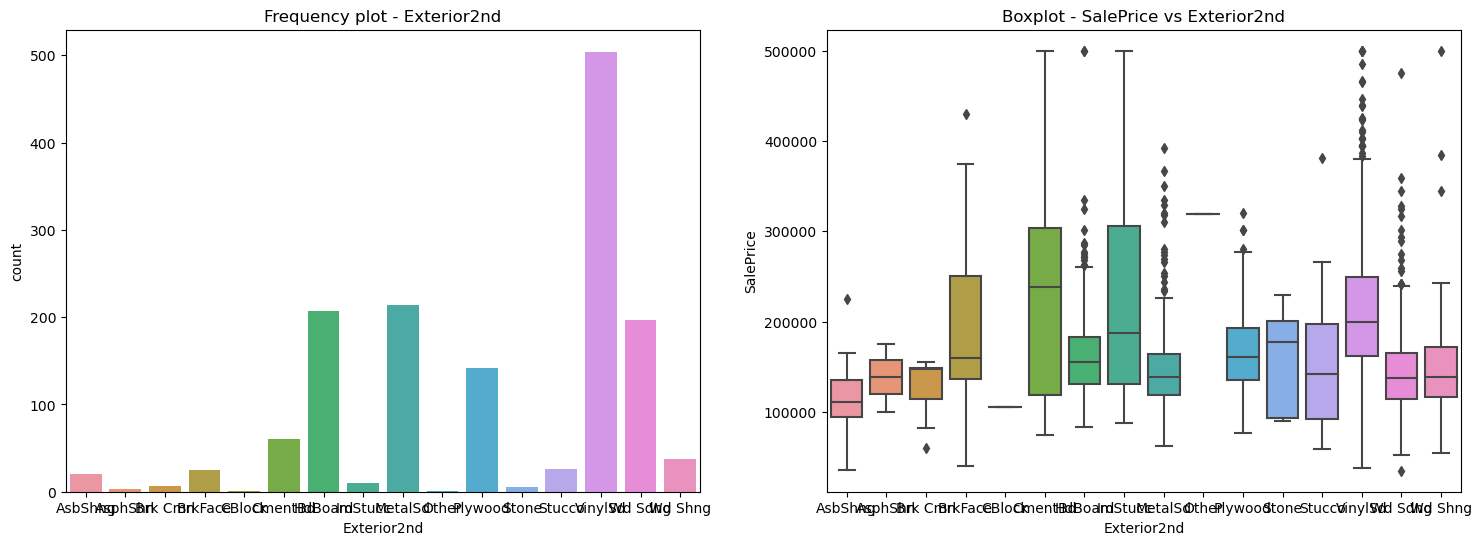

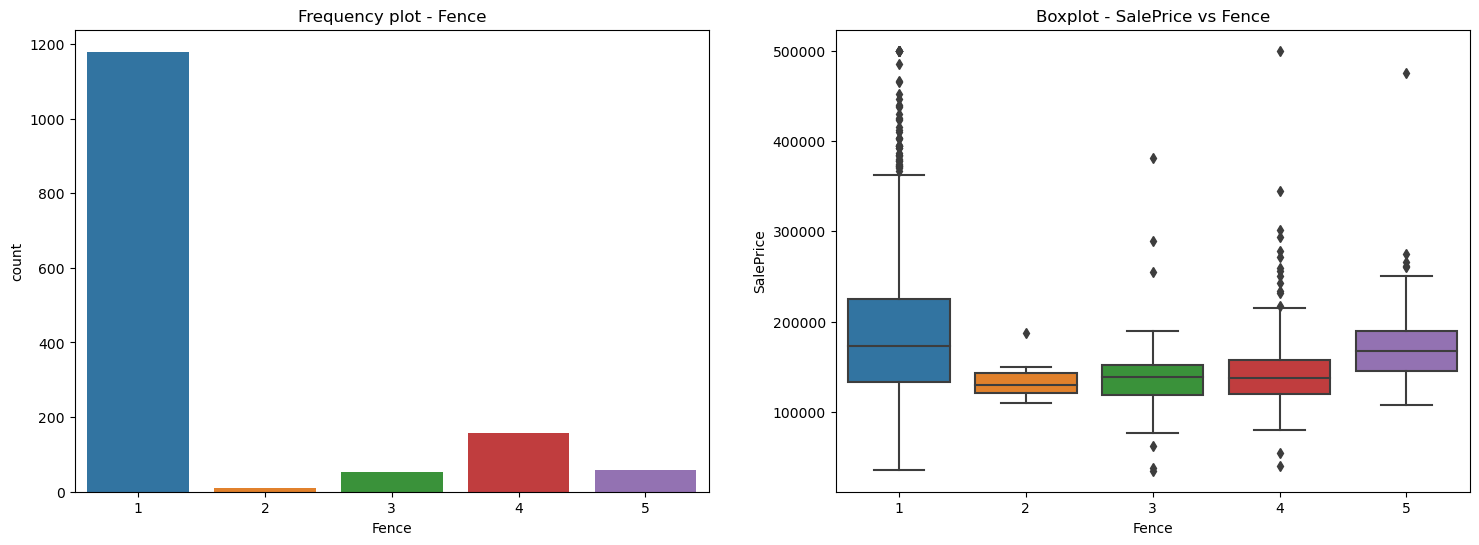

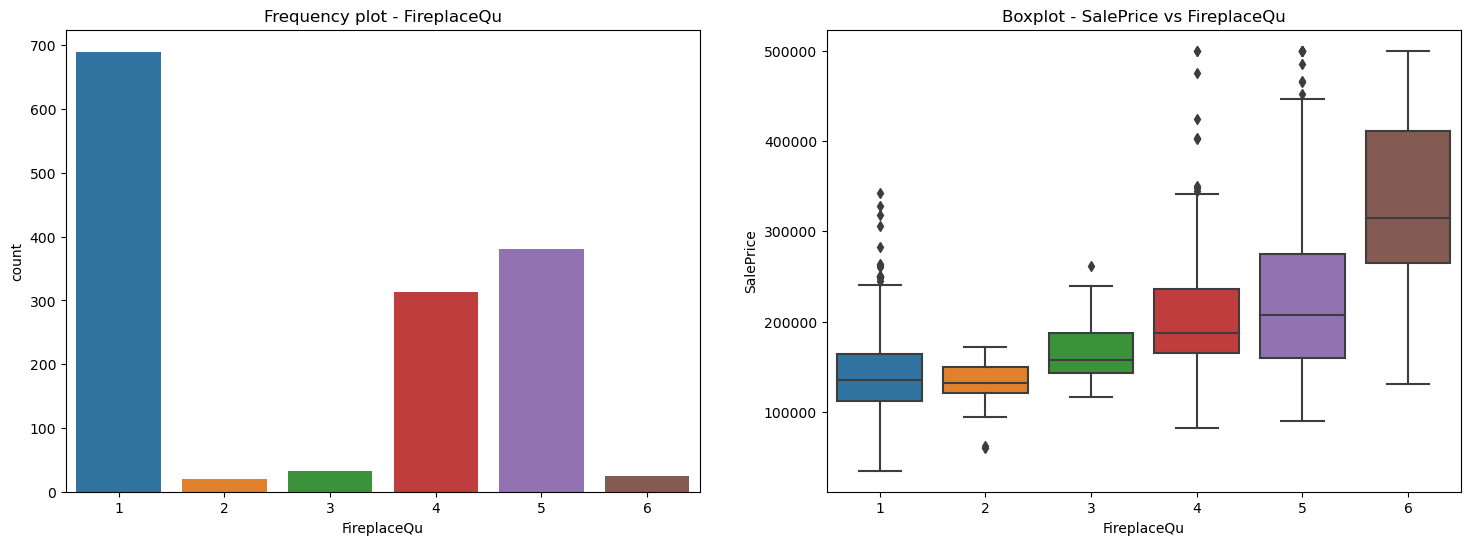

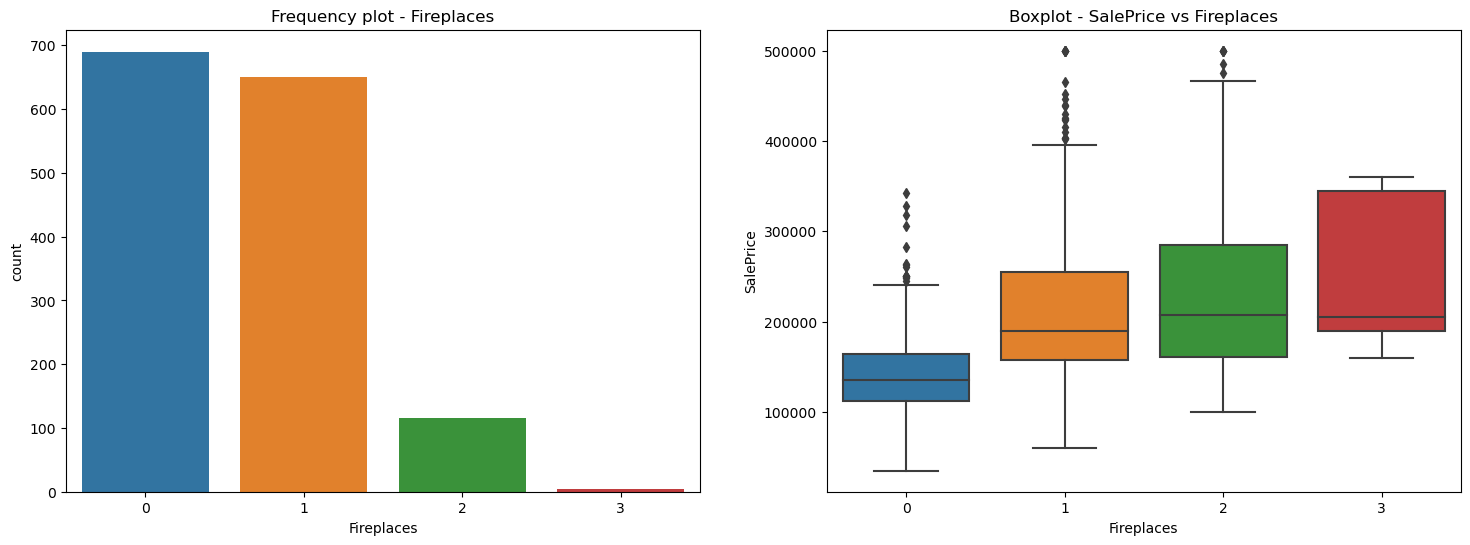

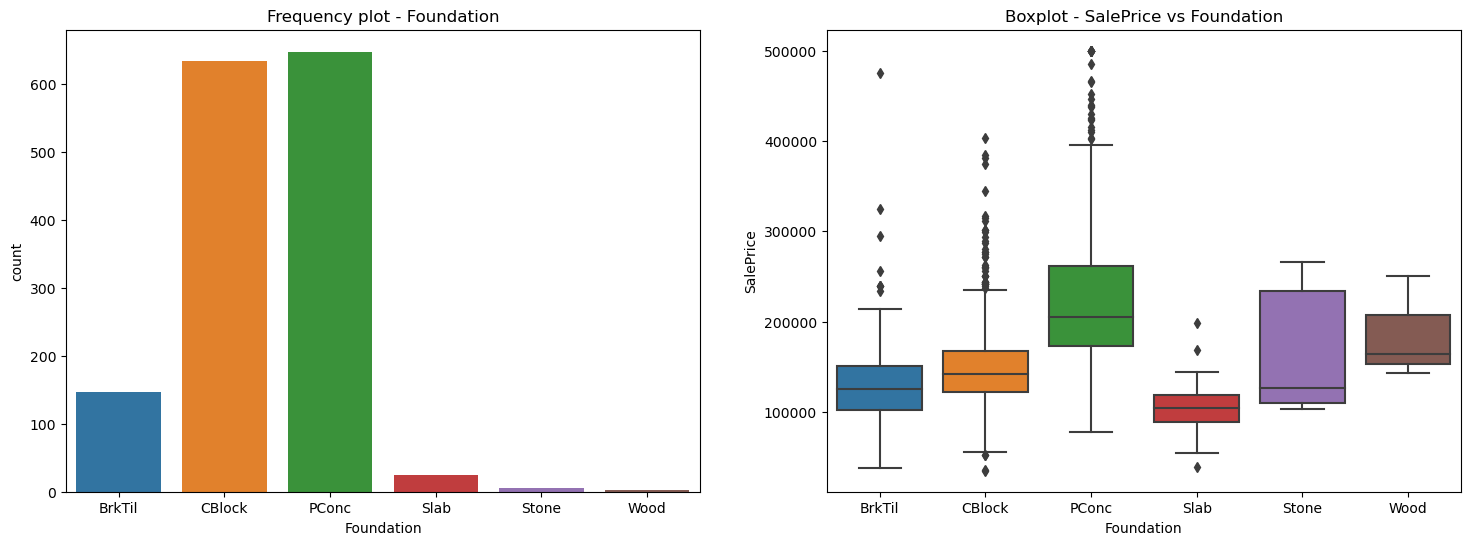

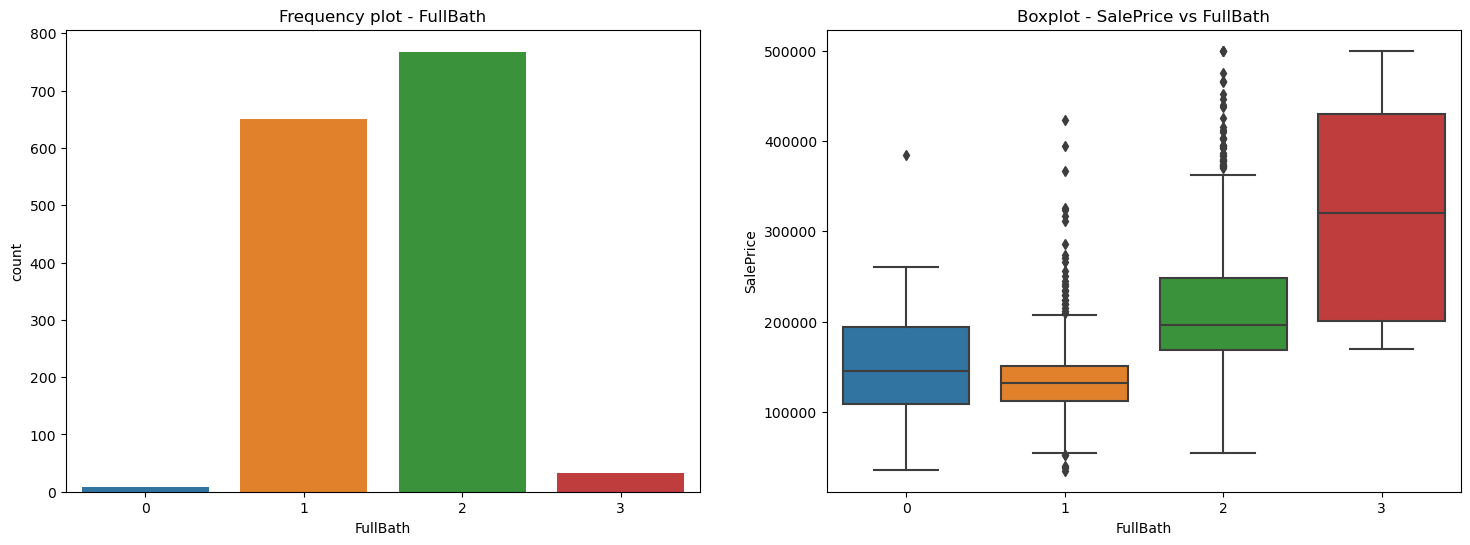

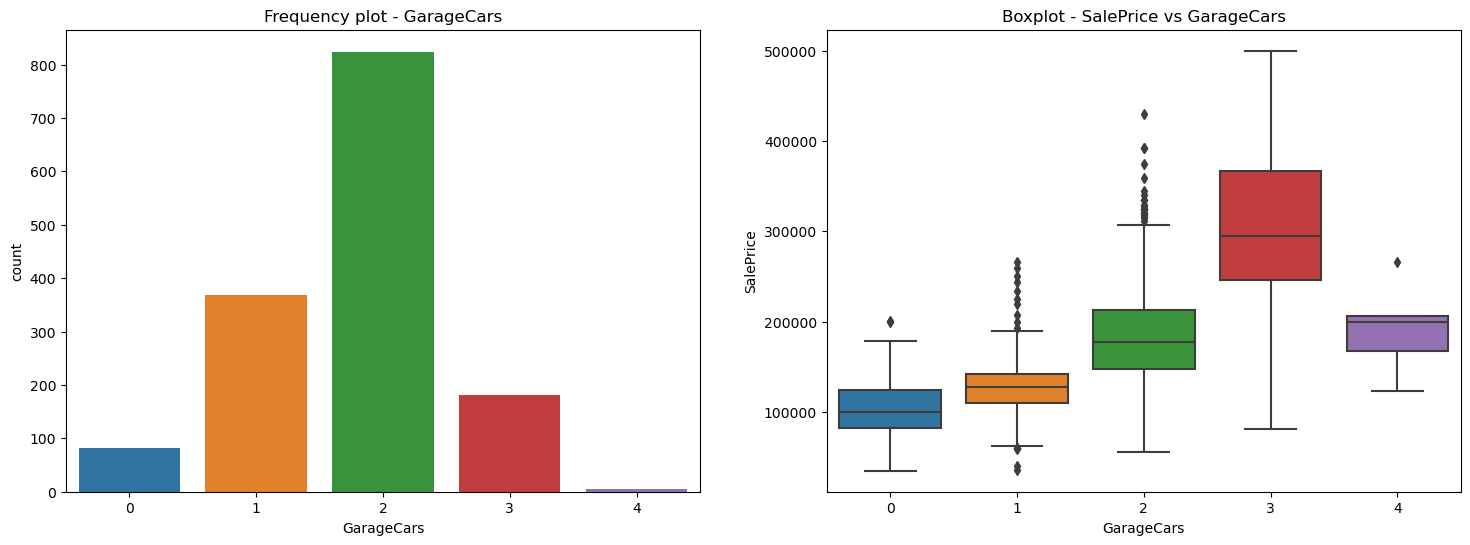

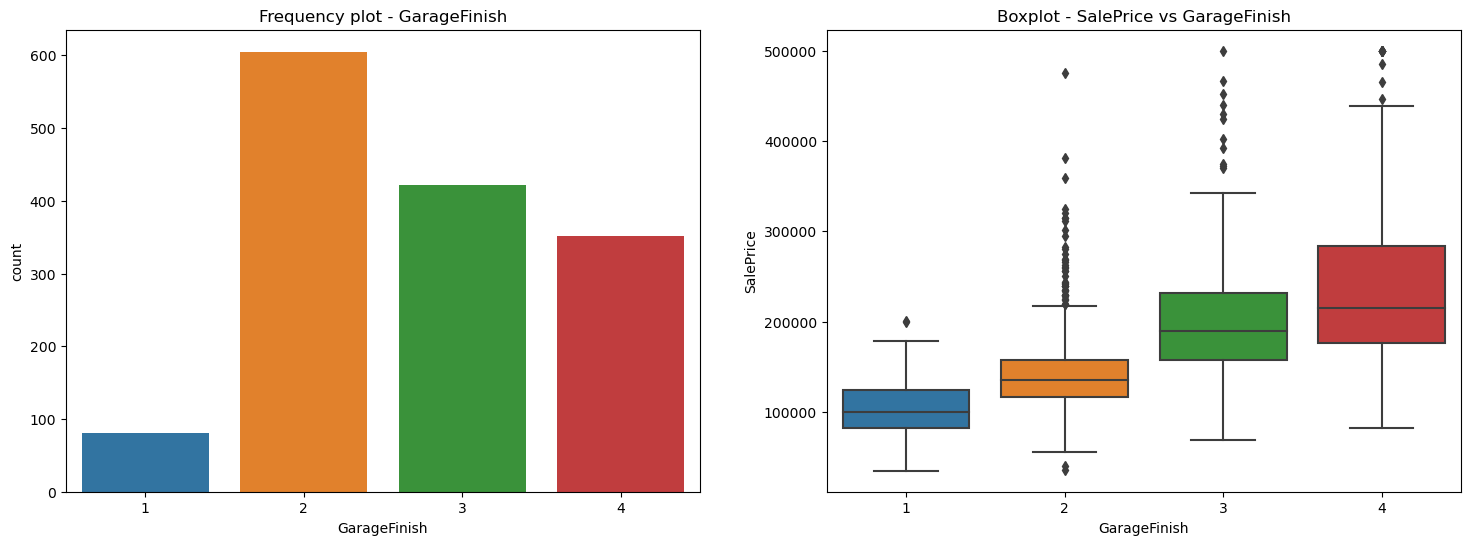

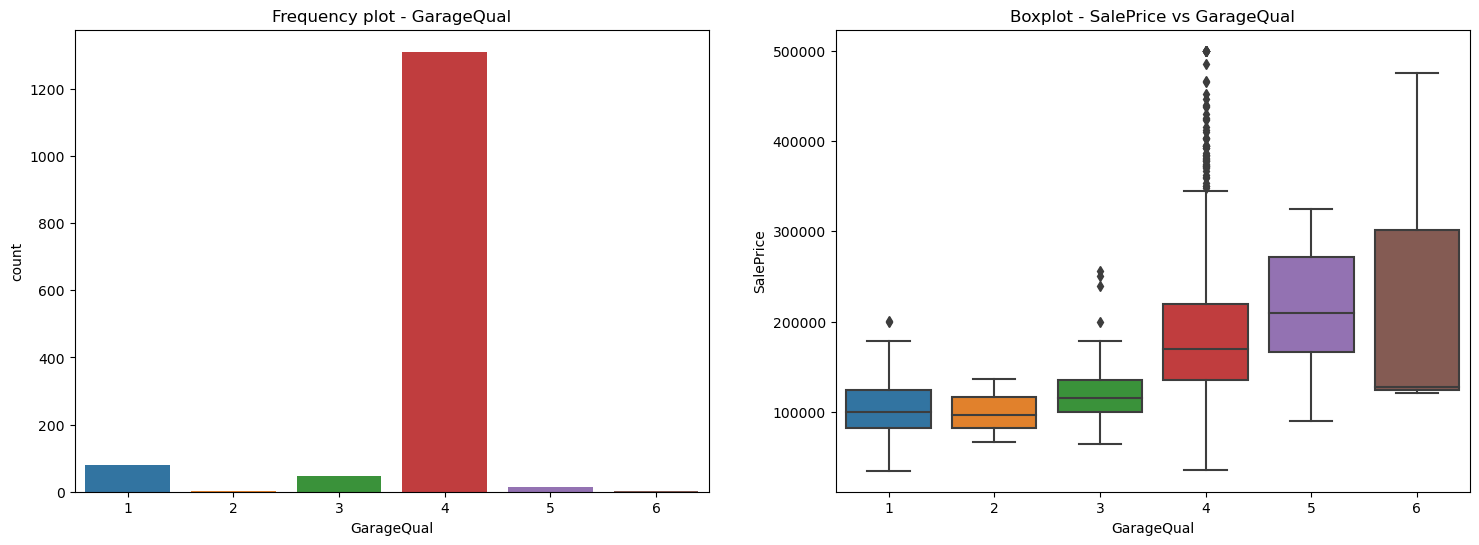

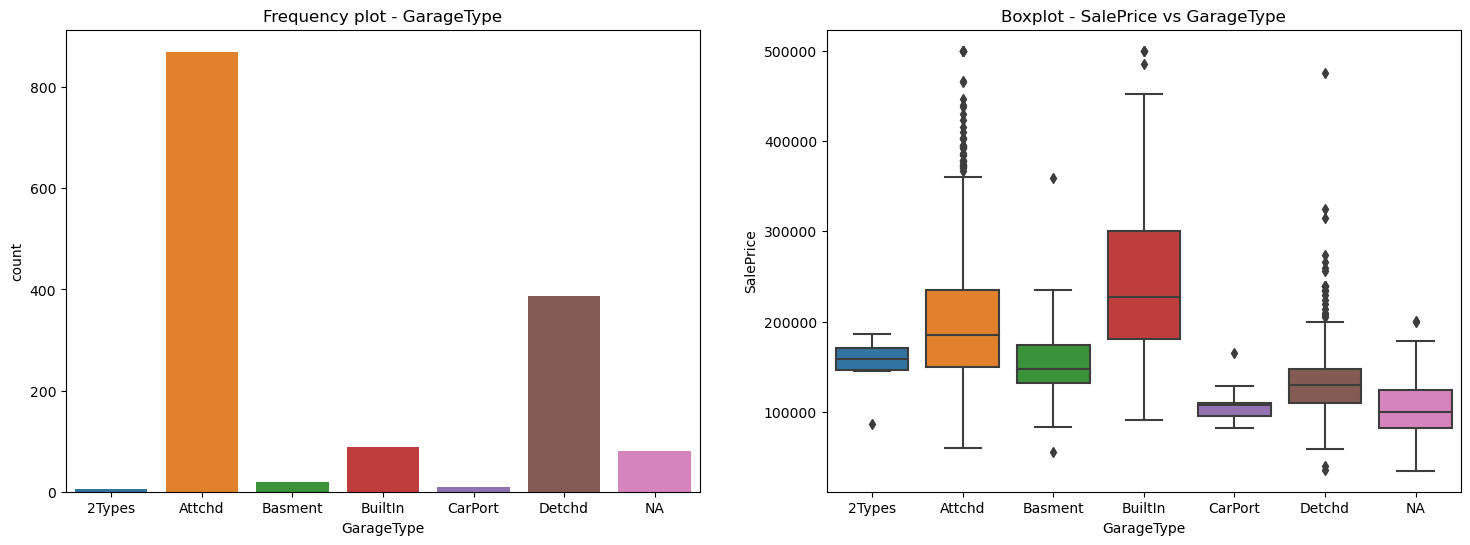

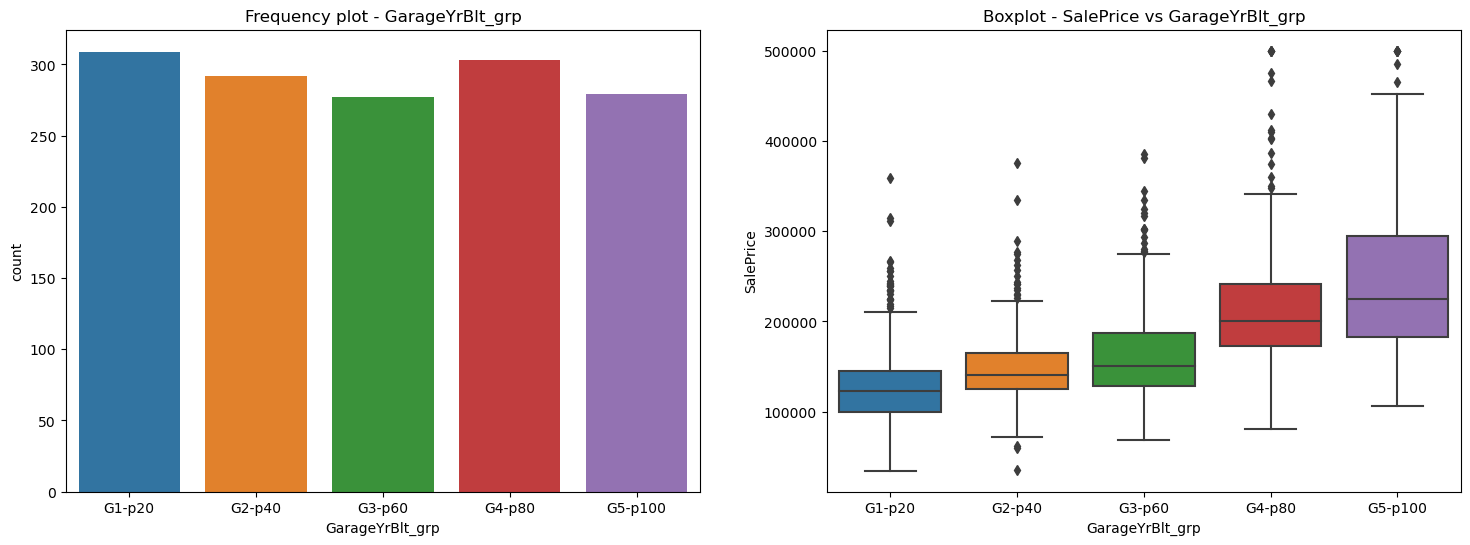

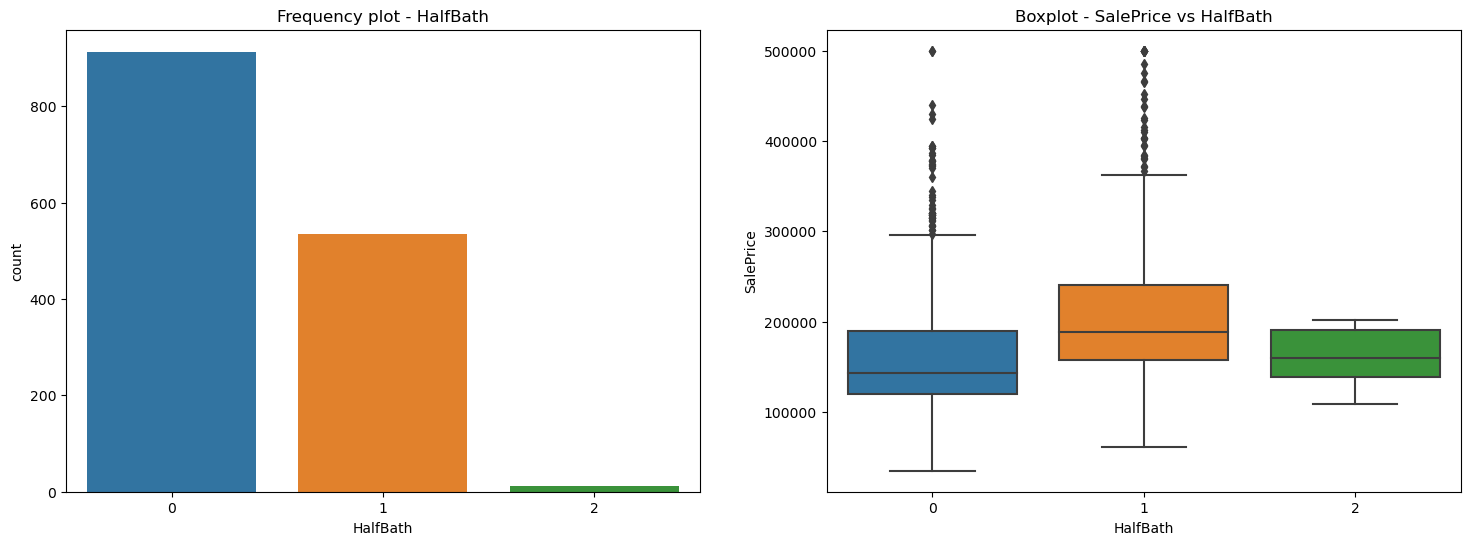

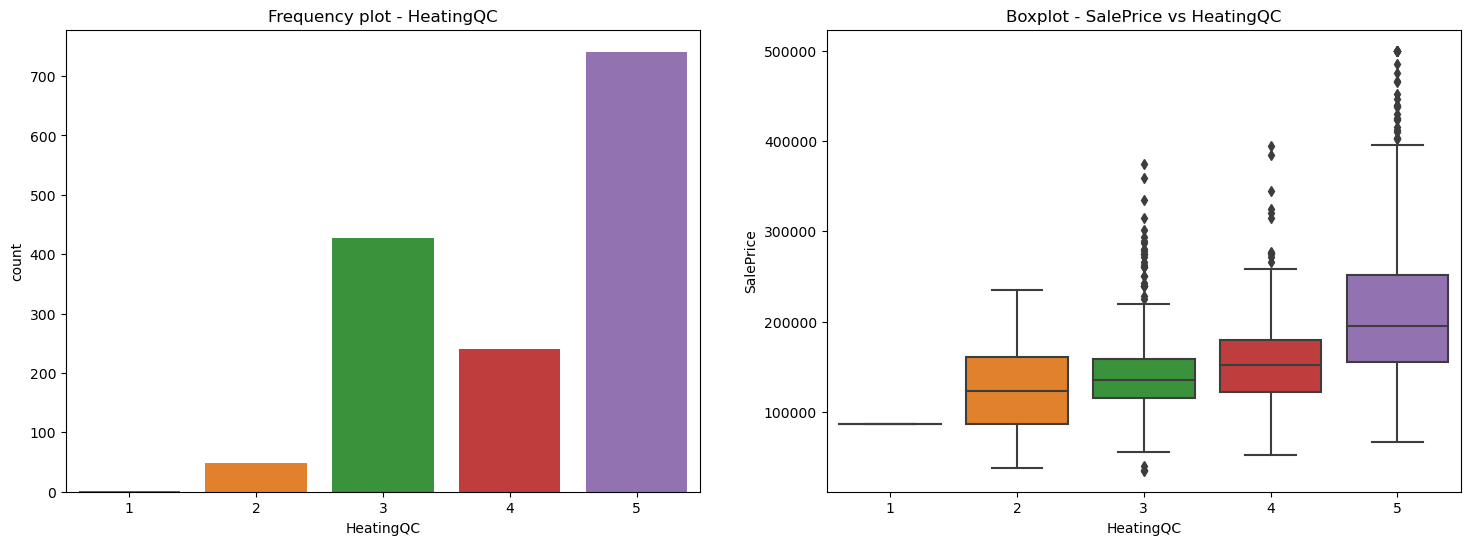

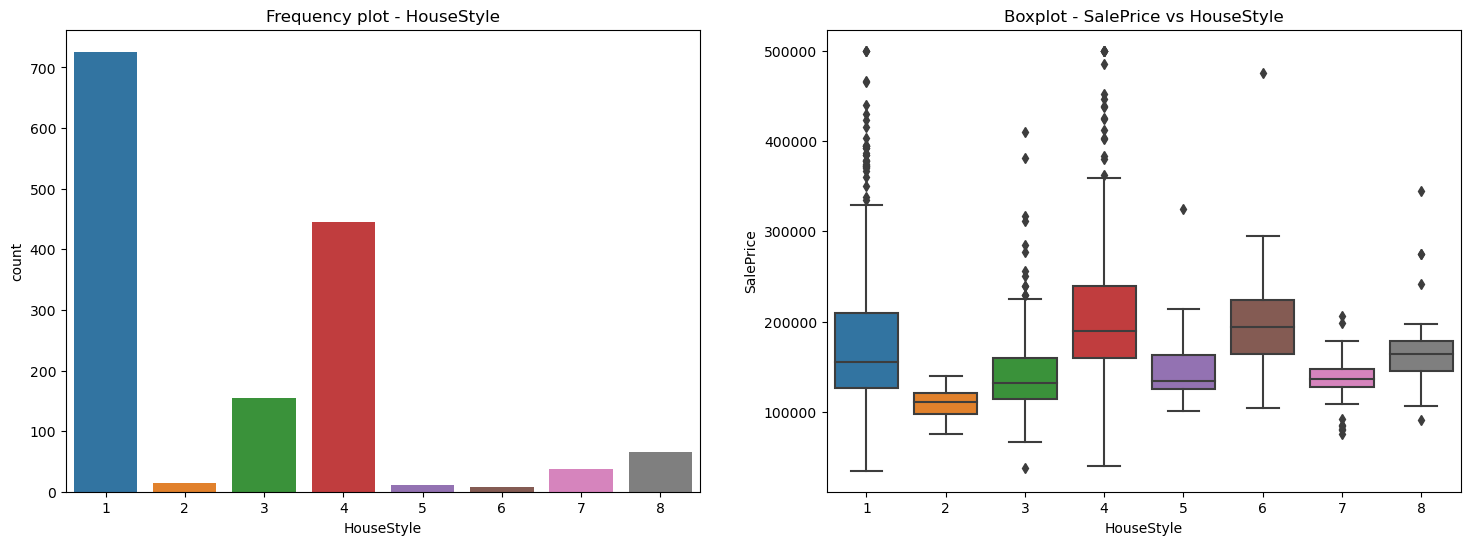

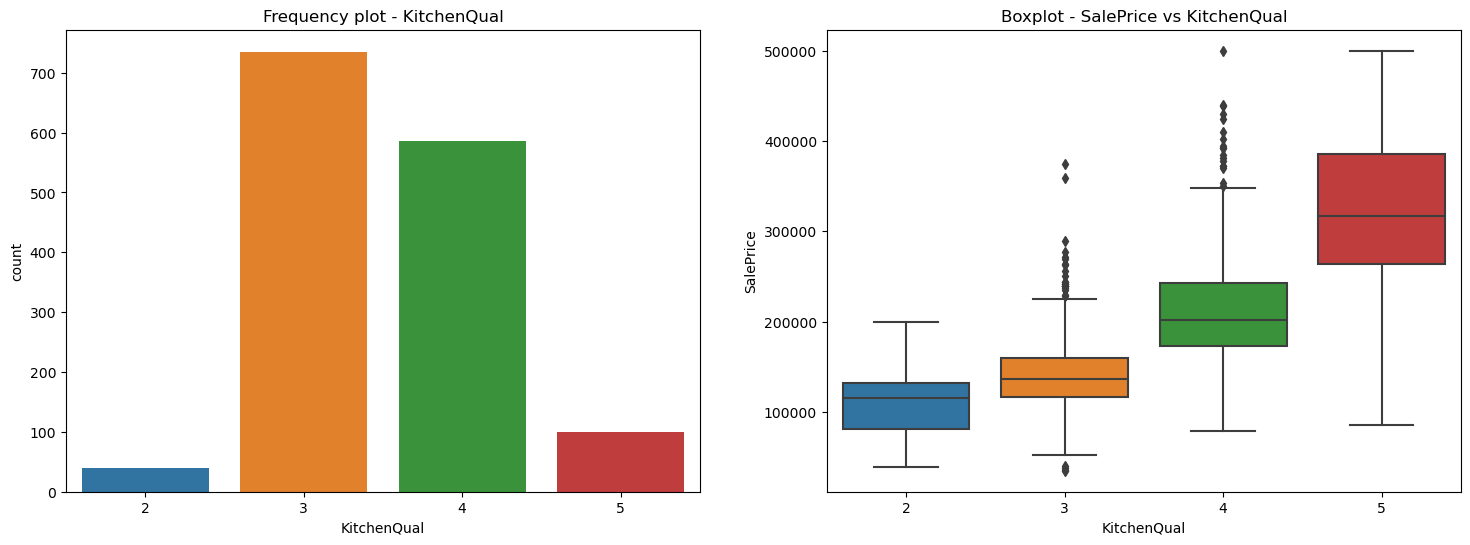

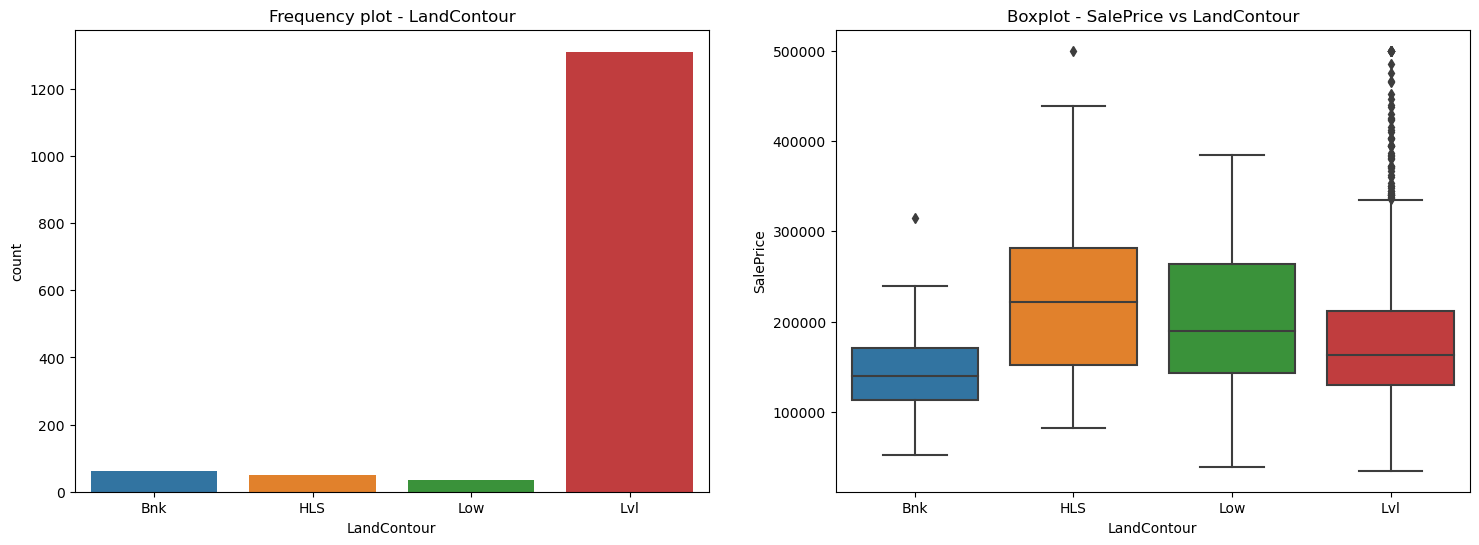

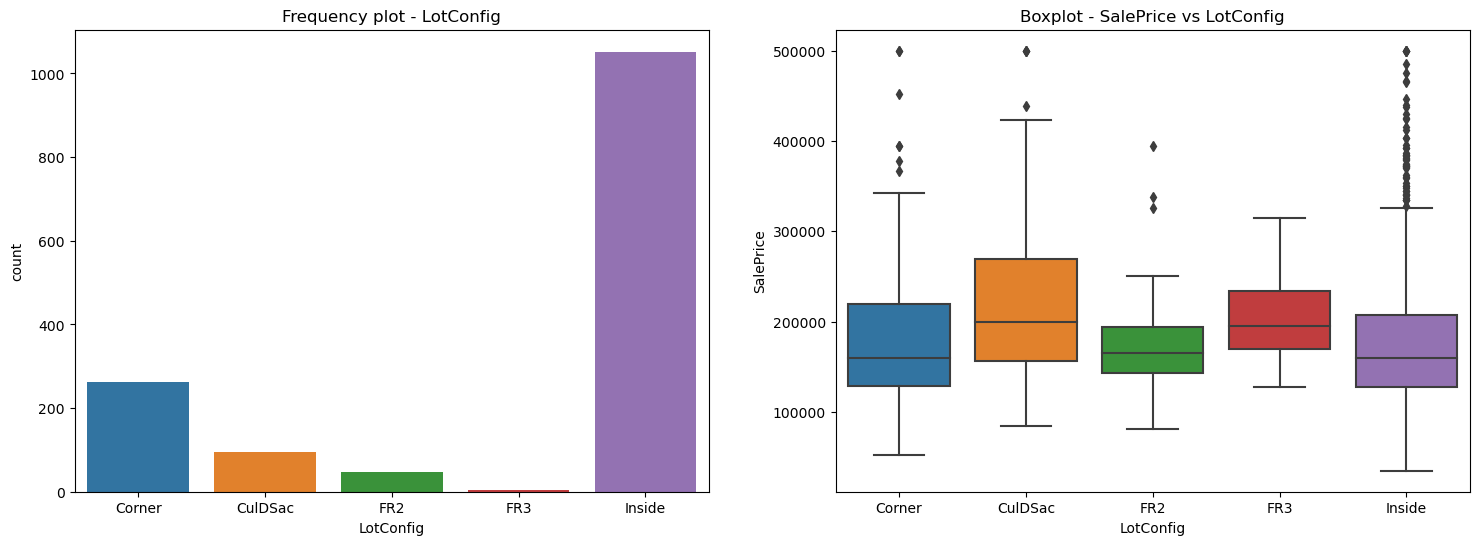

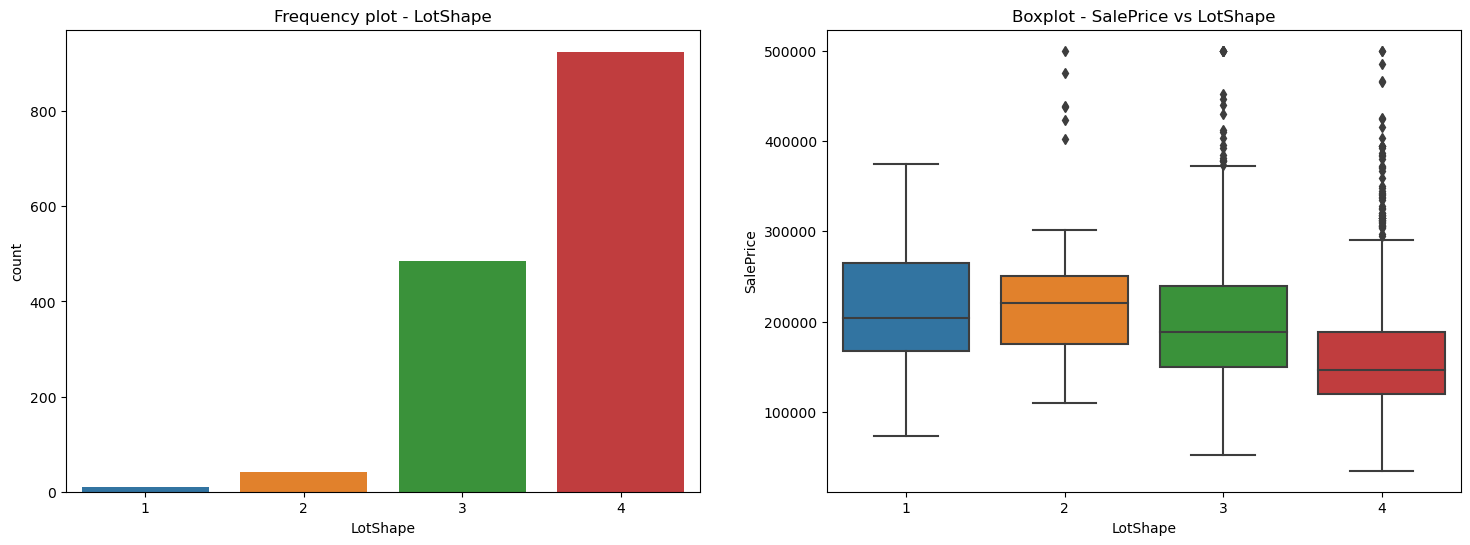

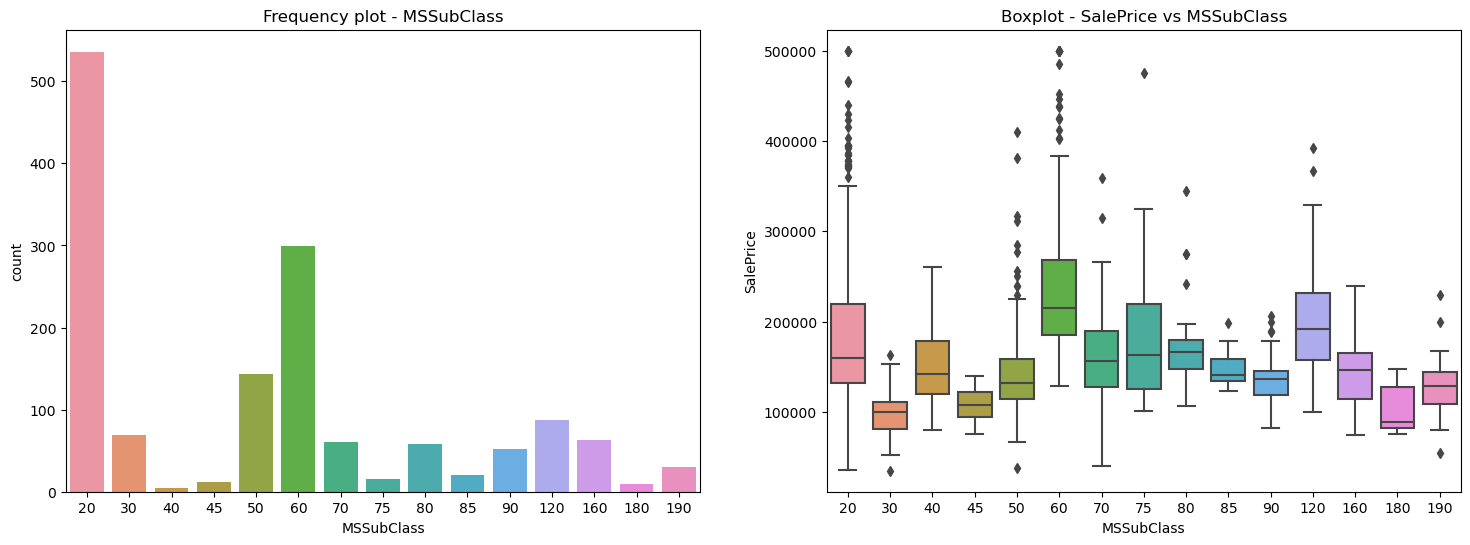

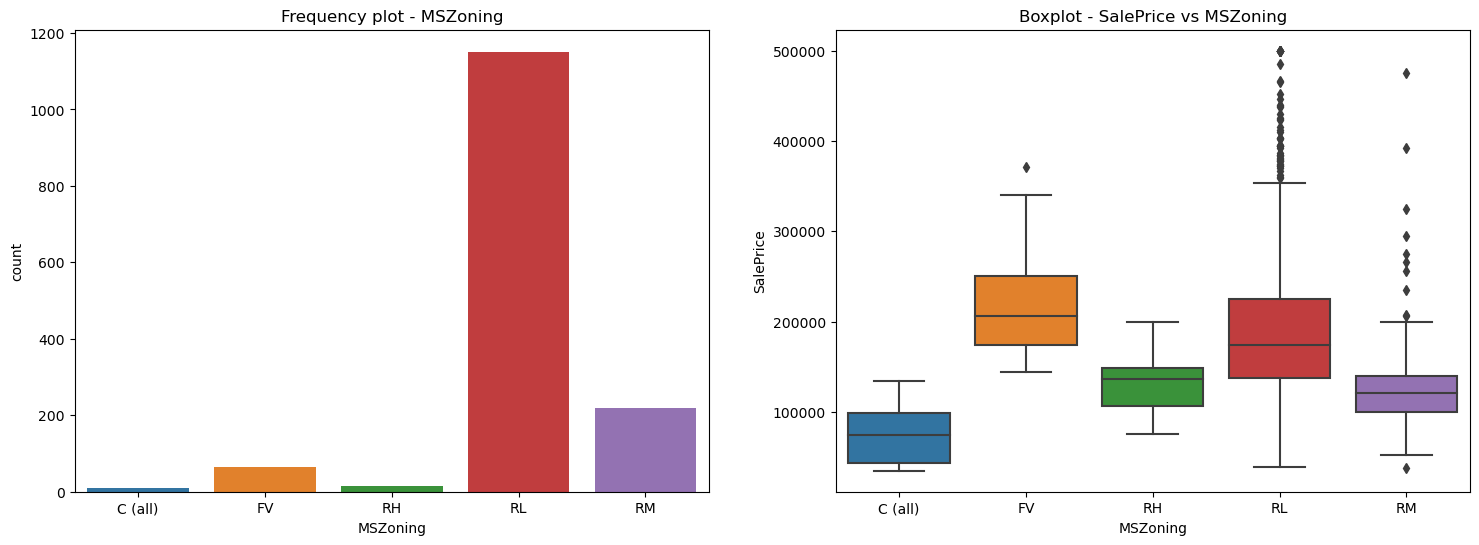

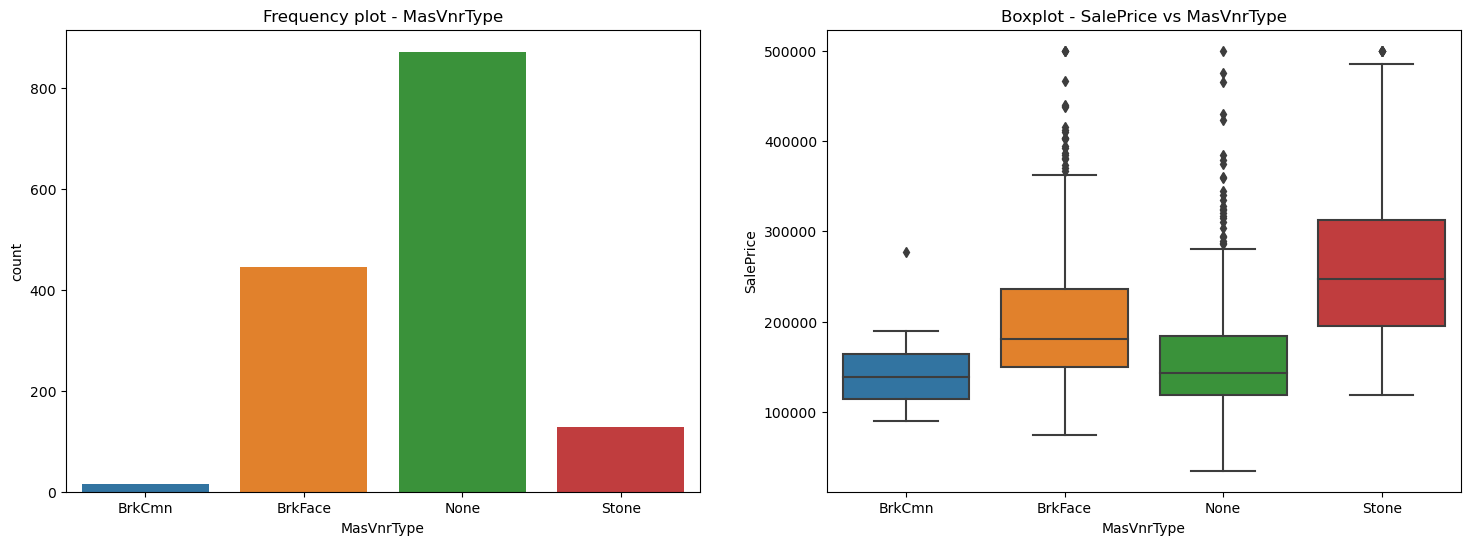

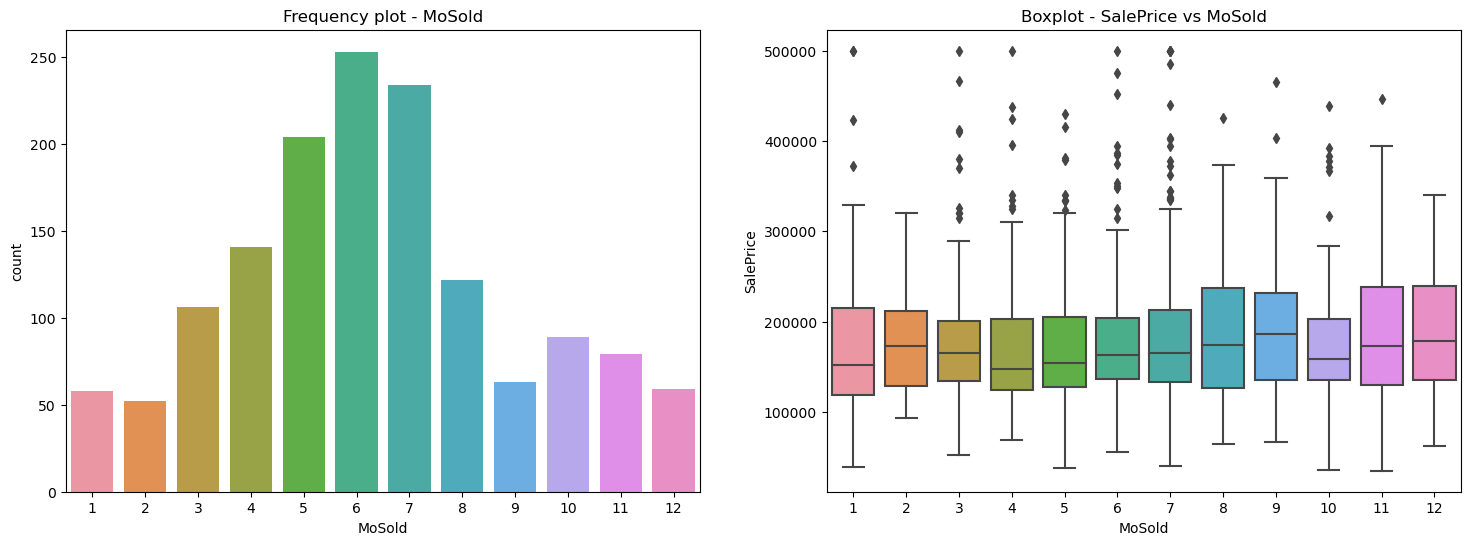

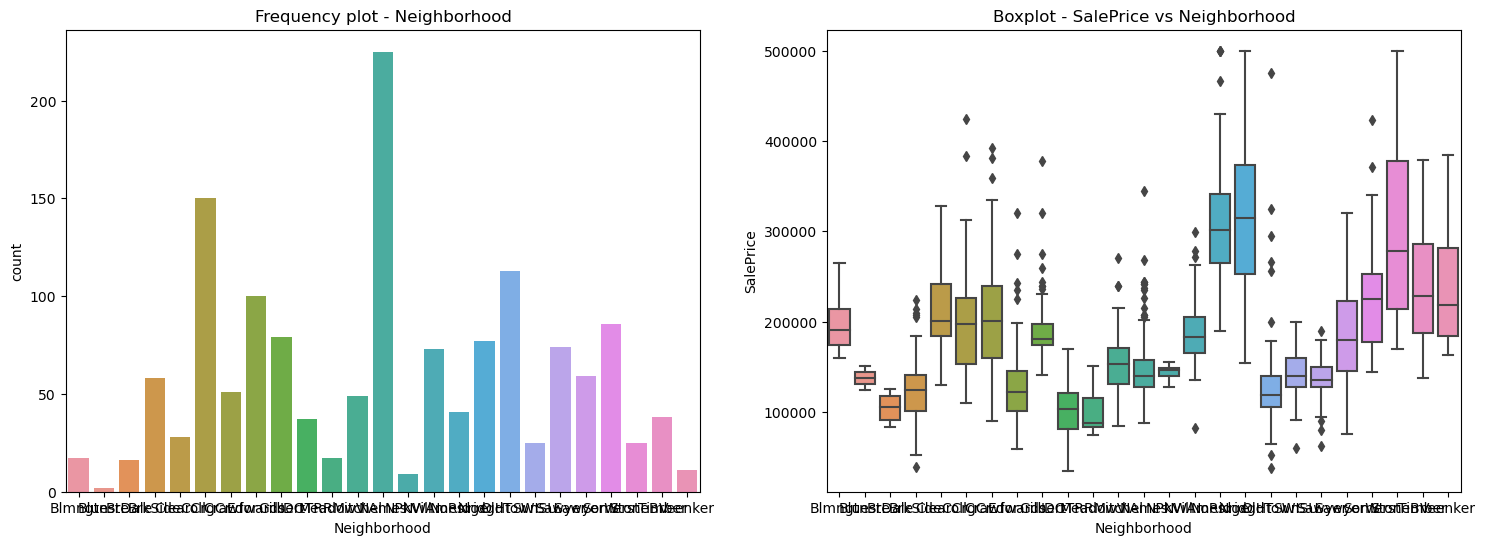

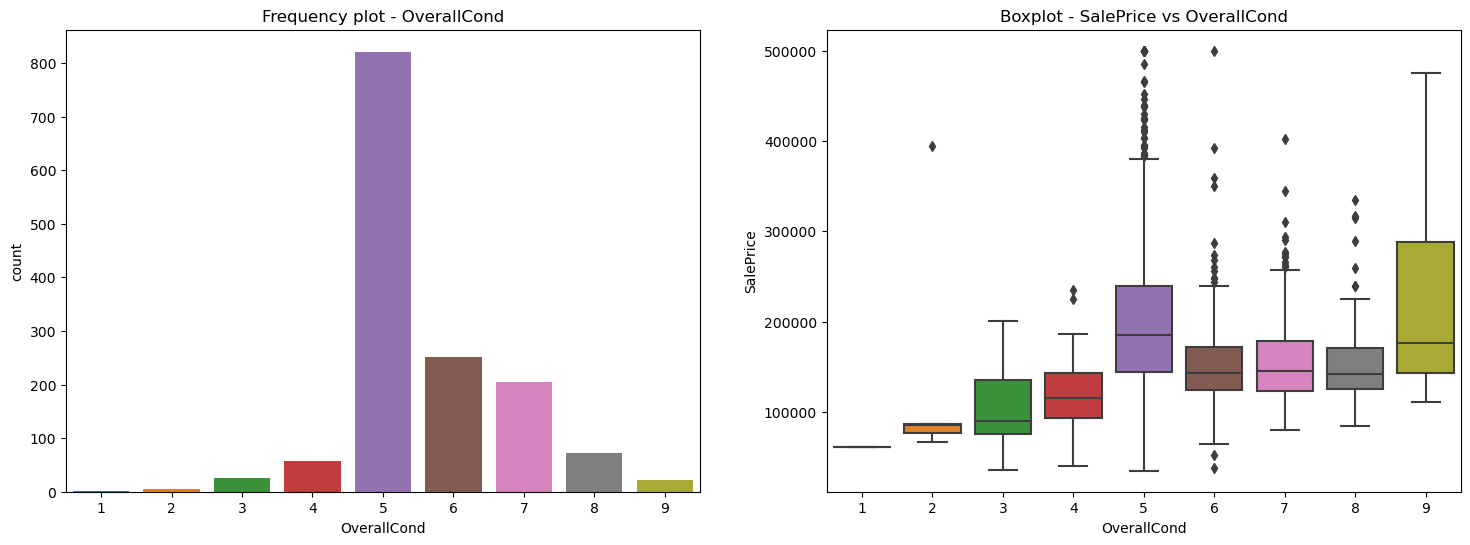

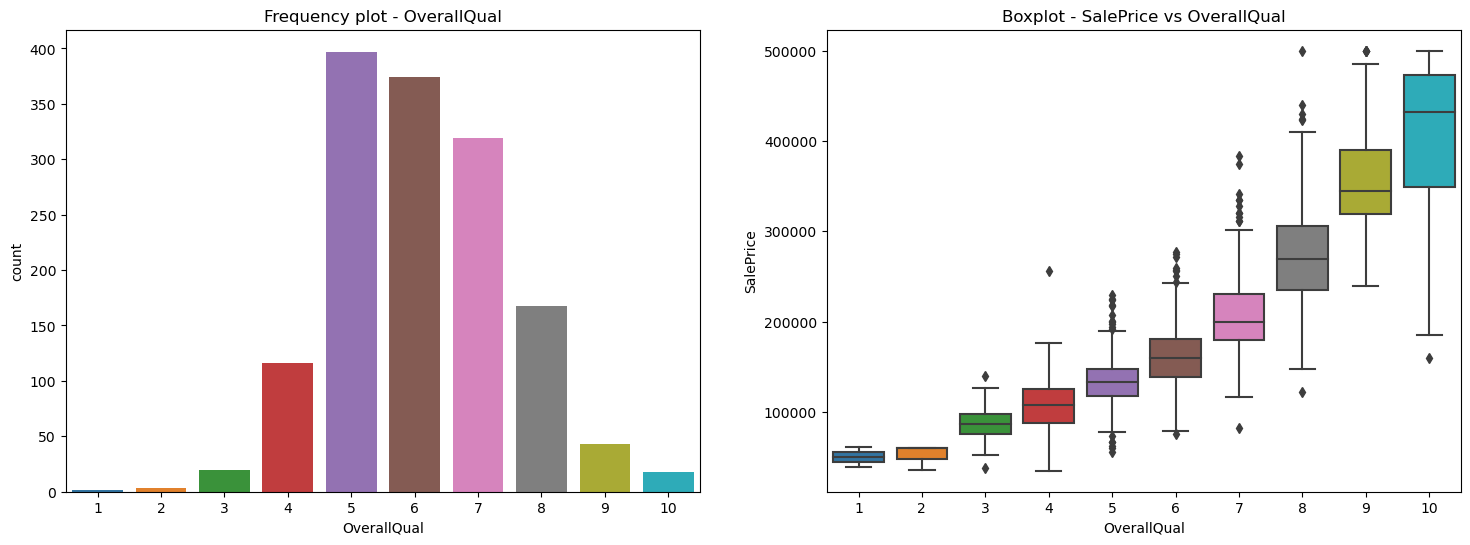

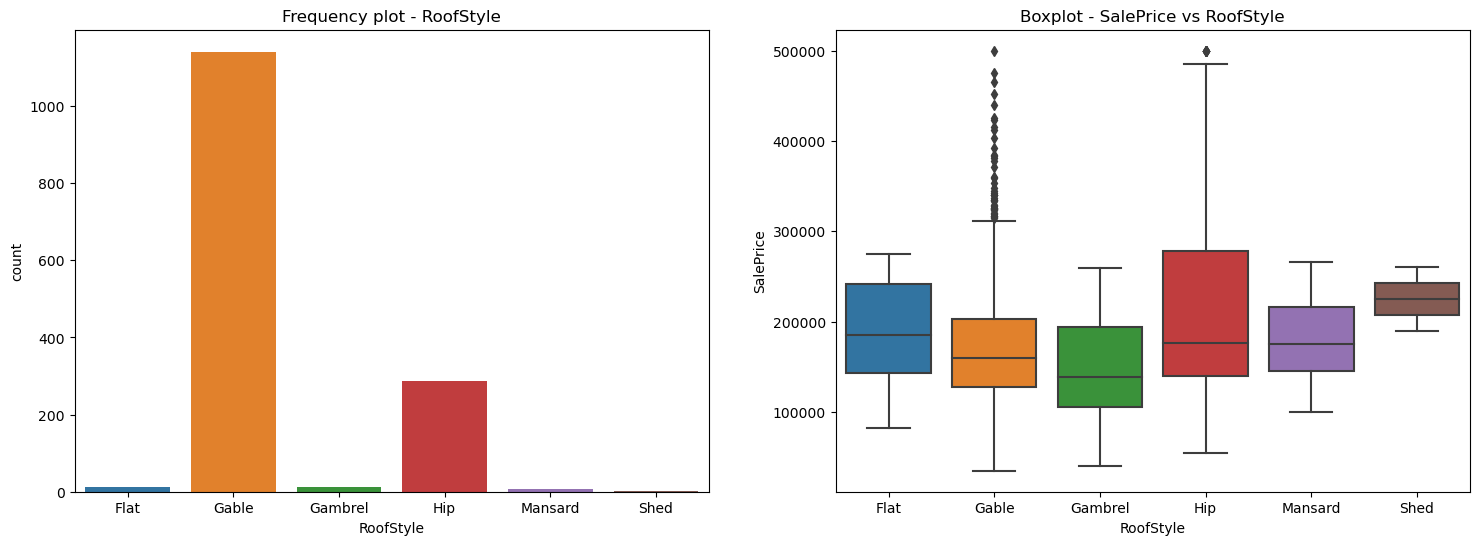

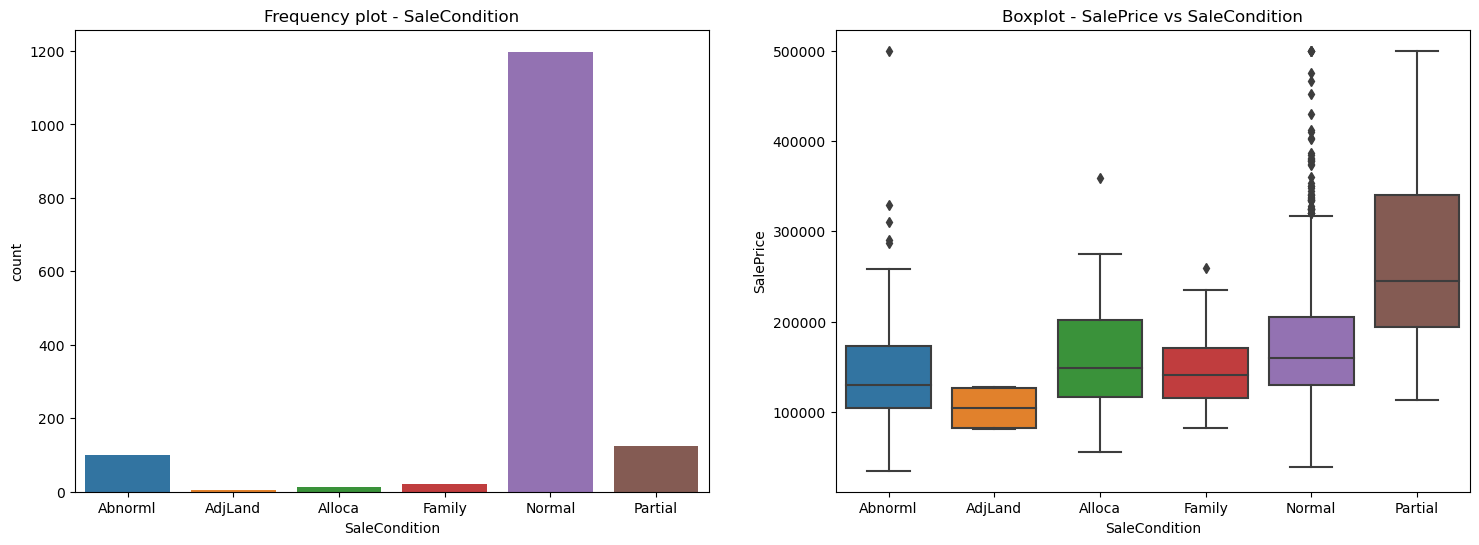

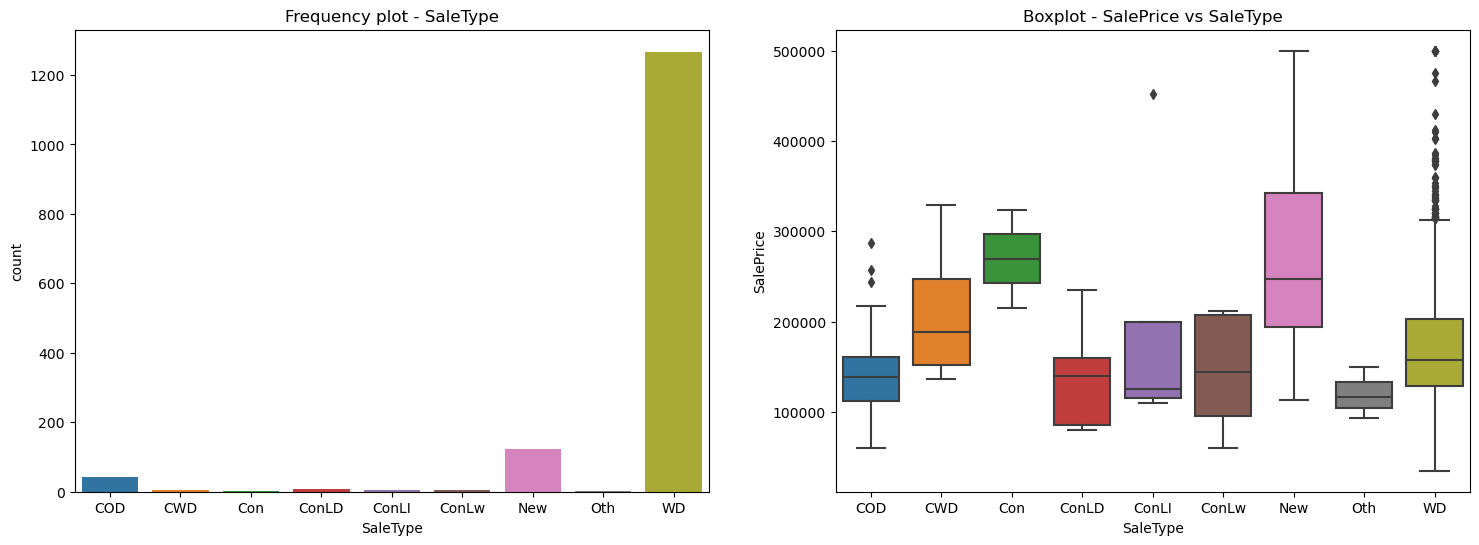

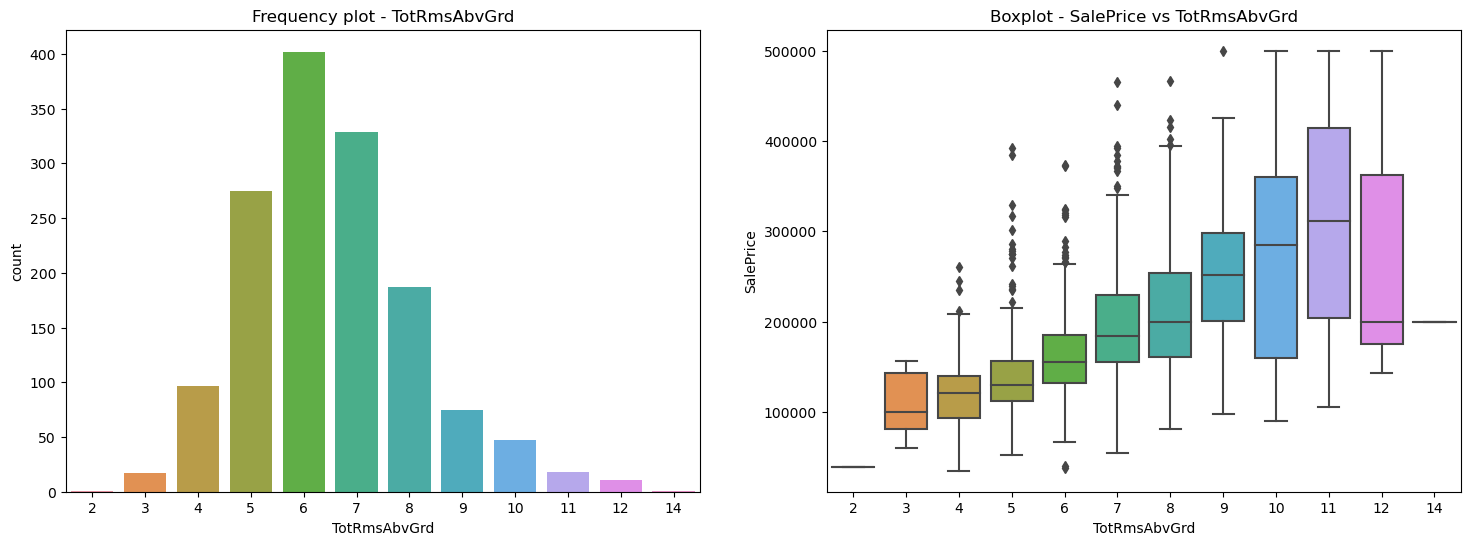

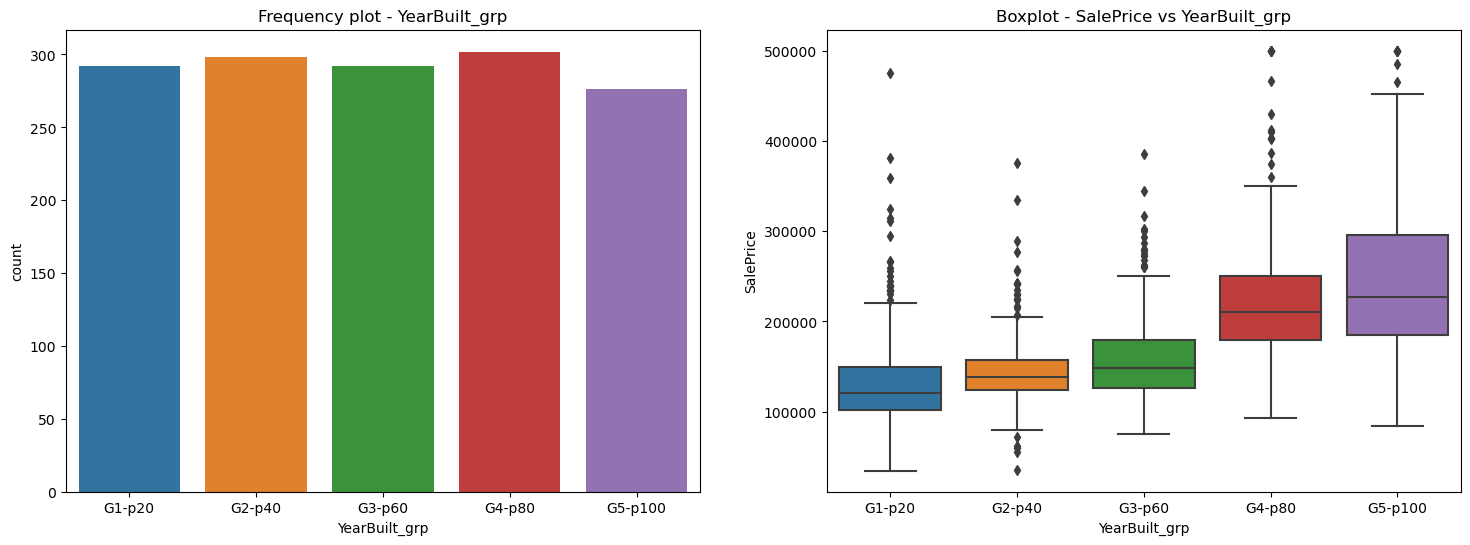

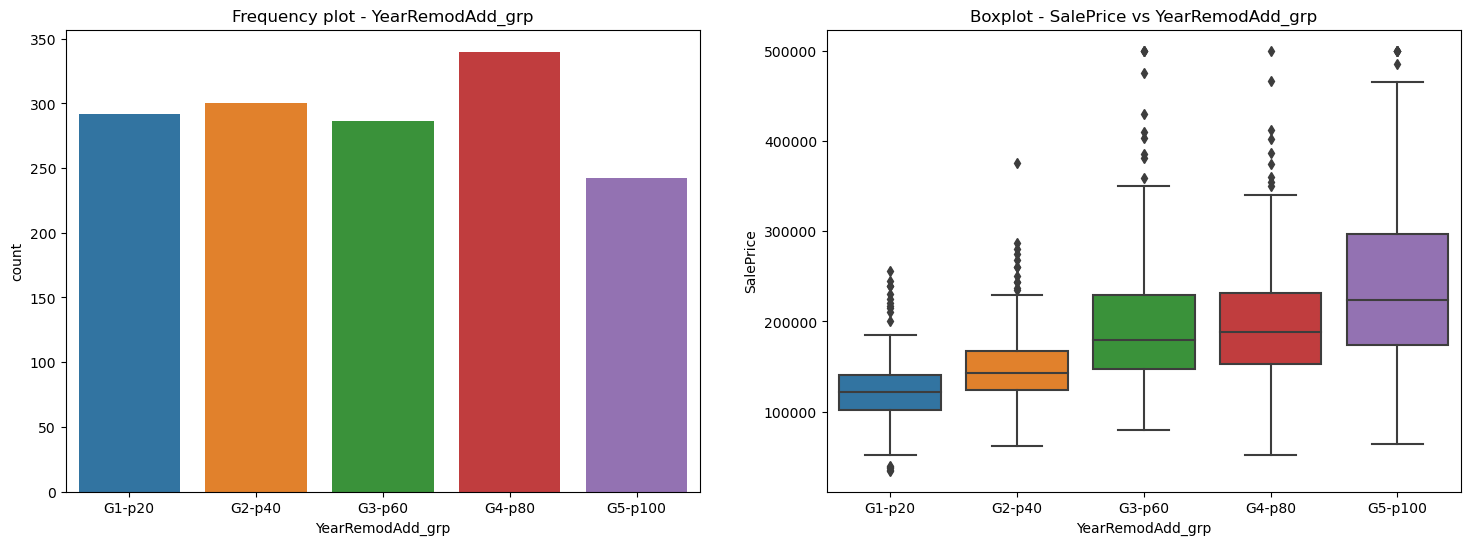

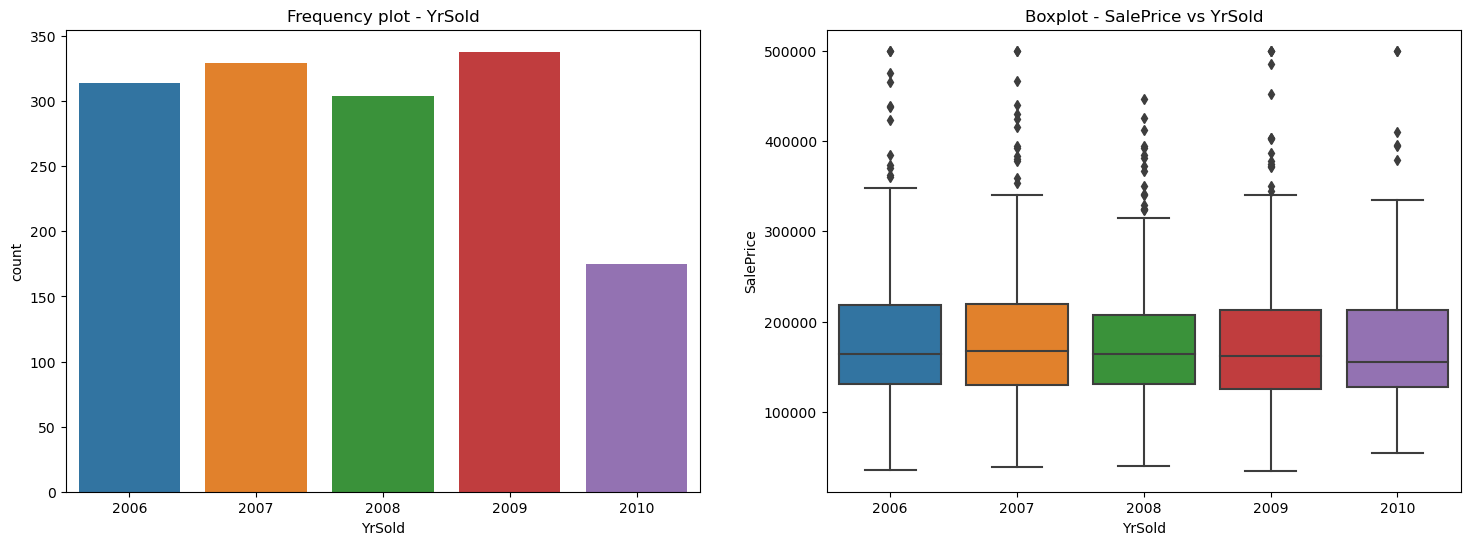

In [76]:
for x in qual_cols:
    plt.figure(figsize=(18,6))

    #creating Countplot
    plt.subplot(121)
    grade_ord = house[x].unique()
    grade_ord.sort()
    sns.countplot(x = house[x], order = grade_ord)    
    plt.title('Frequency plot - ' + x)
    
    #creating Boxplot
    plt.subplot(122)
    sns.boxplot(y = house['SalePrice'], x = house[x], order = grade_ord)
    plt.title('Boxplot - SalePrice vs ' + x)
    plt.show()

<font color = green> **Observations:**</font>  Here we have provided summary of univariate and bivariate analysis conducted on Qualitative variables- <br>
>1. 'YrSold' variable which shows the year in which the house/property sold, has no impact on the house sales price. However, variables like 'YearRemodAdd', 'YearBuilt' and 'GarageYrBlt' variables which resemble the age of the house/property or age of construction have negative impacted the selling price. Higher is the age of the house, lesser is the selling price.<br>
>2. Majority of the house dwellings are of single family. Additionally, majority of the houses sold are 1-story and 2-story with low residential density.<br>
>3. Based on 'MoSold' variable, Jun month has the highest count of sold properties. From Jun month to Dec month, count of sold properties decrease gradually which then start increasing from Jan month onwards.<br>
>4. Majority of the house were sold on warantee deeds.
>5. House basement and its features have positive impact on the house selling prices. Houses with better basement condition, basement height, and basement exposure have sold on the higher selling price. Better are the basement features, higher is the house selling price.<br>
>6. As Fireplace quality and number of fireplace in the house increases, selling price increases.<br>
>7. Garage and its features like Garage Size, Garage Quality and Garaze Interior finish have played positive role in the selling price. Better are the Garage features, higher is the house selling price. Most of the garages are attached to houses and house with build-in garage has highest average selling price. <br>
>8. As Kitchen quality increases, house selling price increase. Kitchen quality is considered as one of the "Strong" predictor. <br>
>9. Based on data, 'Commercial' properties have the least average selling price.
>10. Overall house present condition has moderate impact on the selling price of the house, however overall quaility based on material and finish of house is considered as one of the "Strong" predictor. Likewise House exterior present condition has moderate impact on the selling price of the house, however house exterior material quaility is considered as one of the "Strong" predictor. Better is overall or exterior quality, higher is the selling price.
>11. Number of rooms and bathrooms, above grade, in the house has 'Strong' positive impact on the selling price. As the number increase, selling price increases.

<hr>

## <font color = blue> Creating Derived / Dummy Variables </font>

**Data driven variables-** <br>
- In order to perform regression modelling, **nominal categorical** variables/predictors can not be directly used nor these variables have order sequence. Therefore, dummy variables are created for these. <br>
- For nominal variable with n labels/categories, **n-1 Dummy variables** with values represented by 0 (non-exist) and 1 (exist) are sufficient to capture all the variable information. Therefore, keeping the nth variable in the data will only add **noise**.

In [73]:
# Removing ordinal_cat_col list from all qualitative variables
nominal_cat_cols = [x for x in qual_cols if x not in ordinal_cat_col]

In [74]:
# List of other ordinal variables
ordinal_cat_col2 = ['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                    'BedroomAbvGr', 'Kitchen', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars']

In [75]:
# Creating a list of all nominal categorical variables
nominal_cat_cols_final = [x for x in nominal_cat_cols if x not in ordinal_cat_col2]

In [76]:
nominal_cat_cols_final

['BldgType',
 'Condition1',
 'Exterior1st',
 'Exterior2nd',
 'Foundation',
 'GarageType',
 'GarageYrBlt_grp',
 'LandContour',
 'LotConfig',
 'MSSubClass',
 'MSZoning',
 'MasVnrType',
 'MoSold',
 'Neighborhood',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'YearBuilt_grp',
 'YearRemodAdd_grp',
 'YrSold']

#### Creation of All Dummy Variables- 

In [77]:
all_dummy_var = pd.get_dummies(house[nominal_cat_cols_final], drop_first = True)

Merging the dummy variables with the original data- 

In [78]:
house = pd.merge(house, all_dummy_var, left_index = True, right_index = True)

Dropping the original variables which are represented by Dummy variables- 

In [79]:
house.drop(nominal_cat_cols, axis=1, inplace= True)

In [80]:
house.head(5)

LotFrontage  LotArea LotShape HouseStyle  MasVnrArea ExterQual ExterCond  \
Id                                                                             
1          65.0   8450.0        4          4       196.0         4         3   
2          80.0   9600.0        4          1         0.0         3         3   
3          68.0  11250.0        3          4       162.0         4         3   
4          60.0   9550.0        3          4         0.0         3         3   
5          84.0  14260.0        3          4       350.0         4         3   

   BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
Id                                                                        
1         5        4            2            7       706.0            2   
2         5        4            5            6       978.0            2   
3         5        4            3            7       486.0            2   
4         4        5            2            6       216.0            2   
5         5        4            4            7       655.0            2   

    BsmtFinSF2  BsmtUnfSF  TotalBsmtSF HeatingQC  2ndFlrSF  GrLivArea  \
Id                                                                      
1            0      150.0          856         5     854.0     1710.0   
2            0      284.0         1262         5       0.0     1262.0   
3            0      434.0          920         5     866.0     1786.0   
4            0      540.0          756         4     756.0     1717.0   
5            0      490.0         1145         5    1053.0     2198.0   

   KitchenQual FireplaceQu GarageFinish  GarageArea GarageQual  WoodDeckSF  \
Id                                                                           
1            4           1            3       548.0          4           0   
2            3           4            3       460.0          4         298   
3            4           4            3       608.0          4           0   
4            4           5            2       642.0          4           0   
5            4           4            3       836.0          4         192   

    OpenPorchSF  EnclosedPorch Fence  SalePrice  BldgType_2fmCon  \
Id                                                                 
1            61              0     1     208500                0   
2             0              0     1     181500                0   
3            42              0     1     223500                0   
4            35            272     1     140000                0   
5            84              0     1     250000                0   

    BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  Condition1_Feedr  \
Id                                                                       
1                 0               0                0                 0   
2                 0               0                0                 1   
3                 0               0                0                 0   
4                 0               0                0                 0   
5                 0               0                0                 0   

    Condition1_Norm  Condition1_PosA  Condition1_PosN  Condition1_RRAe  \
Id                                                                       
1                 1                0                0                0   
2                 0                0                0                0   
3                 1                0                0                0   
4                 1                0                0                0   
5                 1                0                0                0   

    Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  Exterior1st_AsphShn  \
Id                                                                           
1                 0                0                0                    0   
2                 0                0                0                    0   
3                 0            

In [81]:
house.shape

(1460, 178)

<hr>

## <font color = blue> Split Training and Test datasets </font>

In order to create parametric regression model, we need to split the dataset into traning and test dataset.<br>
1. **Traning Dataset-** - Used for building the model. On this data, model learns
2. **Test Dataset-** - On this we check the efficacy of the model

Split of Traning and Test dataset in 70:30 ratio.

In [83]:
# 'random_state' agrument to keep same to get same training and test dataset. 
house_train, house_test = train_test_split(house, train_size = 0.7, test_size = 0.3, random_state = 42)

<hr>

## <font color = blue> Rescaling Training and Test dataset </font>

Scaling just affects the coefficients and none of the other parameters like t-statistic, F-statistic, p-values, R-squared, etc.
It makes the cofficient comparable.
There are two major methods to scale the variables, i.e. standardisation and MinMax scaling. Standardisation basically brings all of the data into a standard normal distribution with mean zero and standard deviation one. MinMax scaling, on the other hand, brings all of the data in the range of 0 and 1.

Here we are use min-max scaling

In [84]:
scaler = MinMaxScaler()

# Here the scaler (fit) will learn the mean and std of train data
# Here the scaler (transform) will transform the train data based on the fit scaler learning
house_train[list(house_train.columns)] = scaler.fit_transform(house_train[list(house_train.columns)])

In [85]:
round(house_train.describe(),2)

LotFrontage  LotArea  LotShape  HouseStyle  MasVnrArea  ExterQual  \
count      1021.00  1021.00   1021.00     1021.00     1021.00    1021.00   
mean          0.42     0.24      0.86        0.24        0.13       0.46   
std           0.17     0.14      0.20        0.28        0.21       0.19   
min           0.00     0.00      0.00        0.00        0.00       0.00   
25%           0.34     0.17      0.67        0.00        0.00       0.33   
50%           0.41     0.23      1.00        0.14        0.00       0.33   
75%           0.50     0.29      1.00        0.43        0.21       0.67   
max           1.00     1.00      1.00        1.00        1.00       1.00   

       ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
count    1021.00   1021.00   1021.00       1021.00       1021.00     1021.00   
mean        0.52      0.70      0.73          0.41          0.59        0.28   
std         0.09      0.18      0.14          0.27          0.35        0.27   
min         0.00      0.00      0.00          0.00          0.00        0.00   
25%         0.50      0.60      0.75          0.25          0.17        0.00   
50%         0.50      0.80      0.75          0.25          0.67        0.25   
75%         0.50      0.80      0.75          0.50          1.00        0.46   
max         1.00      1.00      1.00          1.00          1.00        1.00   

       BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  2ndFlrSF  \
count       1021.00     1021.00    1021.00      1021.00    1021.00   1021.00   
mean           0.21        0.04       0.32         0.35       0.79      0.25   
std            0.15        0.13       0.24         0.14       0.24      0.31   
min            0.00        0.00       0.00         0.00       0.00      0.00   
25%            0.17        0.00       0.12         0.26       0.50      0.00   
50%            0.17        0.00       0.27         0.33       1.00      0.00   
75%            0.17        0.00       0.45         0.43       1.00      0.52   
max            1.00        1.00       1.00         1.00       1.00      1.00   

       GrLivArea  KitchenQual  FireplaceQu  GarageFinish  GarageArea  \
count    1021.00      1021.00      1021.00       1021.00     1021.00   
mean        0.43         0.50         0.36          0.57        0.47   
std         0.18         0.22         0.36          0.30        0.20   
min         0.00         0.00         0.00          0.00        0.00   
25%         0.29         0.33         0.00          0.33        0.35   
50%         0.41         0.33         0.40          0.67        0.48   
75%         0.52         0.67         0.80          0.67        0.57   
max         1.00         1.00         1.00          1.00        1.00   

       GarageQual  WoodDeckSF  OpenPorchSF  EnclosedPorch    Fence  SalePrice  \
count     1021.00     1021.00      1021.00        1021.00  1021.00    1021.00   
mean         0.57        0.16         0.16           0.07     0.14       0.31   
std          0.14        0.21         0.22           0.20     0.30       0.16   
min          0.00        0.00         0.00           0.00     0.00       0.00   
25%          0.60        0.00         0.00           0.00     0.00       0.20   
50%          0.60        0.00         0.09           0.00     0.00       0.28   
75%          0.60        0.29         0.24           0.00     0.00       0.39   
max          1.00        1.00         1.00           1.00     1.00       1.00   

       BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  \
count          1021.00          1021.00         1021.00          1021.00   
mean              0.02             0.04            0.03             0.08   
std               0.15             0.18            0.17             0.27   
min               0.00             0.00            0.00             0.00   
25%               0.00             0.00            0.00             0.00   
50%               0.00             0.00      

In [86]:
house_train.shape

(1021, 178)

In [87]:
# Use of transform scaler on test dataset based on fit scaler of traning data
# This ensures both the train and test data are in the same scale
house_test[list(house_test.columns)] = scaler.transform(house_test[list(house_test.columns)])

In [88]:
round(house_test.describe(),2)

LotFrontage  LotArea  LotShape  HouseStyle  MasVnrArea  ExterQual  \
count       438.00   438.00    438.00      438.00      438.00     438.00   
mean          0.41     0.24      0.88        0.23        0.12       0.47   
std           0.16     0.14      0.18        0.28        0.21       0.19   
min           0.00     0.01      0.00        0.00        0.00       0.00   
25%           0.34     0.17      0.67        0.00        0.00       0.33   
50%           0.41     0.22      1.00        0.00        0.00       0.33   
75%           0.49     0.28      1.00        0.43        0.19       0.67   
max           1.00     1.00      1.00        1.00        1.00       1.00   

       ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
count     438.00    438.00    438.00        438.00        438.00      438.00   
mean        0.52      0.70      0.73          0.41          0.58        0.28   
std         0.09      0.17      0.14          0.26          0.35        0.28   
min         0.25      0.00      0.00          0.00          0.00        0.00   
25%         0.50      0.60      0.75          0.25          0.17        0.00   
50%         0.50      0.60      0.75          0.25          0.67        0.24   
75%         0.50      0.80      0.75          0.50          1.00        0.44   
max         1.00      1.00      1.00          1.00          1.00        1.00   

       BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  2ndFlrSF  \
count        438.00      438.00     438.00       438.00     438.00    438.00   
mean           0.21        0.05       0.31         0.35       0.79      0.23   
std            0.16        0.16       0.24         0.14       0.24      0.30   
min            0.00        0.00       0.00         0.00       0.25      0.00   
25%            0.17        0.00       0.12         0.27       0.50      0.00   
50%            0.17        0.00       0.26         0.32       1.00      0.00   
75%            0.17        0.00       0.45         0.44       1.00      0.51   
max            1.00        1.06       1.00         1.00       1.00      1.00   

       GrLivArea  KitchenQual  FireplaceQu  GarageFinish  GarageArea  \
count     438.00       438.00       438.00        438.00      438.00   
mean        0.41         0.51         0.37          0.56        0.46   
std         0.18         0.22         0.36          0.30        0.22   
min         0.05         0.00         0.00          0.00        0.00   
25%         0.28         0.33         0.00          0.33        0.31   
50%         0.39         0.33         0.50          0.67        0.46   
75%         0.50         0.67         0.80          0.67        0.57   
max         1.00         1.00         1.00          1.00        1.00   

       GarageQual  WoodDeckSF  OpenPorchSF  EnclosedPorch   Fence  SalePrice  \
count      438.00      438.00       438.00         438.00  438.00     438.00   
mean         0.55        0.14         0.13           0.08    0.13       0.31   
std          0.15        0.18         0.18           0.20    0.30       0.17   
min          0.00        0.00         0.00           0.00    0.00       0.00   
25%          0.60        0.00         0.00           0.00    0.00       0.20   
50%          0.60        0.00         0.06           0.00    0.00       0.26   
75%          0.60        0.28         0.20           0.00    0.00       0.37   
max          0.80        0.86         1.00           1.00    1.00       1.00   

       BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  \
count           438.00           438.00          438.00           438.00   
mean              0.02             0.04            0.03             0.08   
std               0.13             0.19            0.18             0.27   
min               0.00             0.00            0.00             0.00   
25%               0.00             0.00            0.00             0.00   
50%               0.00             0.00            0.0

In [89]:
house_test.shape

(438, 178)

<hr>

## <font color = blue> Dividing into X (Predictors) and Y (Response) sets for the model building </font>

In [90]:
y_train = house_train.pop('SalePrice')
X_train = house_train

In [91]:
X_train.shape

(1021, 177)

In [92]:
y_test = house_test.pop('SalePrice')
X_test = house_test

In [93]:
X_test.shape

(438, 177)

<hr>

## <font color = blue> Building Linear Regression Model </font>

Equation of linear regression<br>
$y = c + b_1x_1 + b_2x_2 + ... + b_nx_n$

-  $y$ is the response / target variable
-  $x_1 - x_n$ is the independent / predictor variable
-  $c$ is the intercept
-  $b_1$ is the beta coefficient of $1^{st}$ feature
-  $b_n$ is the beta coefficient of $n^{th}$ feature<br>

<hr>

## <font color = blue> Model 1 - Linear Regression Model without Feature selection or Regularization Techniques</font>

#### Fit a Regression line by minimizing the Residual sum of Square (RSS) which is a cost to the linear regression

In [94]:
# Creating Linear Regression Object
Model1 = LinearRegression()

# Creating linear Regression Model based on all the predictors
Model1.fit(X_train, y_train)

LinearRegression()

In [95]:
# Predictions on the training data on the basis of the model
y_pred_train = Model1.predict(X_train)

# Predictions on the test data on the basis of the model
y_pred_test = Model1.predict(X_test)

In [96]:
# r2 score on the traning data
r2_train_model1 = r2_score(y_train, y_pred_train)

# r2 score on the test data
r2_test_model1 = r2_score(y_test, y_pred_test)

# Calculate RSS and RMSE for traning data
RSS_train_model1 = np.sum(np.square(y_train - y_pred_train))
MSE_train_model1 = mean_squared_error(y_train, y_pred_train)

# Calculate RSS and RMSE for test data
RSS_test_model1 = np.sum(np.square(y_test - y_pred_test))
MSE_test_model1 = mean_squared_error(y_test, y_pred_test)

model1_metric = []
model1_metric.append(r2_train_model1)
model1_metric.append(r2_test_model1)
model1_metric.append(RSS_train_model1)
model1_metric.append(RSS_test_model1)
model1_metric.append(MSE_train_model1**0.5)
model1_metric.append(MSE_test_model1**0.5)
model1_metric

[0.898165237605526,
 -8.657390751619949e+21,
 2.690186217174695,
 1.0823585332359992e+23,
 0.05133083164483445,
 15719854336.905155]

<font color = green> **Observations:**</font>  **Model1 Summary** results are explained here-<br>
>1) **R-square:** Also known as explained variance.It always increase when we add predictors in the model.<br>
>2) Model1 is an **ideal case of overfitting** because Model1 has explained variance of 89.8% on training data, but on test data it is negative<br>

<hr>

## <font color = blue> Model 2 - Linear Regression Model using Recursive Feature Elimination (RFE) </font>

RFE is an **automatic feature selection method** to identify key features of the dataset. The process involves developing a model with the remaining features after repeatedly removing the least significant parts until the desired number of features is obtained.<br><br>
RFE algorithm works in the following steps: (source: Analytics Vidhya)<br> 
1. Rank the importance of all features using the chosen RFE machine learning algorithm.
2. Eliminate the least important feature.
3. Build a model using the remaining features.
4. Repeat steps 1-3 until the desired number of features is reached.<br>

For our analysis, We have selected **upto 100 most significant** variables by RFE.

In [97]:
rfe = RFE(estimator = Model1, n_features_to_select =100)
rfe = rfe.fit(X_train, y_train)

In [98]:
# Predictors with RFE ranking 1 are the 100 most significant variables selected by RFE method
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 60),
 ('LotArea', True, 1),
 ('LotShape', False, 54),
 ('HouseStyle', True, 1),
 ('MasVnrArea', True, 1),
 ('ExterQual', True, 1),
 ('ExterCond', False, 36),
 ('BsmtQual', True, 1),
 ('BsmtCond', False, 49),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', False, 69),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 57),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', True, 1),
 ('2ndFlrSF', False, 35),
 ('GrLivArea', True, 1),
 ('KitchenQual', True, 1),
 ('FireplaceQu', True, 1),
 ('GarageFinish', False, 22),
 ('GarageArea', True, 1),
 ('GarageQual', True, 1),
 ('WoodDeckSF', False, 12),
 ('OpenPorchSF', False, 20),
 ('EnclosedPorch', False, 37),
 ('Fence', True, 1),
 ('BldgType_2fmCon', False, 24),
 ('BldgType_Duplex', True, 1),
 ('BldgType_Twnhs', True, 1),
 ('BldgType_TwnhsE', True, 1),
 ('Condition1_Feedr', False, 66),
 ('Condition1_Norm', True, 1),
 ('Condition1_PosA', False, 51),
 ('Condition1_PosN', False, 53),

**Creating X_train dataframe with RFE selected / choosen variables-**

In [99]:
RFE_choosen_col = X_train.columns[rfe.support_]
X_train_model2 = X_train[RFE_choosen_col]

In [100]:
X_train_model2.shape

(1021, 100)

#### Fit a Regression line by minimizing the Residual sum of Square (RSS) which is a cost to the linear regression

In [101]:
# Creating Linear Regression Object
Model2 = LinearRegression()

# Creating linear Regression Model based on all the predictors
Model2.fit(X_train_model2, y_train)

LinearRegression()

In [102]:
# Predictions on the training data on the basis of the model
y_pred_train = Model2.predict(X_train_model2)

# Predictions on the test data on the basis of the model
y_pred_test = Model2.predict(X_test[RFE_choosen_col])

In [103]:
# r2 score on the traning data
r2_train_model2 = r2_score(y_train, y_pred_train)

# r2 score on the test data
r2_test_model2 = r2_score(y_test, y_pred_test)

# Calculate RSS and RMSE for traning data
RSS_train_model2 = np.sum(np.square(y_train - y_pred_train))
MSE_train_model2 = mean_squared_error(y_train, y_pred_train)

# Calculate RSS and RMSE for test data
RSS_test_model2 = np.sum(np.square(y_test - y_pred_test))
MSE_test_model2 = mean_squared_error(y_test, y_pred_test)

model2_metric = []
model2_metric.append(r2_train_model2)
model2_metric.append(r2_test_model2)
model2_metric.append(RSS_train_model2)
model2_metric.append(RSS_test_model2)
model2_metric.append(MSE_train_model2**0.5)
model2_metric.append(MSE_test_model2**0.5)
model2_metric

[0.8925865351599322,
 -1.3269109251654933e+23,
 2.8375597473521417,
 1.658921728152572e+24,
 0.052718086254780215,
 61542607436.057686]

<font color = green> **Observations:**</font>  **Model2 Summary** results are explained here-<br>
>1) **R-square:** Also known as explained variance.It always increase when we add predictors in the model.<br>
>2) Model2 is an **ideal case of overfitting** because Model1 has explained variance of 89.2% on training data, but on test data it is negative<br>

<hr>

## <font color = blue> Model 3 - Linear Regression Model using Ridge Regression </font>

In Ridge regression, cost function has a penalty term to RSS (Residual Sum of Square). This penalty term is **lambda * sum of squared model coefficients**.<br><br> In the cost function, the penalty term, also called the **shrinkage penalty**, would be small only if the coefficients are small, i.e., close to 0. Hence, while fitting the Ridge regression model, since we need to find out the model coefficients that minimize the entire cost, i.e., RSS and a penalty, it would have the effect of shrinking the model coefficients, i.e., the betas, towards 0.<br><br>
Here **lambda** play an important role. If lambda is 0, then the cost function would not have penalty term and there will be no shrinkage of the model coefficients. They would be the same as those from OLS. However, since lambda moves towards higher values, the shrinkage penalty increases, pushing the coefficients further towards 0, which **may lead to model underfitting**.<br><br>
Choosing an appropriate lambda becomes crucial: If it is too small, then we would not be able to solve the problem of overfitting, and with too large a lambda, we may actually end up underfitting. Hence, an appropriate choice of lambda becomes crucial. This can be achieved through **hyperparameter tuning**.<br><br>
In OLS, we will get only one set of model coefficients when the RSS is minimised. However, in Ridge regression, for each value of lambda, we will get a different set of model coefficients.

#### Hyper-Parameter Tuning - Step 1

Initially, we took a range of hyper-parameter values and check for best suitable lambda value

In [115]:
# list of alphas to tune - 
params = {'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_model2, y_train) 

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                   0.1, 0.5, 1.0, 5.0, 10, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [116]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 1.0}


In [117]:
alpha = 1.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_model2, y_train)

Ridge()

In [122]:
# Predictions on the training data on the basis of the model
y_pred_train = ridge.predict(X_train_model2)

# Predictions on the test data on the basis of the model
y_pred_test = ridge.predict(X_test[RFE_choosen_col])

In [119]:
# r2 score on the traning data
r2_train_model3 = r2_score(y_train, y_pred_train)

# r2 score on the test data
r2_test_model3 = r2_score(y_test, y_pred_test)

# Calculate RSS and RMSE for traning data
RSS_train_model3 = np.sum(np.square(y_train - y_pred_train))
MSE_train_model3 = mean_squared_error(y_train, y_pred_train)

# Calculate RSS and RMSE for test data
RSS_test_model3 = np.sum(np.square(y_test - y_pred_test))
MSE_test_model3 = mean_squared_error(y_test, y_pred_test)

model3_metric = []
model3_metric.append(r2_train_model3)
model3_metric.append(r2_test_model3)
model3_metric.append(RSS_train_model3)
model3_metric.append(RSS_test_model3)
model3_metric.append(MSE_train_model3**0.5)
model3_metric.append(MSE_test_model3**0.5)
model3_metric

[0.8872081675301805,
 0.8851534589374956,
 2.979640998667967,
 1.4358267669549334,
 0.05402180608315281,
 0.05725507229538774]

<font color = green> **Observations:**</font>  **Model3 Summary** results are explained here-<br>
>1) Model3 based on Ridge regression is **extremely good fit** for both training and test data. R-square values of both training and test data are 88.7% and 87.5% respectively. <br>
>2) RMSE errors has came down to 0.057 which is drastically low from model1 and model2.<br>
>3) This model though can be used for business, there are 100 parameters to look into while making business decision which in real time is not possible. Therefore, in the next step, we will build **Lasso regression** which uses both regularization and feature selection technique.

<hr>

In [123]:
# Subjective question: Double the alpha
alpha = 2.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_model2, y_train)

Ridge(alpha=2.0)

In [124]:
# Predictions on the training data on the basis of the model
y_pred_train = ridge.predict(X_train_model2)

# Predictions on the test data on the basis of the model
y_pred_test = ridge.predict(X_test[RFE_choosen_col])

In [125]:
# r2 score on the traning data
r2_train_model3 = r2_score(y_train, y_pred_train)

# r2 score on the test data
r2_test_model3 = r2_score(y_test, y_pred_test)

# Calculate RSS and RMSE for traning data
RSS_train_model3 = np.sum(np.square(y_train - y_pred_train))
MSE_train_model3 = mean_squared_error(y_train, y_pred_train)

# Calculate RSS and RMSE for test data
RSS_test_model3 = np.sum(np.square(y_test - y_pred_test))
MSE_test_model3 = mean_squared_error(y_test, y_pred_test)

model3_metric = []
model3_metric.append(r2_train_model3)
model3_metric.append(r2_test_model3)
model3_metric.append(RSS_train_model3)
model3_metric.append(RSS_test_model3)
model3_metric.append(MSE_train_model3**0.5)
model3_metric.append(MSE_test_model3**0.5)
model3_metric

[0.8843466117777614,
 0.8864264880214798,
 3.0552352030813372,
 1.4199111876350323,
 0.054702787040258986,
 0.056936862966478444]

## <font color = blue> Model 4 - Linear Regression Model using Lasso Regression </font>

Lasso regression which uses both regularization and feature selection technique. The penalty term here is the sum of the absolute values of all the coefficients present in the model.

### Hyper-Parameter Tuning

#### Hyper-Parameter Tuning - Step 1

Initially, we took a range of hyper-parameter values and check for best suitable lambda value

In [134]:
# list of alphas to tune - 
params = {'alpha': [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 
                    5.0, 10, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_model2, y_train)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005,
                                   0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10, 50, 100,
                                   500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [127]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


### Fitting Lasso model for lambda = 0.0001 (Optimum Value)

In [135]:
alpha = 0.0001
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_model2, y_train) 

Lasso(alpha=0.0001)

In [136]:
# Predictions on the training data on the basis of the model
y_pred_train = lasso.predict(X_train_model2)

# Predictions on the test data on the basis of the model
y_pred_test = lasso.predict(X_test[RFE_choosen_col])

In [137]:
# r2 score on the traning data
r2_train_model4 = r2_score(y_train, y_pred_train)

# r2 score on the test data
r2_test_model4 = r2_score(y_test, y_pred_test)

# Calculate RSS and RMSE for traning data
RSS_train_model4 = np.sum(np.square(y_train - y_pred_train))
MSE_train_model4 = mean_squared_error(y_train, y_pred_train)

# Calculate RSS and RMSE for test data
RSS_test_model4 = np.sum(np.square(y_test - y_pred_test))
MSE_test_model4 = mean_squared_error(y_test, y_pred_test)

model4_metric = []
model4_metric.append(r2_train_model4)
model4_metric.append(r2_test_model4)
model4_metric.append(RSS_train_model4)
model4_metric.append(RSS_test_model4)
model4_metric.append(MSE_train_model4**0.5)
model4_metric.append(MSE_test_model4**0.5)
model4_metric

[0.8821522183444923,
 0.8851478490707277,
 3.1132048671767043,
 1.4358969022571366,
 0.05521931048037645,
 0.057256470637045156]

<font color = green> **Observations:**</font>  **Model4 Summary** results are explained here-<br>
>1) Model4 based on Lasso regression is also an **extremely good fit** for both training and test data. R-square values of both training and test data are 88.2% and 88.5% respectively.<br>
>2) RMSE errors has came down to 0.057 which is simillar to Model3 ridge regression.

In [138]:
# Subjective question: Double the alpha
alpha = 0.0002
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_model2, y_train) 

Lasso(alpha=0.0002)

In [139]:
# Predictions on the training data on the basis of the model
y_pred_train = lasso.predict(X_train_model2)

# Predictions on the test data on the basis of the model
y_pred_test = lasso.predict(X_test[RFE_choosen_col])

In [140]:
# r2 score on the traning data
r2_train_model4 = r2_score(y_train, y_pred_train)

# r2 score on the test data
r2_test_model4 = r2_score(y_test, y_pred_test)

# Calculate RSS and RMSE for traning data
RSS_train_model4 = np.sum(np.square(y_train - y_pred_train))
MSE_train_model4 = mean_squared_error(y_train, y_pred_train)

# Calculate RSS and RMSE for test data
RSS_test_model4 = np.sum(np.square(y_test - y_pred_test))
MSE_test_model4 = mean_squared_error(y_test, y_pred_test)

model4_metric = []
model4_metric.append(r2_train_model4)
model4_metric.append(r2_test_model4)
model4_metric.append(RSS_train_model4)
model4_metric.append(RSS_test_model4)
model4_metric.append(MSE_train_model4**0.5)
model4_metric.append(MSE_test_model4**0.5)
model4_metric

[0.8754165419235661,
 0.8876442246506107,
 3.291142375399411,
 1.404686881956937,
 0.05677543418533936,
 0.05663080147499918]

<hr>

## <font color = blue> Summerizing all the models metrics in a table </font>

In [141]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Model1: Linear Regression': model1_metric}

lr_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Model1: Linear Regression'] )
RFE_metric = pd.Series(model2_metric, name = 'Model2: RFE Regression' )
rg_metric = pd.Series(model3_metric, name = 'Model3: Ridge Regression')
ls_metric = pd.Series(model4_metric, name = 'Model4: Lasso Regression')

final_metric = pd.concat([lr_metric, RFE_metric, rg_metric, ls_metric], axis = 1)
final_metric

Metric  Model1: Linear Regression  Model2: RFE Regression  \
0  R2 Score (Train)               8.981652e-01            8.925865e-01   
1   R2 Score (Test)              -8.657391e+21           -1.326911e+23   
2       RSS (Train)               2.690186e+00            2.837560e+00   
3        RSS (Test)               1.082359e+23            1.658922e+24   
4       MSE (Train)               5.133083e-02            5.271809e-02   
5        MSE (Test)               1.571985e+10            6.154261e+10   

   Model3: Ridge Regression  Model4: Lasso Regression  
0                  0.884347                  0.875417  
1                  0.886426                  0.887644  
2                  3.055235                  3.291142  
3                  1.419911                  1.404687  
4                  0.054703                  0.056775  
5                  0.056937                  0.056631

### Beta coefficients

In [150]:
# Top 100 beta coefficients
betas = pd.DataFrame(index=X_train_model2.columns)
betas.rows = X_train_model2.columns

In [151]:
betas['RFE'] = Model2.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [152]:
betas['Lasso_abs'] = betas.Lasso.apply(lambda x: abs(x))
betas['Ridge_abs'] = betas.Ridge.apply(lambda x: abs(x))

In [154]:
betas.sort_values(by = 'Lasso_abs', ascending = False, inplace = True)
betas[['Lasso', 'Lasso_abs']].head(10)

Lasso  Lasso_abs
GrLivArea             0.338902   0.338902
Neighborhood_StoneBr  0.090696   0.090696
BsmtFinSF1            0.088095   0.088095
KitchenQual           0.082369   0.082369
Neighborhood_NridgHt  0.076361   0.076361
Neighborhood_NoRidge  0.067096   0.067096
GarageArea            0.063727   0.063727
ExterQual             0.062331   0.062331
BsmtQual              0.061045   0.061045
BsmtExposure          0.052241   0.052241

In [147]:
pd.set_option('display.max_rows', None)
betas

RFE     Ridge     Lasso
LotArea                6.656803e-02  0.051345  0.031066
HouseStyle            -1.785489e-02 -0.013310 -0.020423
MasVnrArea             2.262519e-02  0.012417  0.005542
ExterQual              5.299647e-02  0.054850  0.062331
BsmtQual               7.010887e-02  0.063904  0.061045
BsmtExposure           4.880768e-02  0.047226  0.052241
BsmtFinSF1             4.901177e-01  0.092216  0.088095
BsmtFinSF2             3.239670e-01  0.040671  0.026158
BsmtUnfSF              4.852575e-01  0.031313  0.021152
TotalBsmtSF           -7.177099e-01  0.022057  0.000000
HeatingQC              2.188307e-02  0.022978  0.017295
GrLivArea              3.201678e-01  0.282519  0.338902
KitchenQual            7.097406e-02  0.075138  0.082369
FireplaceQu            1.870732e-02  0.028851  0.029400
GarageArea             7.494802e-02  0.069638  0.063727
GarageQual             1.222335e-01  0.050655  0.000000
Fence                  1.651678e-02  0.014067  0.009548
BldgType_Duplex       -2.147749e+12 -0.019311 -0.025077
BldgType_Twnhs         7.435940e+11 -0.035800 -0.023382
BldgType_TwnhsE        7.435940e+11 -0.031703 -0.026944
Condition1_Norm        1.922135e-02  0.020267  0.022945
Condition1_RRAe       -2.691629e-02 -0.019023 -0.000000
Condition1_RRNn        2.903980e-02  0.020920  0.000000
Exterior1st_BrkComm   -2.627562e-02 -0.016594 -0.000000
Exterior1st_CBlock     4.930041e+11 -0.001339 -0.000000
Exterior1st_CemntBd   -7.680089e-02 -0.004487  0.000000
Exterior1st_HdBoard   -2.713286e-02 -0.012852 -0.006180
Exterior1st_ImStucc    1.119892e+10  0.000000  0.000000
Exterior1st_Plywood   -3.265783e-02 -0.009992 -0.000000
Exterior1st_VinylSd   -3.647386e-02 -0.020659 -0.000000
Exterior1st_Wd Sdng   -5.016841e-02 -0.031783 -0.016649
Exterior1st_WdShing   -3.004424e-02 -0.016140 -0.000000
Exterior2nd_AsphShn    7.358968e-02  0.025356  0.000000
Exterior2nd_BrkFace    5.866472e-02  0.043336  0.033849
Exterior2nd_CBlock    -4.930041e+11 -0.001339 -0.000000
Exterior2nd_CmentBd    1.166948e-01  0.030701  0.015841
Exterior2nd_HdBoard    2.969274e-02  0.004780 -0.000514
Exterior2nd_ImStucc    1.467418e-01  0.058276  0.026385
Exterior2nd_MetalSd    1.459165e-02  0.002722  0.000000
Exterior2nd_Plywood    2.586610e-02  0.001331 -0.005098
Exterior2nd_Stone      4.942999e-02  0.021415  0.000000
Exterior2nd_VinylSd    4.784859e-02  0.021349  0.000000
Exterior2nd_Wd Sdng    6.202707e-02  0.034660  0.018087
Exterior2nd_Wd Shng    3.583094e-02  0.011174 -0.000000
Foundation_Slab        5.494224e-02  0.042097  0.020212
GarageType_Attchd      7.238858e-02  0.014642  0.000000
GarageType_Basment     8.505609e-02  0.023096  0.000000
GarageType_BuiltIn     8.023595e-02  0.025450  0.000000
GarageType_CarPort     8.504432e-02  0.001656 -0.000000
GarageType_Detchd      8.055880e-02  0.016572 -0.000000
GarageType_NA          1.704967e-01  0.057476  0.006377
LandContour_HLS        5.072134e-02  0.054116  0.047237
LandContour_Lvl        1.745944e-02  0.017387  0.007731
LotConfig_CulDSac      2.000081e-02  0.021933  0.021727
LotConfig_FR2         -1.981142e-02 -0.013567 -0.003379
LotConfig_FR3         -5.275088e-02 -0.029676 -0.000000
MSSubClass_40          2.053344e-02  0.014123  0.000000
MSSubClass_90          2.147749e+12 -0.019311 -0.004233
MSSubClass_120        -7.435940e+11 -0.024301 -0.012144
MSSubClass_160        -7.435940e+11 -0.040720 -0.032357
MSSubClass_180        -7.435940e+11 -0.002481  0.000000
MSSubClass_190        -3.163681e-02 -0.028013 -0.027434
MSZoning_FV            1.208738e-01  0.041202  0.013062
MSZoning_RH            1.010309e-01  0.026567  0.000000
MSZoning_RL            8.056278e-02  0.023330  0.008923
MSZoning_RM            8.424531e-02  0.019361 -0.000000
MasVnrType_BrkFace     3.499851e-02  0.016301  0.002849
MasVnrType_None        3.265684e-02  0.013606 -0.000000
MasVnrType_Stone       4.629190e-02  0.024691  0.008839
Neighborhood_BrDale    2.396557e-02  0.027986  0.019921
Neighborhood_BrkSide  -3.292895e-02 -0.025024 -0.000000


### <font color = red> **Conclusion:**</font> Both Ridge Regression and Lasso Regression have done equally good job. However If have to pick out these two then, I would pick <font color = red>Lasso Regression model (Model4)</font>  as it has lesser number of Beta coefficients to look into, therefore a less complex model without compromising on the model efficiency.

<hr>

## <font color = blue> Residual Analysis on Lasso Regression model (Model4) </font>

**To be Performed in Residual Analysis-**<br>
1. **Homoscedasticity:** The error terms must have constant variance. This phenomenon is known as homoskedasticity. The presence of non-constant variance is referred to heteroskedasticity.
2. **Normality:** The error terms must be normally distributed.

#### Check for Normality-

In [280]:
y_train_pred = lasso.predict(X_train_model2)
error = (y_train - y_train_pred)

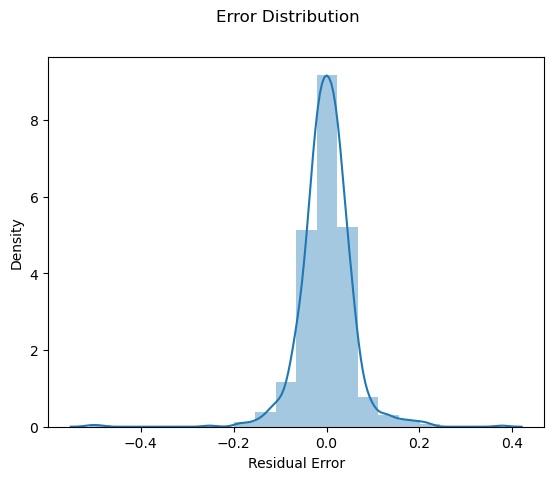

In [281]:
fig = plt.figure()
sns.distplot(error, bins = 20)
fig.suptitle('Error Distribution')   # Plot heading 
plt.xlabel('Residual Error')         # X-label
plt.show()

<font color = green> **Observations:**</font>  From the above chart we can confirm that residual errors are normally distributed.

#### Check for Homoscedasticity-

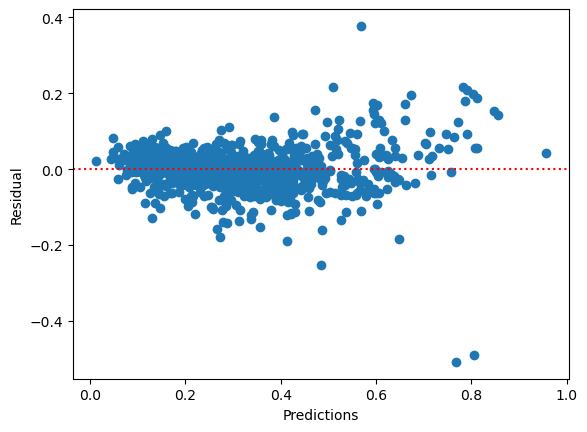

In [283]:
plt.scatter( y_train_pred , error)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

<font color = green> **Observations:**</font>  From the above chart we can confirm that errors are following Homoscedasticity which means there is no trend observed in the error variance across all the predictors

<hr>

## <font color = blue> Visualizing the fit on the test set on Lasso Regression model (Model4) </font>

In [ ]:
y_pred_test = lasso.predict(X_test[RFE_choosen_col])

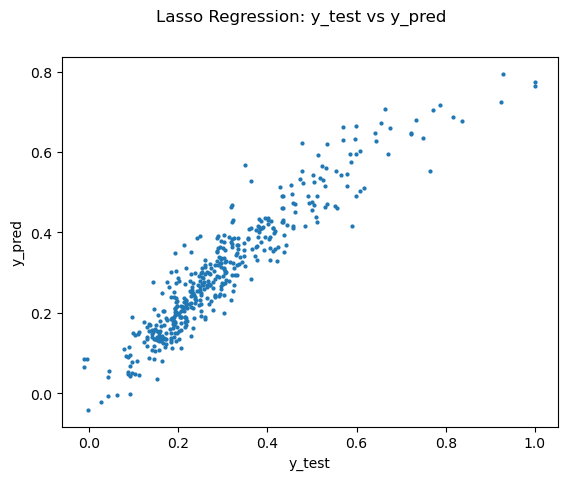

In [284]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred_test, s = np.pi*1.3)
fig.suptitle('Lasso Regression: y_test vs y_pred')              # Plot heading 
plt.xlabel('y_test')                          # X-label
plt.ylabel('y_pred')
plt.show()

<hr>

<hr>

<hr>